# Credit EDA Case Study

## Project Introduction
This case study aims to give you an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.


## Business Understanding
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants are capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.
 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

**Approved:** The Company has approved loan Application

**Cancelled:** The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

**Refused:** The company had rejected the loan (because the client does not meet their requirements etc.).

**Unused offer:**  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.


## Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

In [1]:
# Import necessary modules for data analysis and data visualization. 
# Data analysis modules
# Pandas is probably the most popular and important modules for any work related to data management. 
import pandas as pd

# numpy is a great library for doing mathmetical operations. 
import numpy as np

# Some visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns

import warnings ## importing warnings library. 
warnings.filterwarnings('ignore') ## Ignore warning

In [2]:
#creating a function for count of missing values and % of missing values for dataframe
def missing_data(d1):
    missing_data1 = pd.DataFrame(round(d1.isnull().sum().sort_values(ascending=False)/len(d1.index)*100,2), columns=['% of missing value'])
    missing_data1['Count of Missing Values'] = d1.isnull().sum()
    return missing_data1

In [3]:
#loading the previous application dataset
prev_app=pd.read_csv('previous_application.csv')

In [4]:
#loading application dataset
app_data = pd.read_csv('application_data.csv')

In [5]:
app_data.shape

(307511, 122)

In [6]:
prev_app.shape

(1670214, 37)

# Visualizing application data

In [7]:
#checking the head of the dataframe
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

## Results Expected by Learners

Identify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)

Hint: Note that in EDA, since it is not necessary to replace the missing value, but if you have to replace the missing value, what should be the approach. Clearly mention the approach.

Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points.

## Handling Missing Values and cleaning the data

In [8]:
#checking missing values
missing_data(app_data)[missing_data(app_data)['% of missing value'] > 0]

% of missing value  Count of Missing Values
COMMONAREA_MEDI                            69.87                   214865
COMMONAREA_AVG                             69.87                   214865
COMMONAREA_MODE                            69.87                   214865
NONLIVINGAPARTMENTS_MODE                   69.43                   213514
NONLIVINGAPARTMENTS_MEDI                   69.43                   213514
NONLIVINGAPARTMENTS_AVG                    69.43                   213514
FONDKAPREMONT_MODE                         68.39                   210295
LIVINGAPARTMENTS_MEDI                      68.35                   210199
LIVINGAPARTMENTS_MODE                      68.35                   210199
LIVINGAPARTMENTS_AVG                       68.35                   210199
FLOORSMIN_MEDI                             67.85                   208642
FLOORSMIN_MODE                             67.85                   208642
FLOORSMIN_AVG                              67.85                   208642
YEARS_BUILD_MEDI                           66.50                   204488
YEARS_BUILD_AVG                            66.50                   204488
YEARS_BUILD_MODE                           66.50                   204488
OWN_CAR_AGE                                65.99                   202929
LANDAREA_MODE                              59.38                   182590
LANDAREA_AVG                               59.38                   182590
LANDAREA_MEDI                              59.38                   182590
BASEMENTAREA_MEDI                          58.52                   179943
BASEMENTAREA_AVG                           58.52                   179943
BASEMENTAREA_MODE                          58.52                   179943
EXT_SOURCE_1                               56.38                   173378
NONLIVINGAREA_MEDI                         55.18                   169682
NONLIVINGAREA_AVG                          55.18                   169682
NONLIVINGAREA_MODE                         55.18                   169682
ELEVATORS_MODE                             53.30                   163891
ELEVATORS_AVG                              53.30                   163891
ELEVATORS_MEDI                             53.30                   163891
...                                          ...                      ...
ENTRANCES_MEDI                             50.35                   154828
ENTRANCES_MODE                             50.35                   154828
ENTRANCES_AVG                              50.35                   154828
LIVINGAREA_MEDI                            50.19                   154350
LIVINGAREA_MODE                            50.19                   154350
LIVINGAREA_AVG                             50.19                   154350
HOUSETYPE_MODE                             50.18                   154297
FLOORSMAX_MODE                             49.76                   153020
FLOORSMAX_MEDI                             49.76                   153020
FLOORSMAX_AVG                              49.76                   153020
YEARS_BEGINEXPLUATATION_MEDI               48.78                   150007
YEARS_BEGINEXPLUATATION_AVG                48.78                   150007
YEARS_BEGINEXPLUATATION_MODE               48.78                   150007
TOTALAREA_MODE                             48.27                   148431
EMERGENCYSTATE_MODE                        47.40                   145755
OCCUPATION_TYPE                            31.35                    96391
EXT_SOURCE_3                               19.83                    60965
AMT_REQ_CREDIT_BUREAU_QRT                  13.50                    41519
AMT_REQ_CREDIT_BUREAU_YEAR                 13.50                    41519
AMT_REQ_CREDIT_BUREAU_WEEK                 13.50                    41519
AMT_REQ_CREDIT_BUREAU_MON                  13.50                    41519
AMT_REQ_CREDIT_BUREAU_DAY                  13.50                    41519
AMT_REQ_CREDIT_BUREAU_HOUR        

In [9]:
#checking missing values cols only
missing_data(app_data)[missing_data(app_data)['% of missing value'] > 0].index

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAPARTMENTS_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE',
       'FLOORSMIN_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG',
       'YEARS_BUILD_MODE', 'OWN_CAR_AGE', 'LANDAREA_MODE', 'LANDAREA_AVG',
       'LANDAREA_MEDI', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MEDI',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'ELEVATORS_MODE',
       'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MODE', 'APARTMENTS_AVG', 'APARTMENTS_MEDI',
       'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'ENTRANCES_AVG', 'LIVINGAREA_MEDI',
       'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE',
       'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MEDI

As we can see all the column **except the columns below** are normalized columns. So we will ignore the missing data in them and focus on the below columns:

AMT_GOODS_PRICE <br>
NAME_TYPE_SUITE<br>
OWN_CAR_AGE<br>
OCCUPATION_TYPE<br>
OBS_30_CNT_SOCIAL_CIRCLE<br>
DEF_30_CNT_SOCIAL_CIRCLE<br>
OBS_60_CNT_SOCIAL_CIRCLE<br>
DEF_60_CNT_SOCIAL_CIRCLE<br>
AMT_REQ_CREDIT_BUREAU_HOUR<br>
AMT_REQ_CREDIT_BUREAU_DAY<br>
AMT_REQ_CREDIT_BUREAU_WEEK<br>
AMT_REQ_CREDIT_BUREAU_MON<br>
AMT_REQ_CREDIT_BUREAU_QRT<br>
AMT_REQ_CREDIT_BUREAU_YEAR<br>


In [10]:
cols = ['AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
        'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
        'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
        'AMT_REQ_CREDIT_BUREAU_YEAR']
missing_data(app_data).loc[cols,:]

% of missing value  Count of Missing Values
AMT_GOODS_PRICE                           0.09                      278
NAME_TYPE_SUITE                           0.42                     1292
OWN_CAR_AGE                              65.99                   202929
OCCUPATION_TYPE                          31.35                    96391
OBS_30_CNT_SOCIAL_CIRCLE                  0.33                     1021
DEF_30_CNT_SOCIAL_CIRCLE                  0.33                     1021
OBS_60_CNT_SOCIAL_CIRCLE                  0.33                     1021
DEF_60_CNT_SOCIAL_CIRCLE                  0.33                     1021
AMT_REQ_CREDIT_BUREAU_HOUR               13.50                    41519
AMT_REQ_CREDIT_BUREAU_DAY                13.50                    41519
AMT_REQ_CREDIT_BUREAU_WEEK               13.50                    41519
AMT_REQ_CREDIT_BUREAU_MON                13.50                    41519
AMT_REQ_CREDIT_BUREAU_QRT                13.50                    41519
AMT_REQ_CREDIT_BUREAU_YEAR               13.50                    41519

In [11]:
#checking amt_goods_price column
print(missing_data(app_data)[missing_data(app_data).index == 'AMT_GOODS_PRICE'])
print('*'*100)
#checking the distribution of this column
print(app_data['AMT_GOODS_PRICE'].describe())

                 % of missing value  Count of Missing Values
AMT_GOODS_PRICE                0.09                      278
****************************************************************************************************
count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


In [12]:
#generating quantile values for amt goods price
quantiles = []
for x in range(0,101,5):
    quantiles.append(app_data['AMT_GOODS_PRICE'].quantile(x/100))

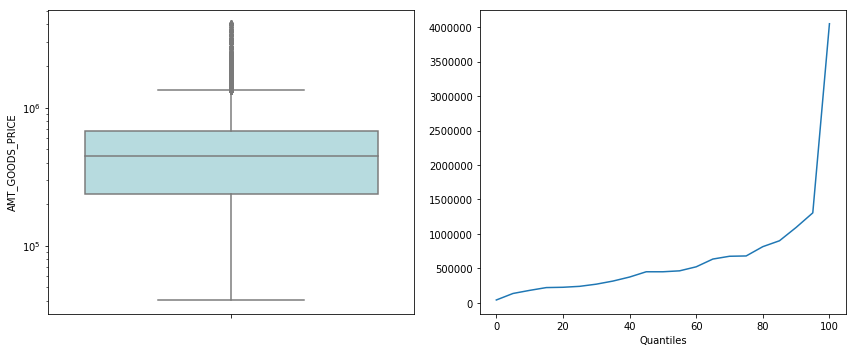

In [13]:
#plotting distribution of amt_goods_price and quantile values
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y =app_data['AMT_GOODS_PRICE'], color='powderblue')
plt.yscale('log')
                                                       
plt.subplot(1,2,2)
sns.lineplot(y=quantiles, x=range(0,101,5))  
plt.xlabel('Quantiles')
plt.tight_layout()
plt.show()

As we can see from the above two graphs , data contains outliers, and from quantile plot , there is a steep rise after 90%
quantile value, so replacing the missing values with median value of AMT_GOODS_PRICE

In [14]:
app_data['AMT_GOODS_PRICE'] = app_data['AMT_GOODS_PRICE'].replace(np.nan,app_data['AMT_GOODS_PRICE'].quantile(0.5))

In [15]:
#checking amt_goods_price column
print(missing_data(app_data)[missing_data(app_data).index == 'AMT_GOODS_PRICE'])

                 % of missing value  Count of Missing Values
AMT_GOODS_PRICE                 0.0                        0


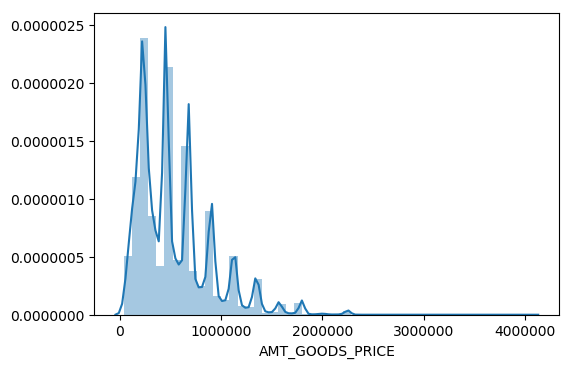

In [16]:
plt.figure(dpi=100)
sns.distplot(app_data['AMT_GOODS_PRICE'])
plt.show()

                 % of missing value  Count of Missing Values
NAME_TYPE_SUITE                0.42                     1292
****************************************************************************************************


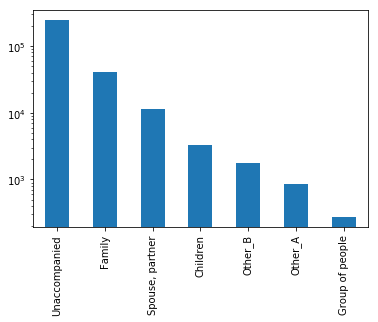

In [17]:
#checking NAME_TYPE_SUITE column
print(missing_data(app_data)[missing_data(app_data).index == 'NAME_TYPE_SUITE'])
print('*'*100)
app_data['NAME_TYPE_SUITE'].value_counts().plot.bar()
plt.yscale('log')
plt.show()

In [18]:
# replacing the missing values with Unaccompained as they are more in number
app_data['NAME_TYPE_SUITE'] = app_data['NAME_TYPE_SUITE'].replace(np.nan,'Unaccompained')
print(missing_data(app_data)[missing_data(app_data).index == 'NAME_TYPE_SUITE'])

                 % of missing value  Count of Missing Values
NAME_TYPE_SUITE                 0.0                        0


In [19]:
#checking own_car_age column
print(missing_data(app_data)[missing_data(app_data).index == 'OWN_CAR_AGE'])

             % of missing value  Count of Missing Values
OWN_CAR_AGE               65.99                   202929


Let first analyse the no of applicants who doesnt have car

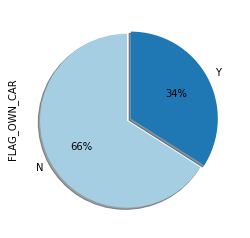

In [20]:
#checking flag_own_car column
app_data['FLAG_OWN_CAR'].value_counts().plot.pie(autopct='%1.0f%%',explode=[0.05,0], startangle=90, shadow = True, 
                                                 colors = sns.color_palette('Paired'))
plt.show()

As you can see 66% of applicants who does not have car and 66% missing values, that means values for care age are misssing for those applicants only who doest own a car, that is practically correct. So we will leave null values as it as

                 % of missing value  Count of Missing Values
OCCUPATION_TYPE               31.35                    96391
****************************************************************************************************


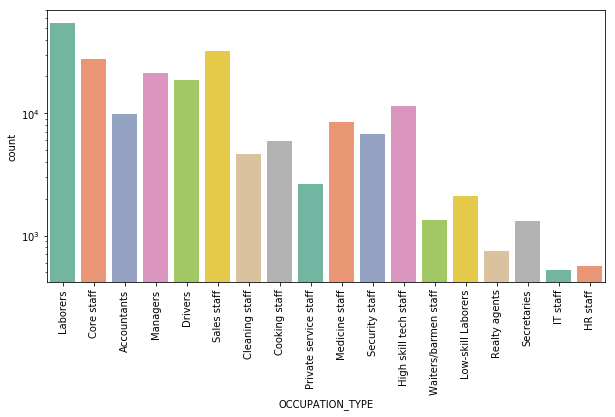

In [21]:
#checking occupation_type column
print(missing_data(app_data)[missing_data(app_data).index == 'OCCUPATION_TYPE'])
print('*'*100)
plt.figure(figsize=(10,5))
sns.countplot(app_data['OCCUPATION_TYPE'], palette='Set2')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

As we are unable to find any valid reason , we will not impute missing values for occupation type column

# EDA
## (Mix of Univariate, Bivariate and Segmented Bivariate Analysis)

#### Identify if there is data imbalance in the data. Find the ratio of data imbalance.

Hint: How will you analyse the data in case of data imbalance? You can plot more than one type of plot to analyse the different aspects due to data imbalance. For example, you can choose your own scale for the graphs, i.e. one can plot in terms of percentage or absolute value. Do this analysis for the ‘Target variable’ in the dataset ( clients with payment difficulties and all other cases). Use a mix of univariate and bivariate analysis etc.

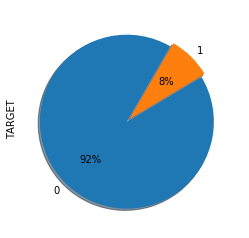

In [22]:
#checking the target column
app_data['TARGET'].value_counts().plot.pie(autopct='%1.0f%%',explode=[0.05,0], startangle=60, shadow = True)
plt.show()

As we can see , data is highly imbalanced ratio is 8/92.

In [23]:
# getting the non numeric columns first
cols = ['NAME_CONTRACT_TYPE',
'CODE_GENDER',
'FLAG_OWN_CAR',
'FLAG_OWN_REALTY',
'NAME_TYPE_SUITE',
'NAME_INCOME_TYPE',
'NAME_EDUCATION_TYPE',
'NAME_FAMILY_STATUS',
'NAME_HOUSING_TYPE',
'OCCUPATION_TYPE',
'WEEKDAY_APPR_PROCESS_START',
'ORGANIZATION_TYPE',
]
#checking the no of unique values, to decide to choose type of plot, if less no of unique values , we will use pie chart 
#else count plot
app_data[cols].nunique().sort_values()
    

NAME_CONTRACT_TYPE             2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
CODE_GENDER                    3
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
NAME_TYPE_SUITE                8
NAME_INCOME_TYPE               8
OCCUPATION_TYPE               18
ORGANIZATION_TYPE             58
dtype: int64

### First Pie chart in the below graph is univariate , 2nd is bivariate and 3rd barplot is sgmented bivariate

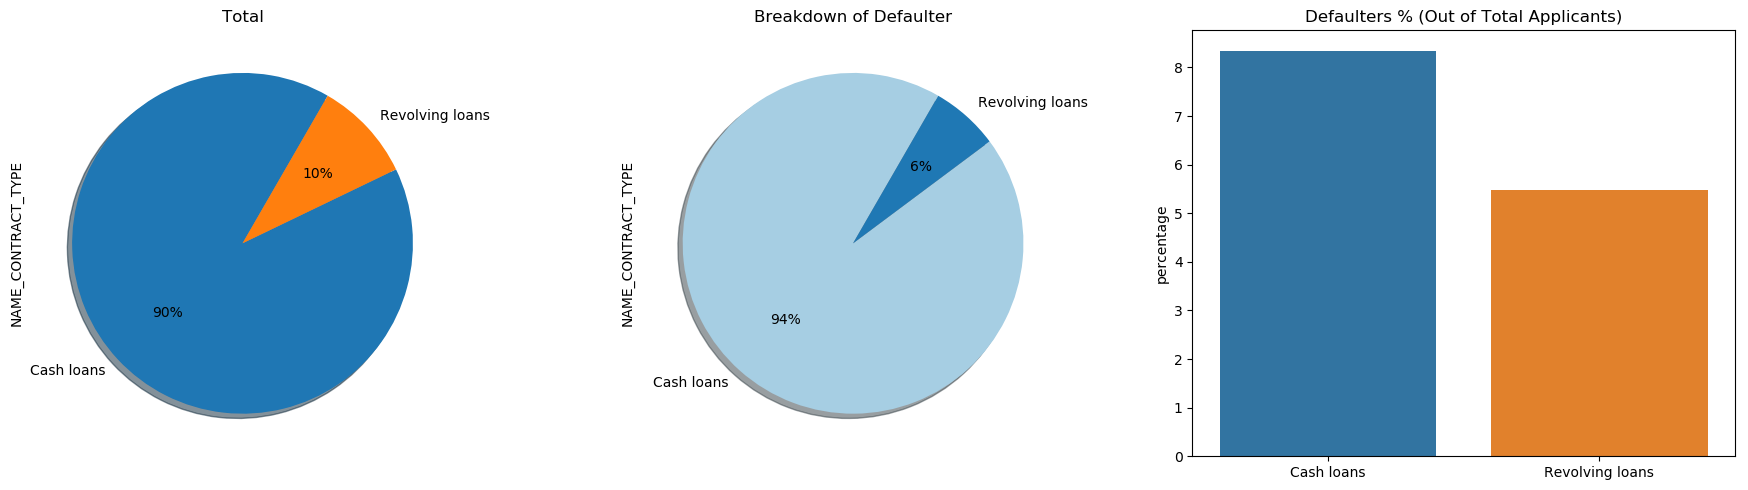

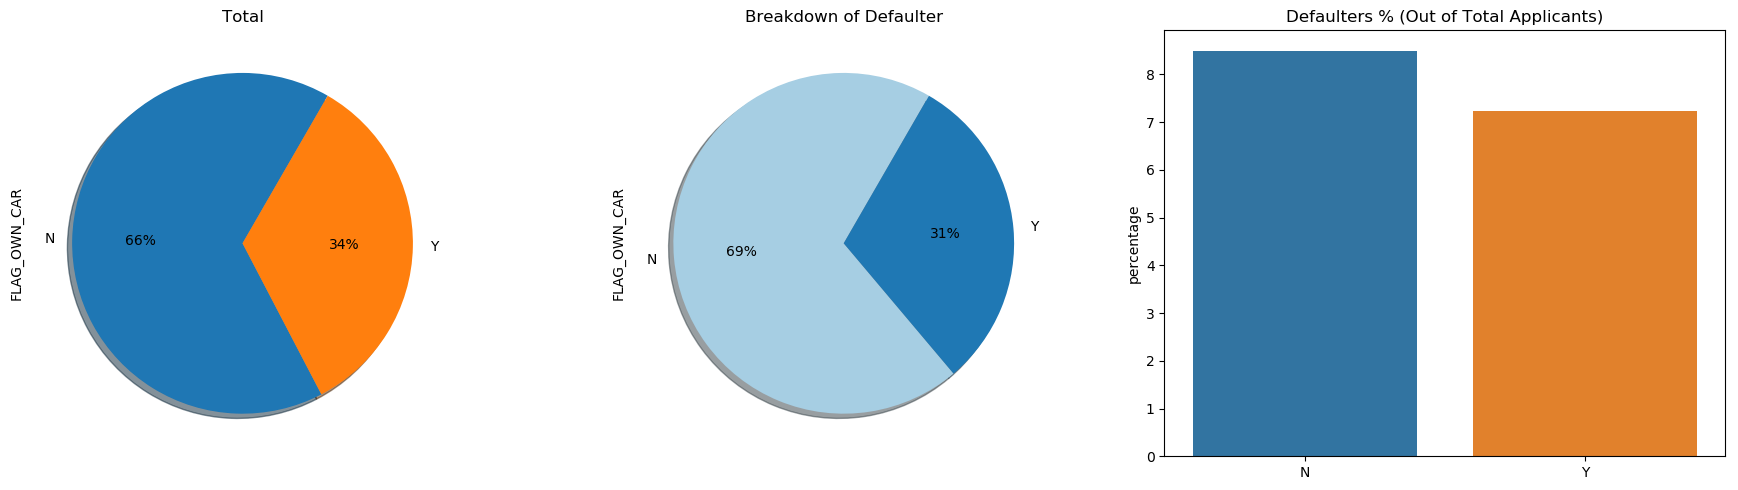

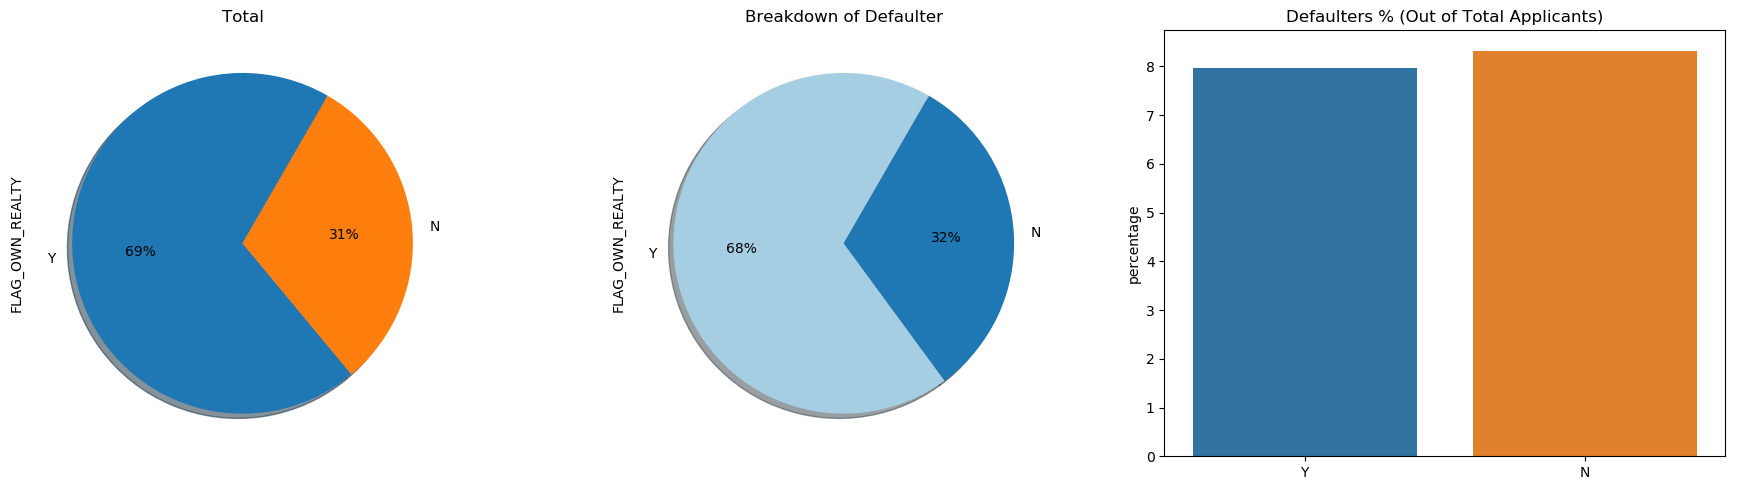

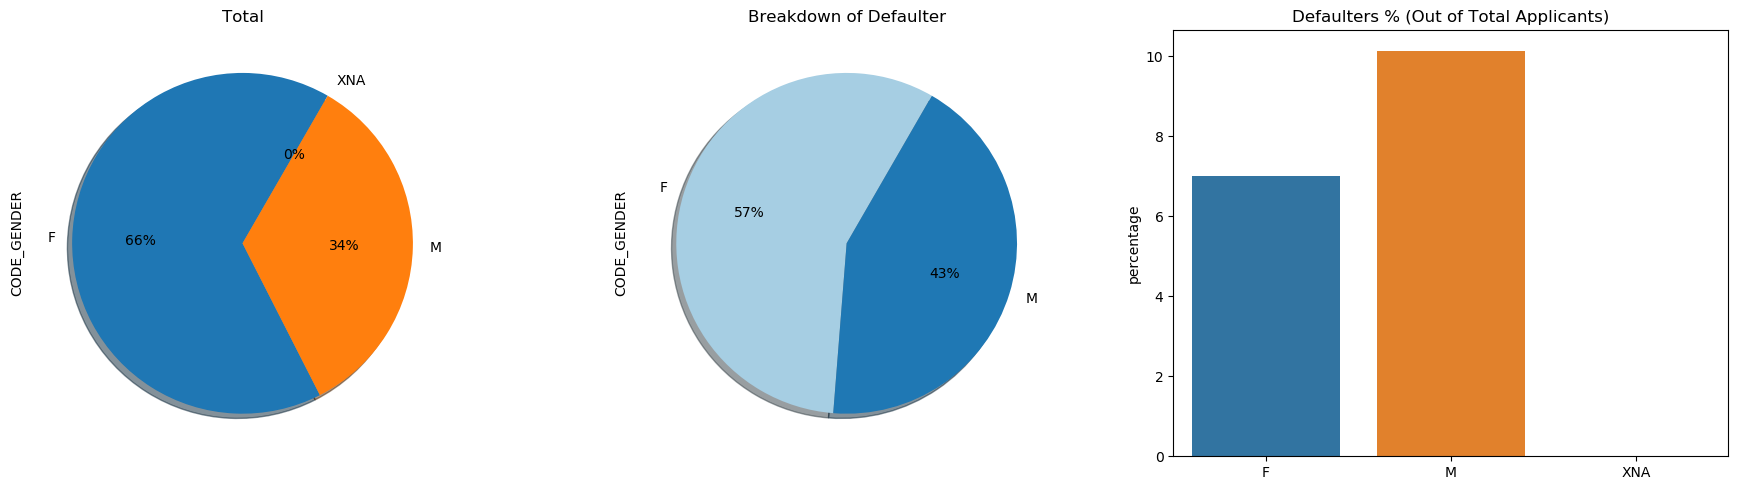

In [24]:
a = ['NAME_CONTRACT_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','CODE_GENDER']

for col in a:
    plt.figure(figsize=(18,5), dpi=100)
    plt.subplot(1,3,1)
    app_data[col].value_counts().plot.pie(autopct='%1.0f%%', startangle=60, shadow = True)
    plt.title('Total')
    plt.subplot(1,3,2)
    app_data[app_data['TARGET'] == 1][col].value_counts().plot.pie(autopct='%1.0f%%', startangle=60, shadow = True,
                                                                  colors = sns.color_palette('Paired'))
    plt.title('Breakdown of Defaulter')
    
    plt.subplot(1,3,3)
    aa = pd.DataFrame(app_data[col].value_counts())
    aa['DEFAULTER'] = app_data[app_data['TARGET']==1][col].value_counts()
    aa['percentage'] = round(aa['DEFAULTER']/aa[col]*100,3)
    sns.barplot(y=aa['percentage'], x=aa.index)
    plt.title('Defaulters % (Out of Total Applicants)')

    plt.tight_layout()
    plt.show()

**Insigths from the above graphs**
1. Clients who have taken cash loan had a payment dificulties
2. Clients who does not have car had a payment dificulties
3. Males are the most who had payment dificulties

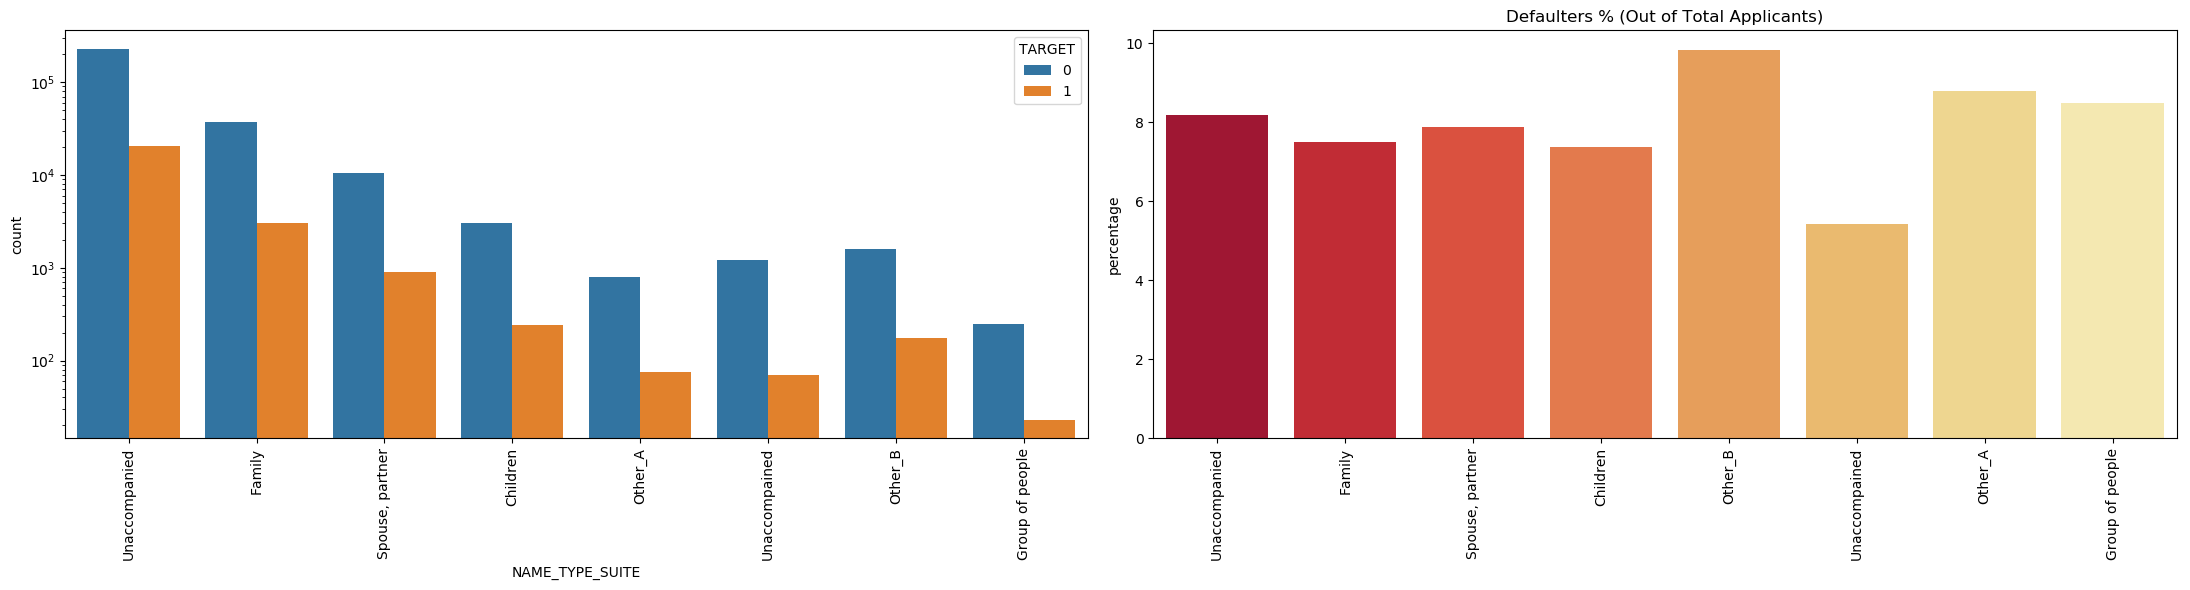

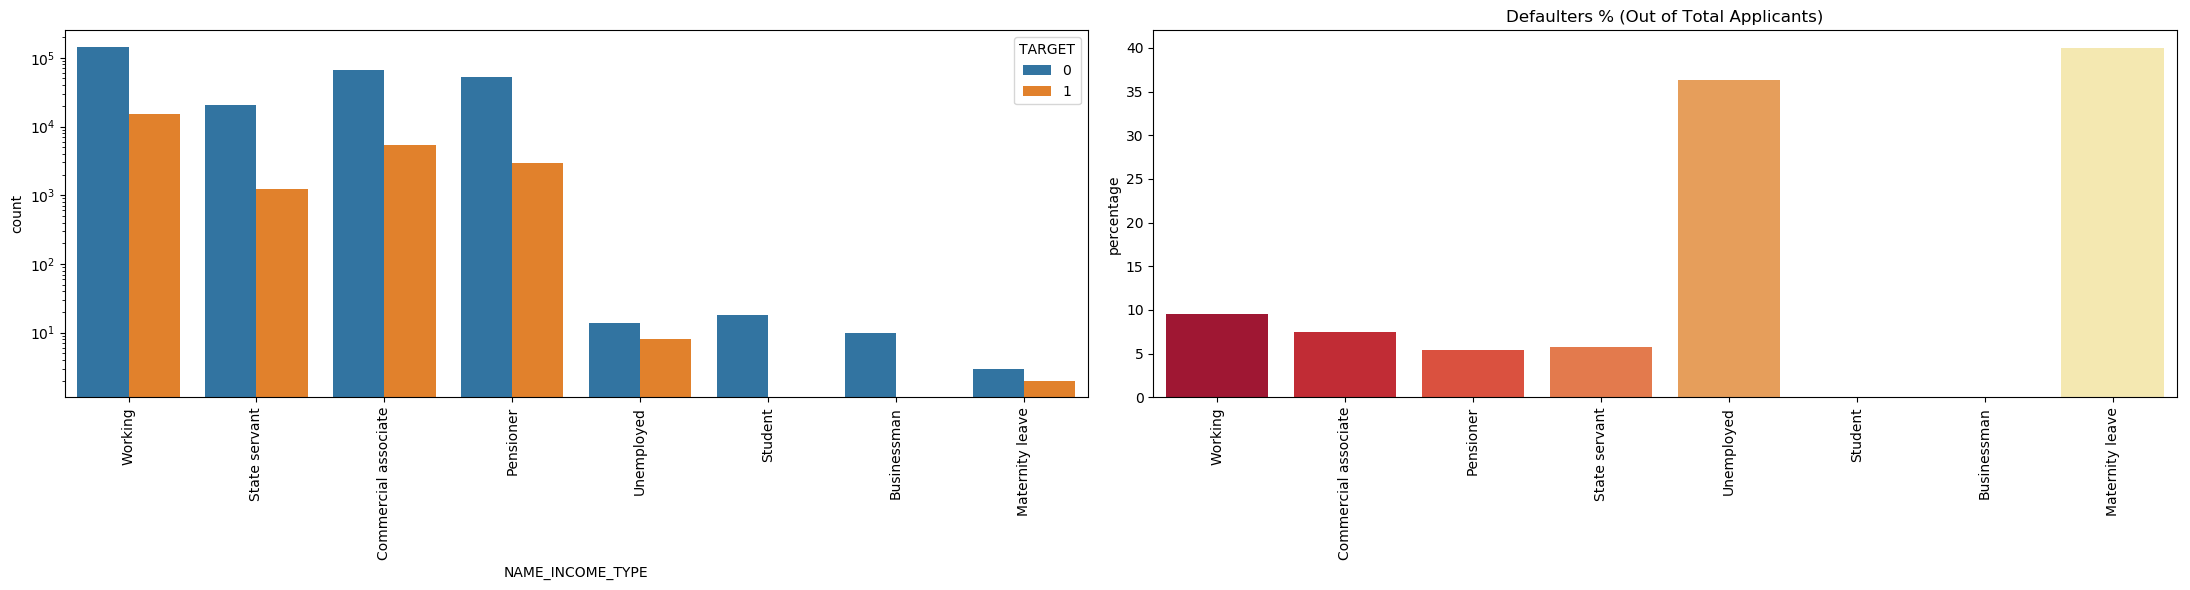

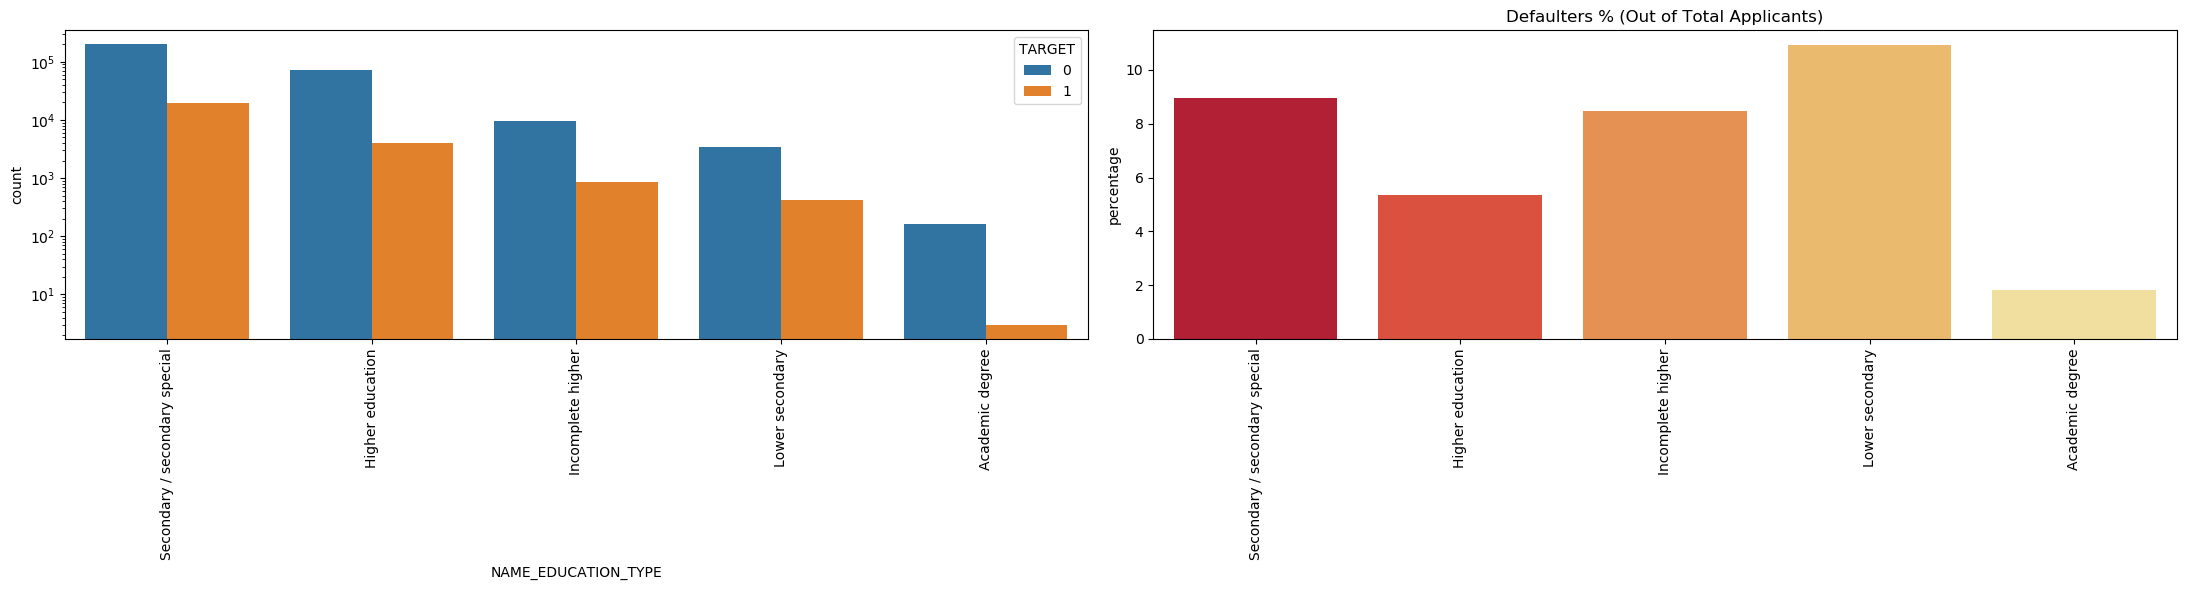

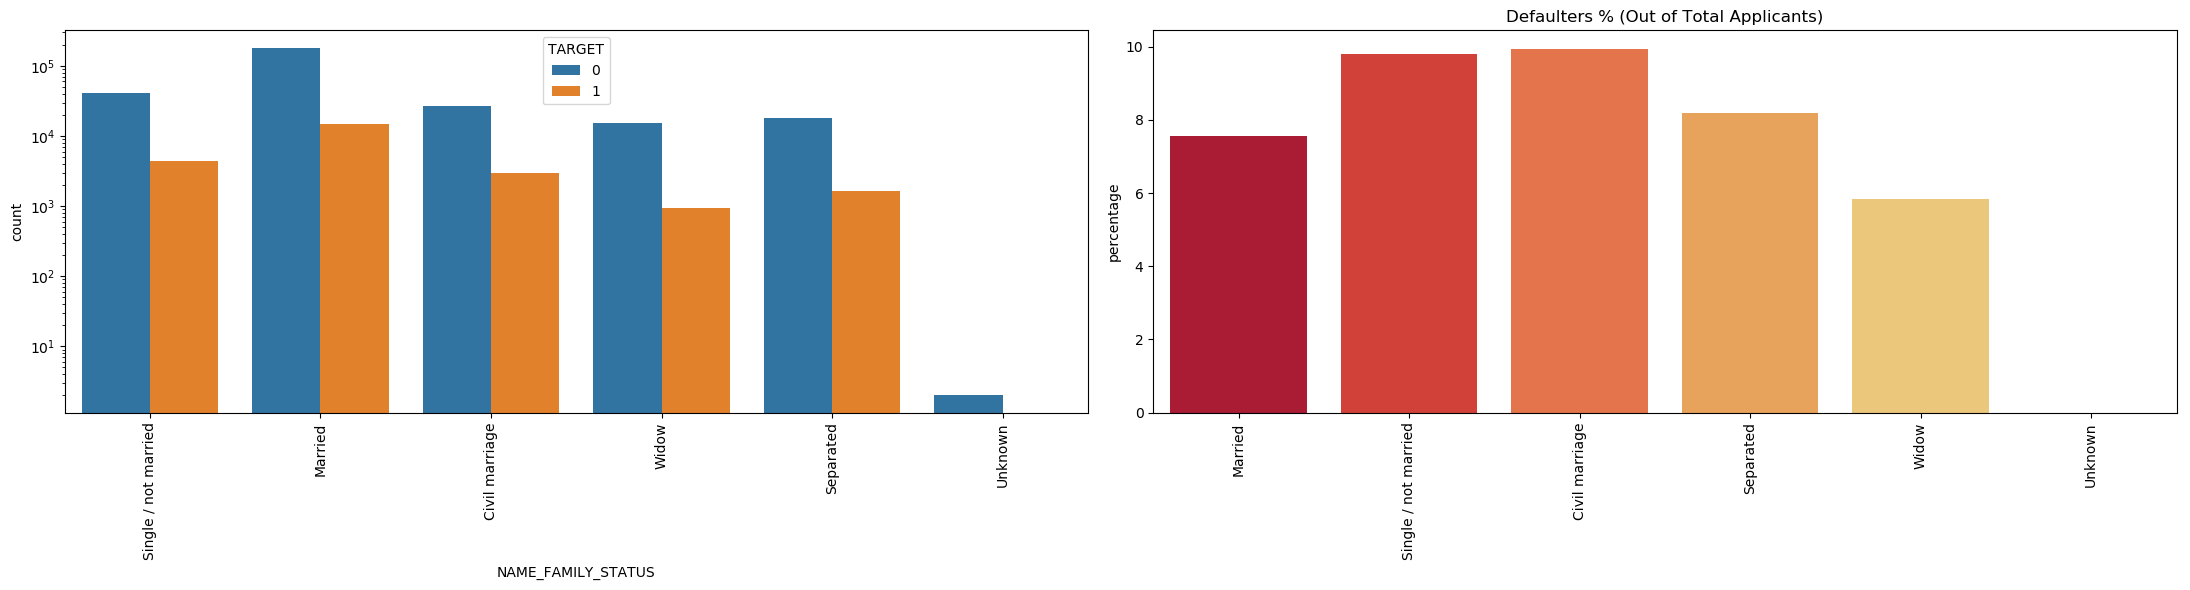

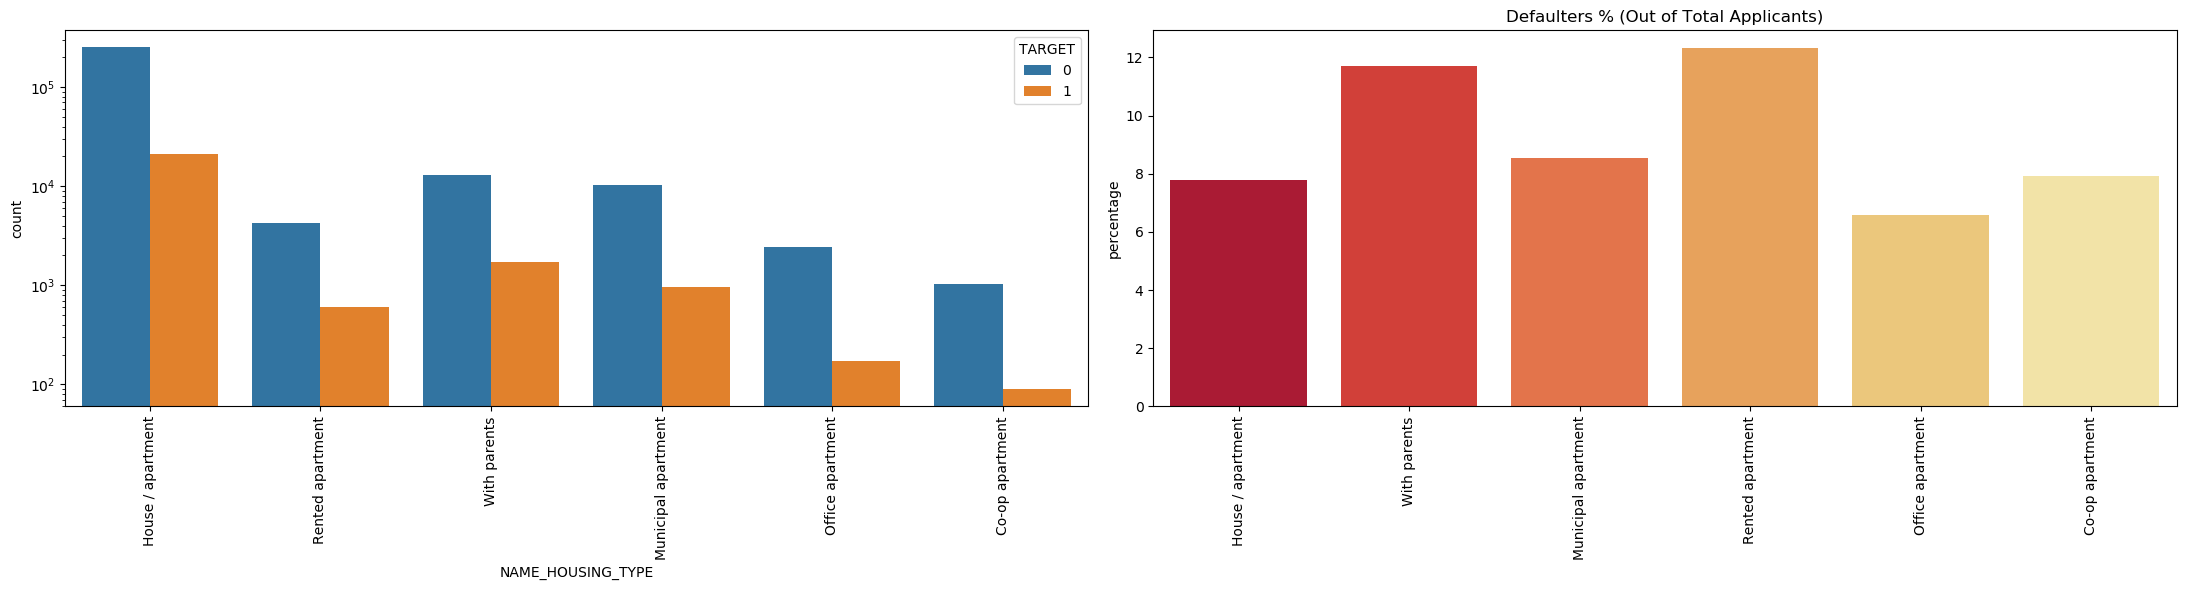

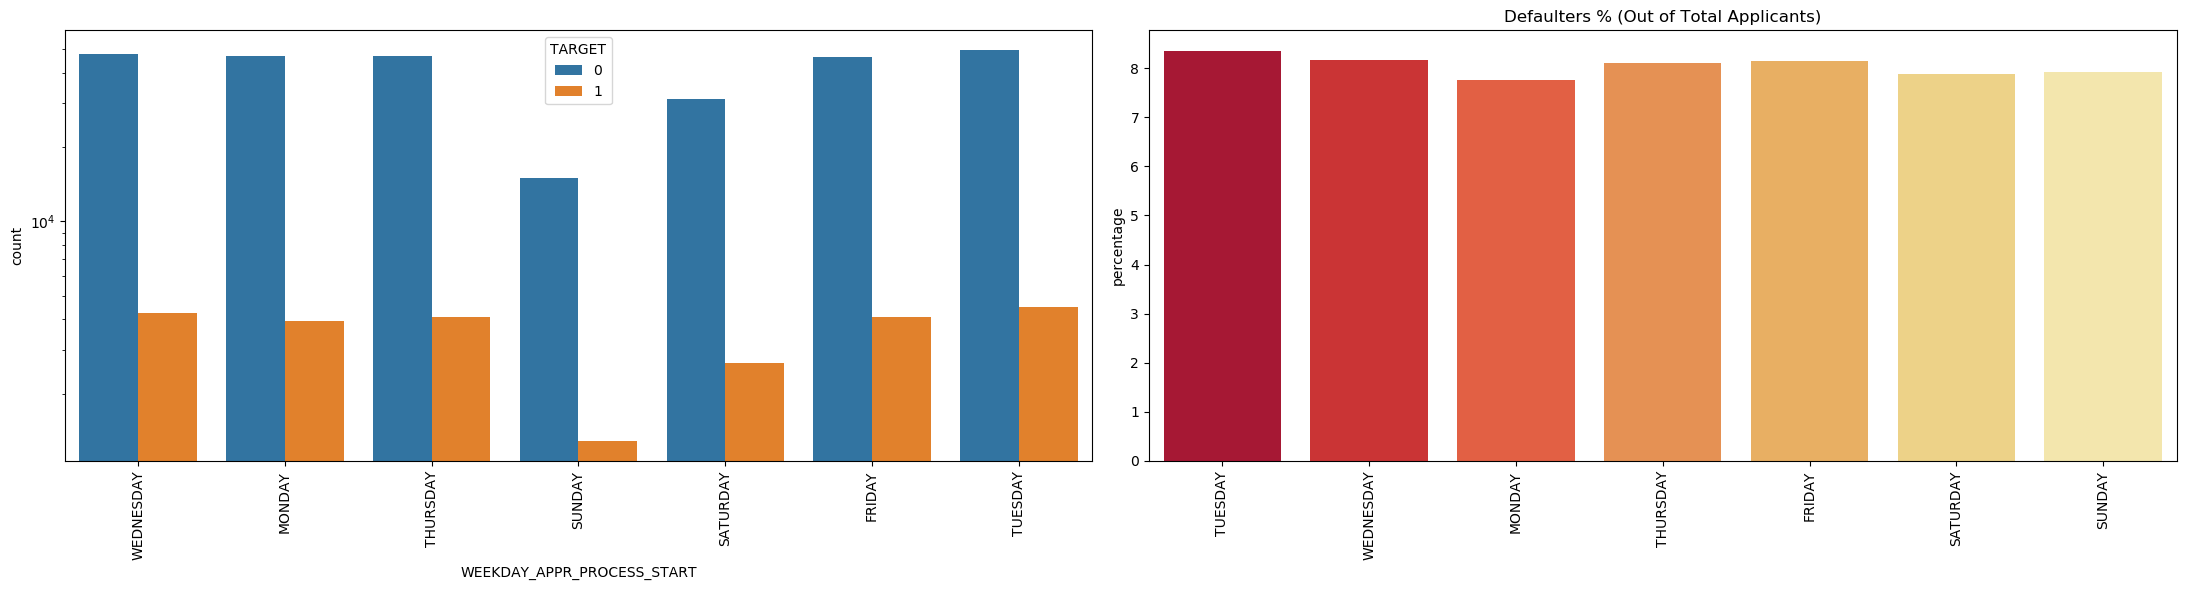

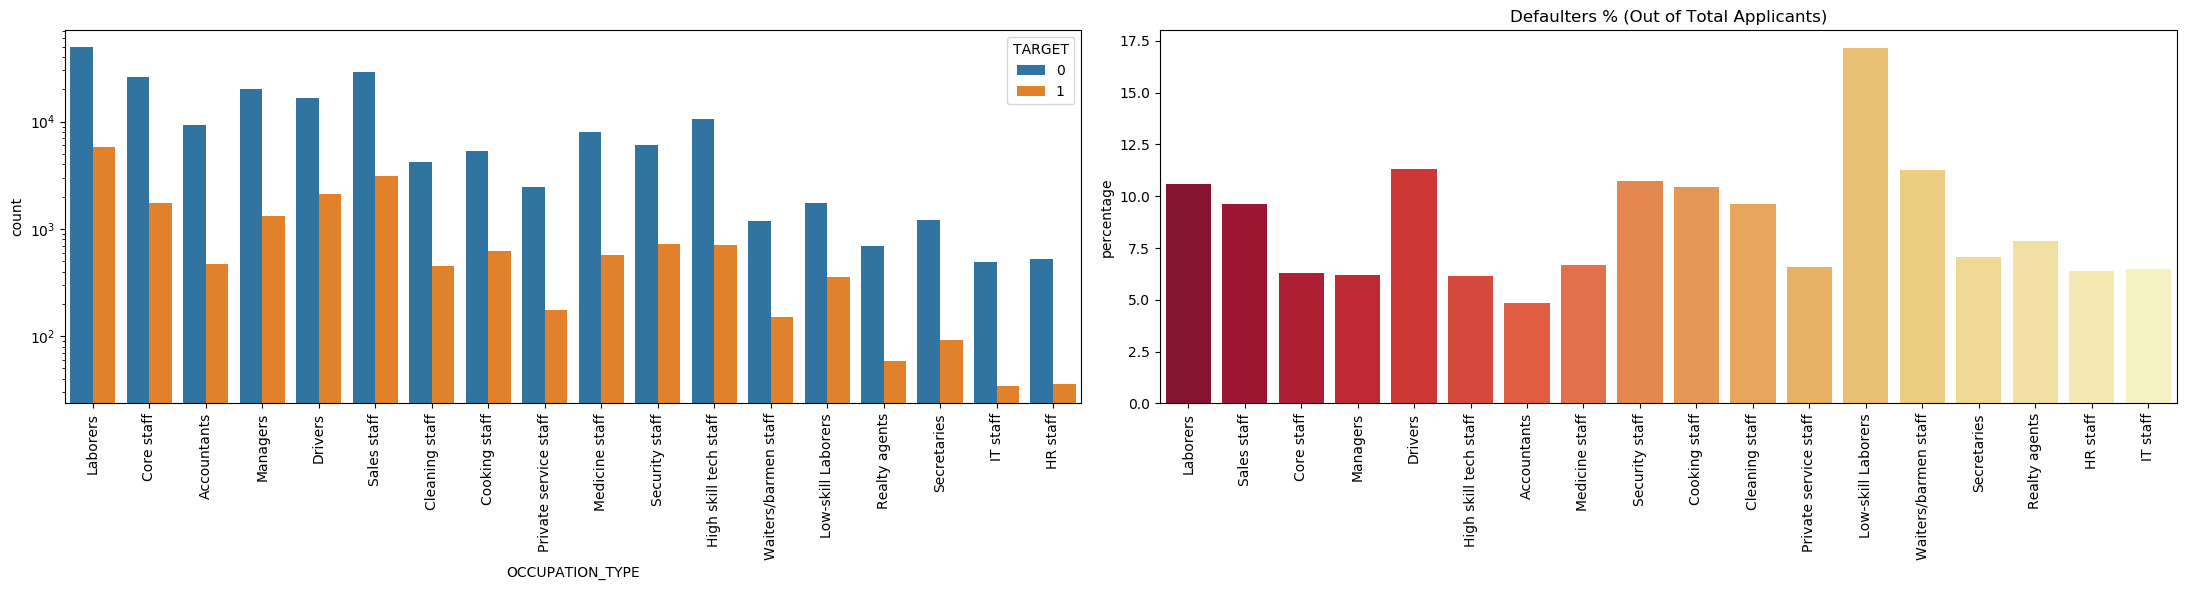

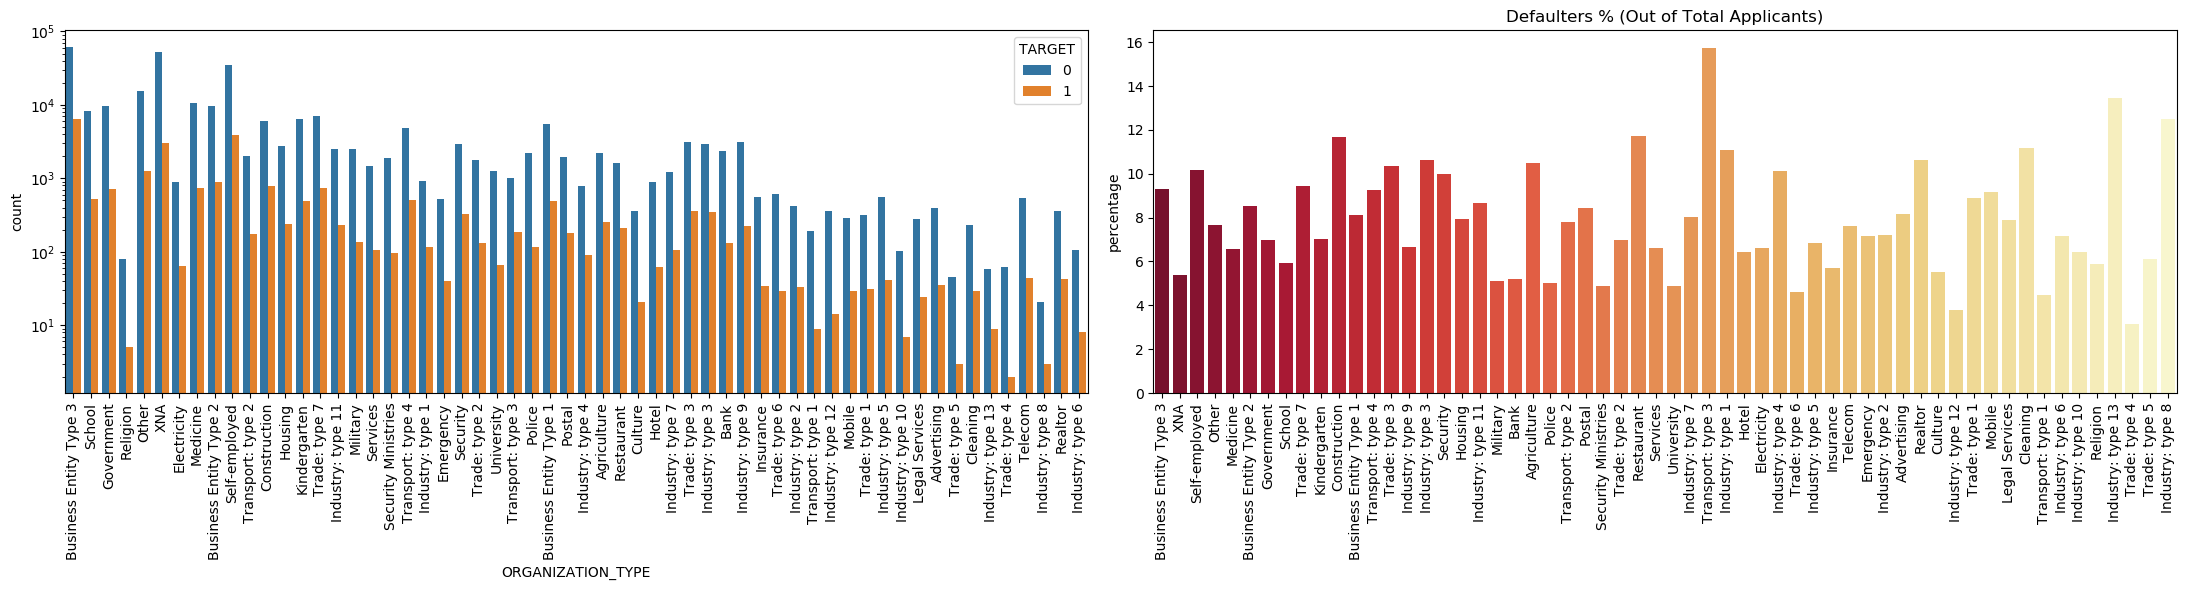

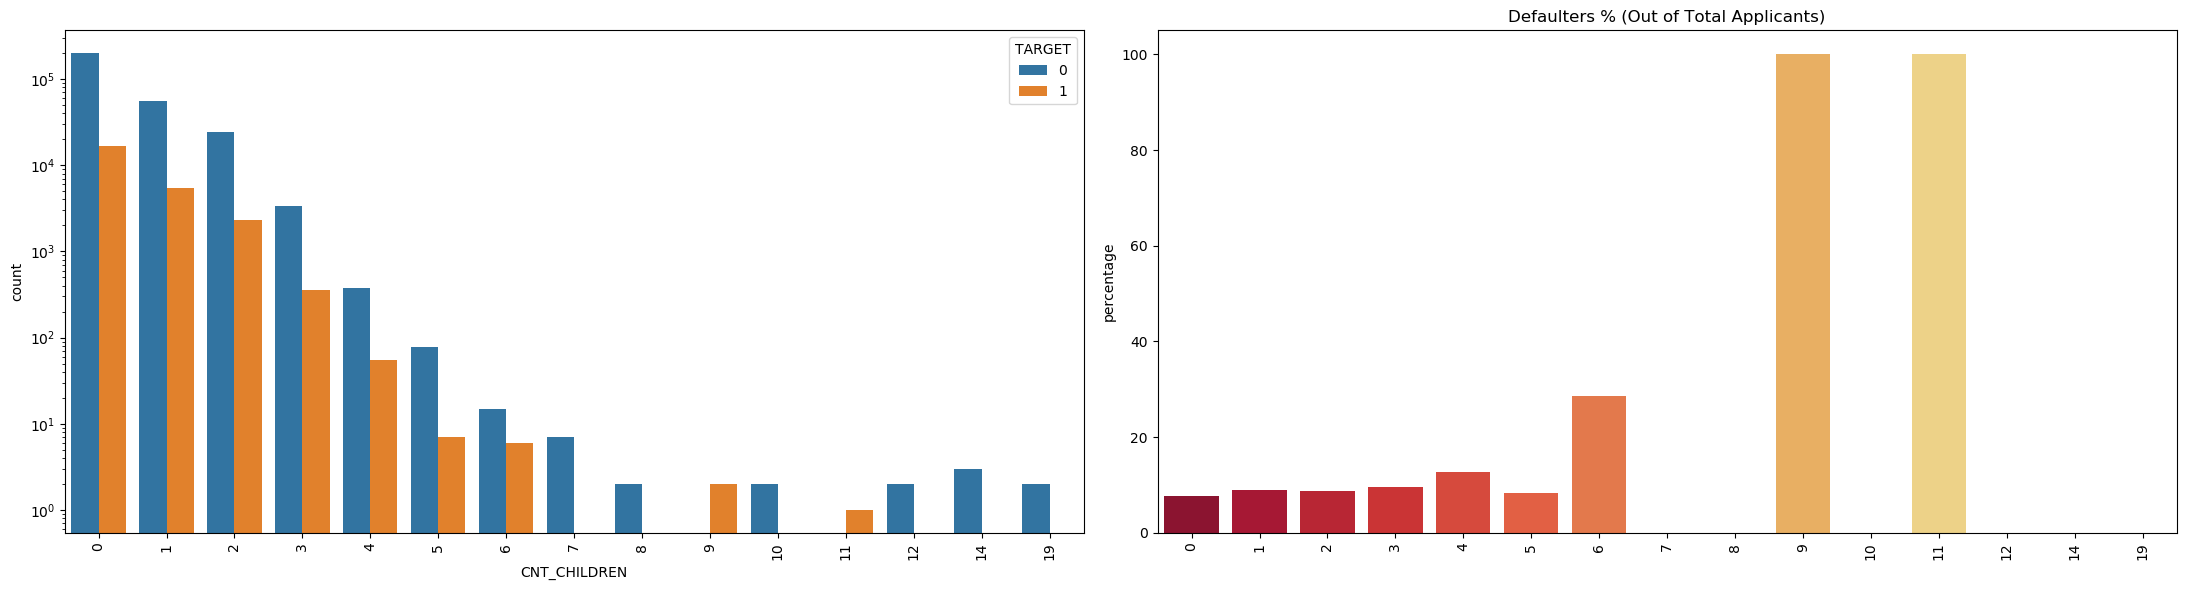

In [25]:
b = ['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
     'WEEKDAY_APPR_PROCESS_START','OCCUPATION_TYPE','ORGANIZATION_TYPE','CNT_CHILDREN']

for col in b:
    plt.figure(figsize=(22,6), dpi=100)
    plt.subplot(1,2,1)
    sns.countplot(app_data[col], hue=app_data['TARGET'])
    plt.xticks(rotation=90)
    plt.yscale('log')
    
    plt.subplot(1,2,2)
    aa = pd.DataFrame(app_data[col].value_counts())
    aa['DEFAULTER'] = app_data[app_data['TARGET']==1][col].value_counts()
    aa['percentage'] = round(aa['DEFAULTER']/aa[col]*100,3)
    sns.barplot(y=aa['percentage'], x=aa.index, palette='YlOrRd_r')
    plt.title('Defaulters % (Out of Total Applicants)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
   

**Insigths from the above graphs**
1. Clients whose education is Lower secondary or Incomplete higher education had a payment dificulties.
2. Weekday has not significant effect on payment difficulties.
3. Low Skill labourers are the applicants who are most likely to default.
4. The applicants who had more number of children had a payment difficulties.

### Treatment of Outliers

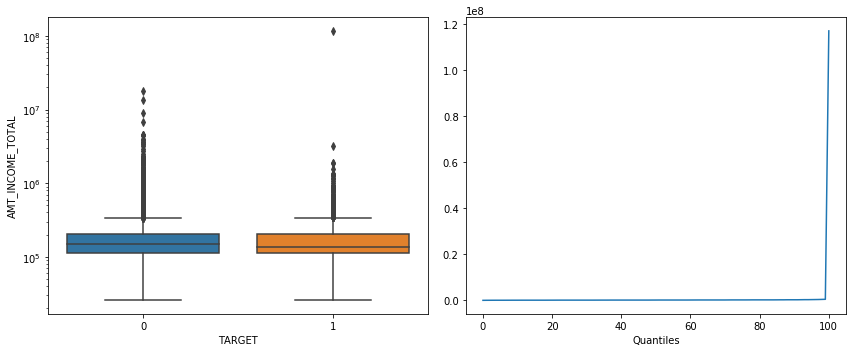

In [26]:
#plotting distribution of amt_goods_price and quantile values
quantiles = []
for x in range(0,101,1):
    quantiles.append(app_data['AMT_INCOME_TOTAL'].quantile(x/100))
    
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y =app_data['AMT_INCOME_TOTAL'],x=app_data['TARGET'])
plt.yscale('log')
                                                       
plt.subplot(1,2,2)
sns.lineplot(y=quantiles, x=range(0,101,1))  
plt.xlabel('Quantiles')
plt.tight_layout()
plt.show()

As we can see from the qantile chart and box plot , there is a outlier, we have to find out and remove them

In [27]:
for x in range(0,101,5):
    print(app_data['AMT_INCOME_TOTAL'].quantile(x/100))

25650.0
67500.0
81000.0
90000.0
99000.0
112500.0
112500.0
126000.0
135000.0
135000.0
147150.0
157500.0
162000.0
180000.0
180000.0
202500.0
225000.0
234000.0
270000.0
337500.0
117000000.0


In [28]:
app_data['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [29]:
#taking the records where AMT_INCOME_TOTAL is less than 5000000
app_data = app_data[app_data['AMT_INCOME_TOTAL'] < 5000000]

In [30]:
#checking missing values in AMT_ANNUITY column
print(missing_data(app_data)[missing_data(app_data).index == 'AMT_ANNUITY'])

             % of missing value  Count of Missing Values
AMT_ANNUITY                 0.0                       12


In [31]:
app_data['AMT_ANNUITY'].describe()

count    307494.000000
mean      27107.674794
std       14491.121862
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [32]:
app_data['AMT_ANNUITY'] = app_data['AMT_ANNUITY'].replace(np.nan,app_data['AMT_ANNUITY'].quantile(0.5))

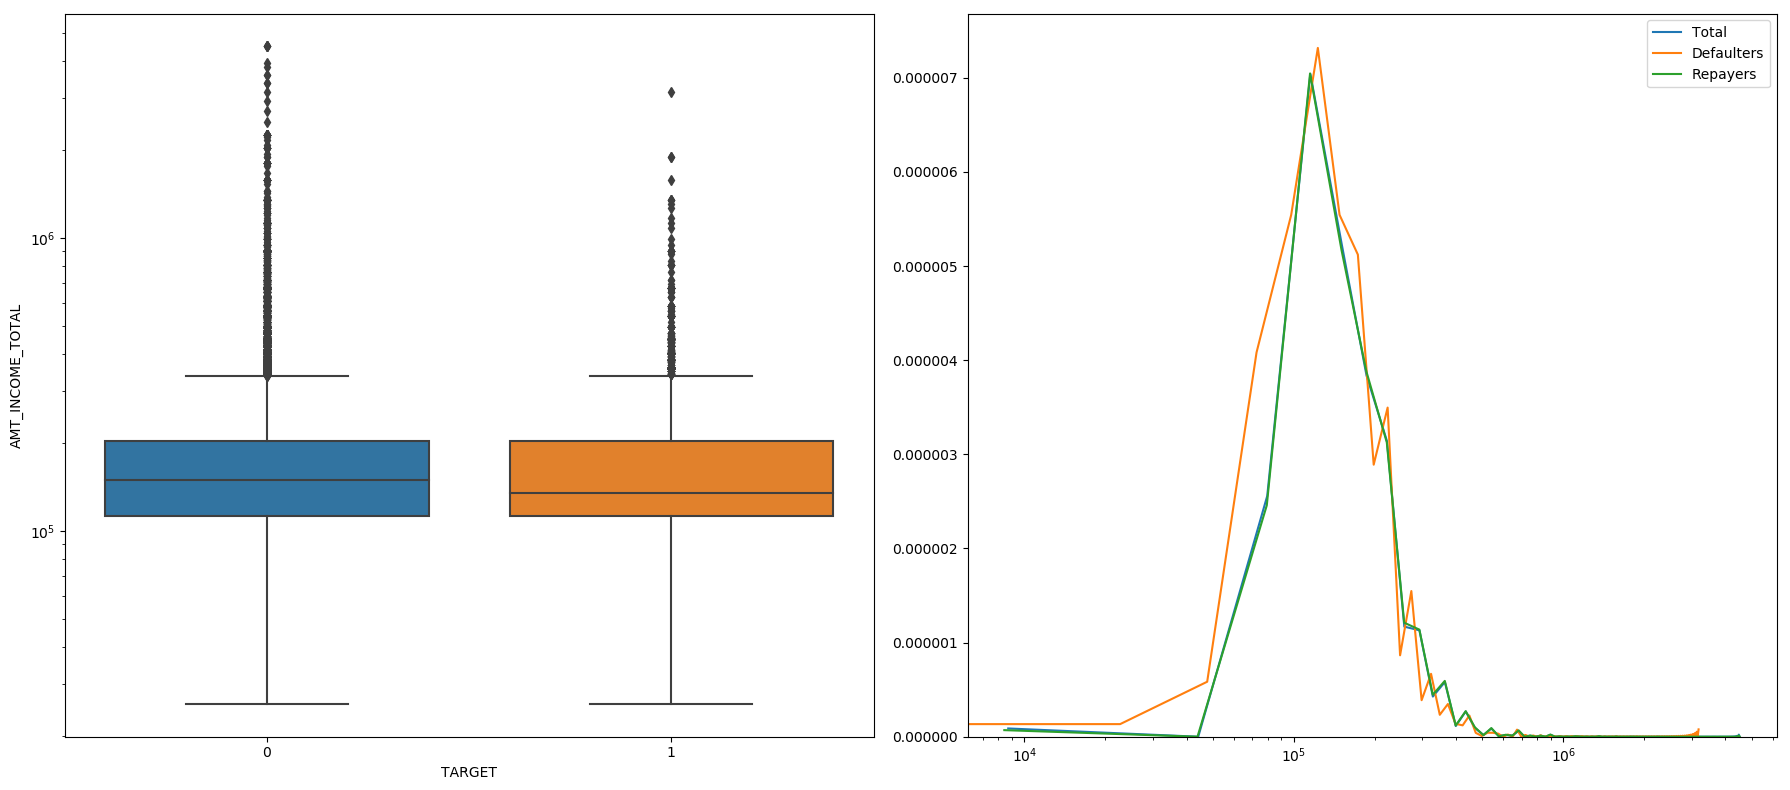

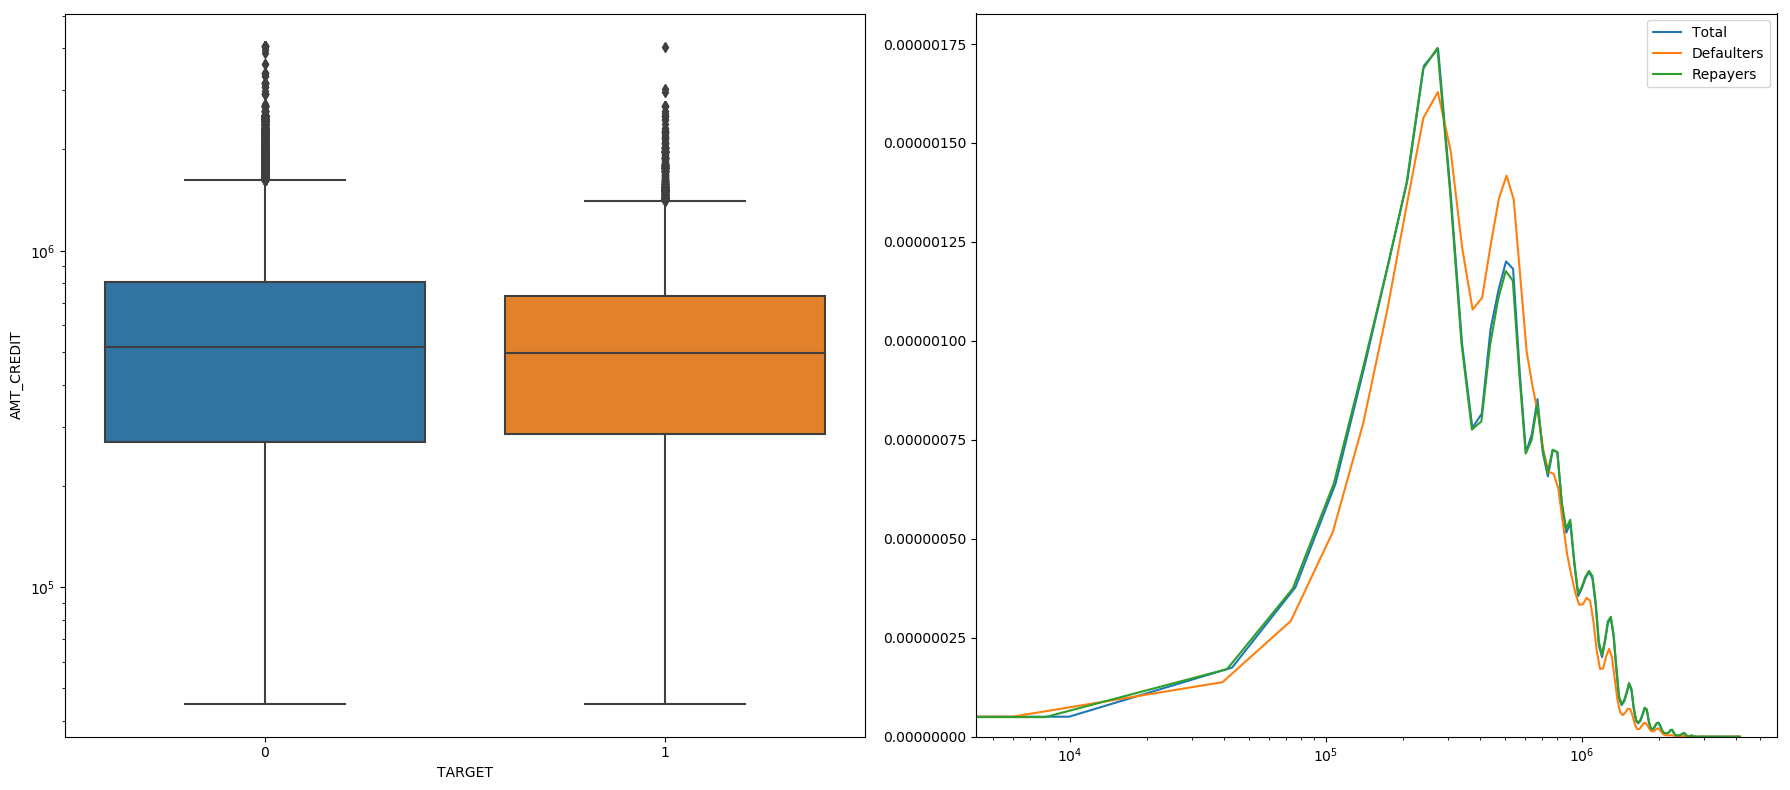

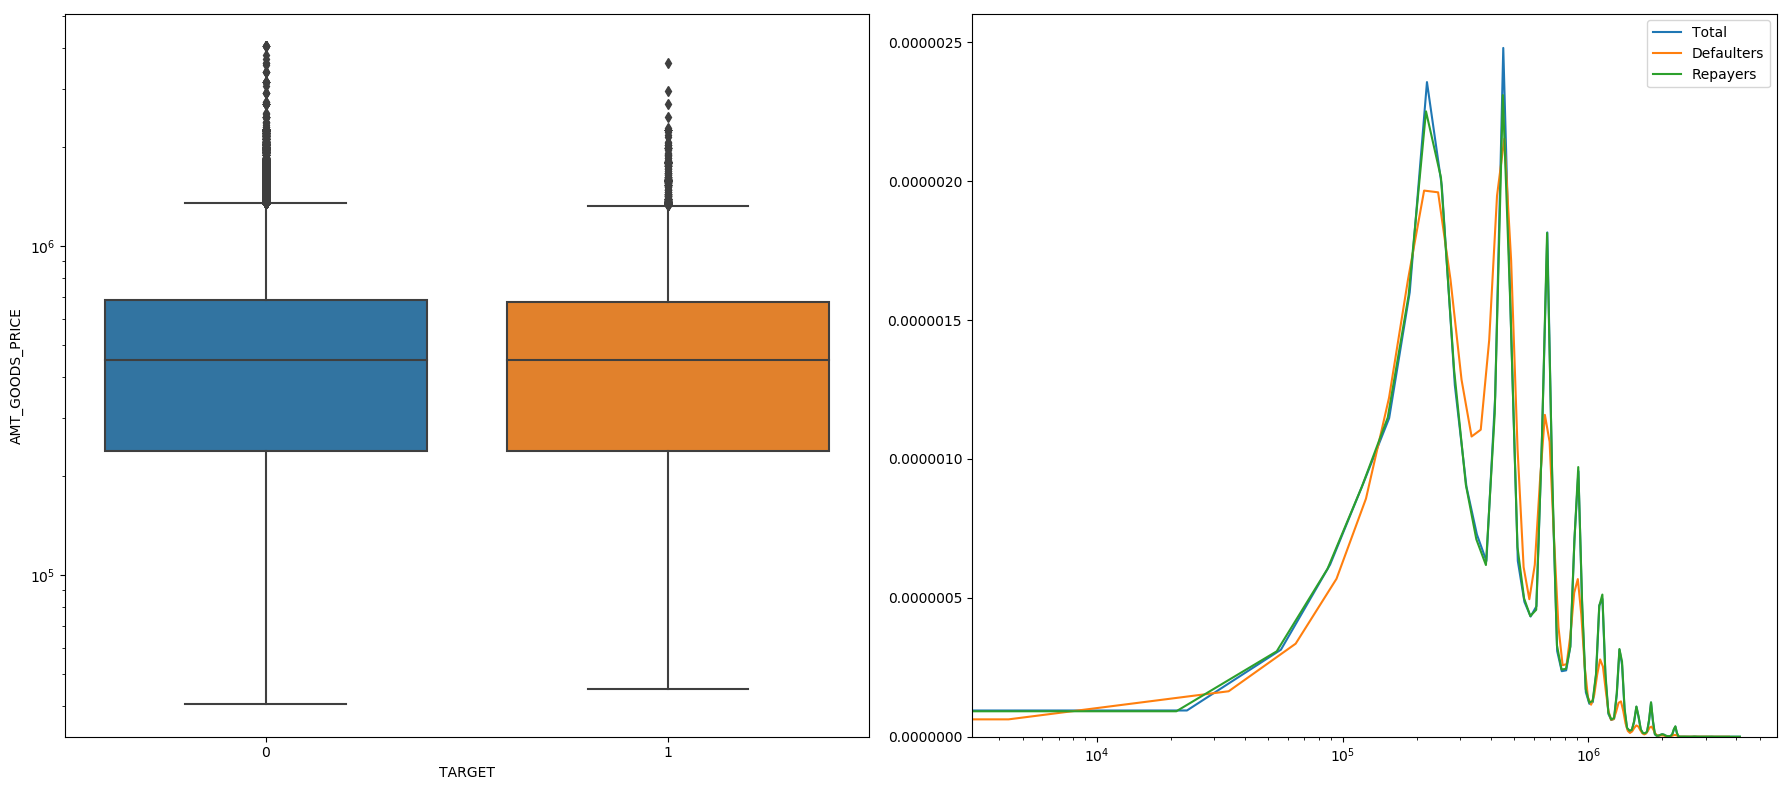

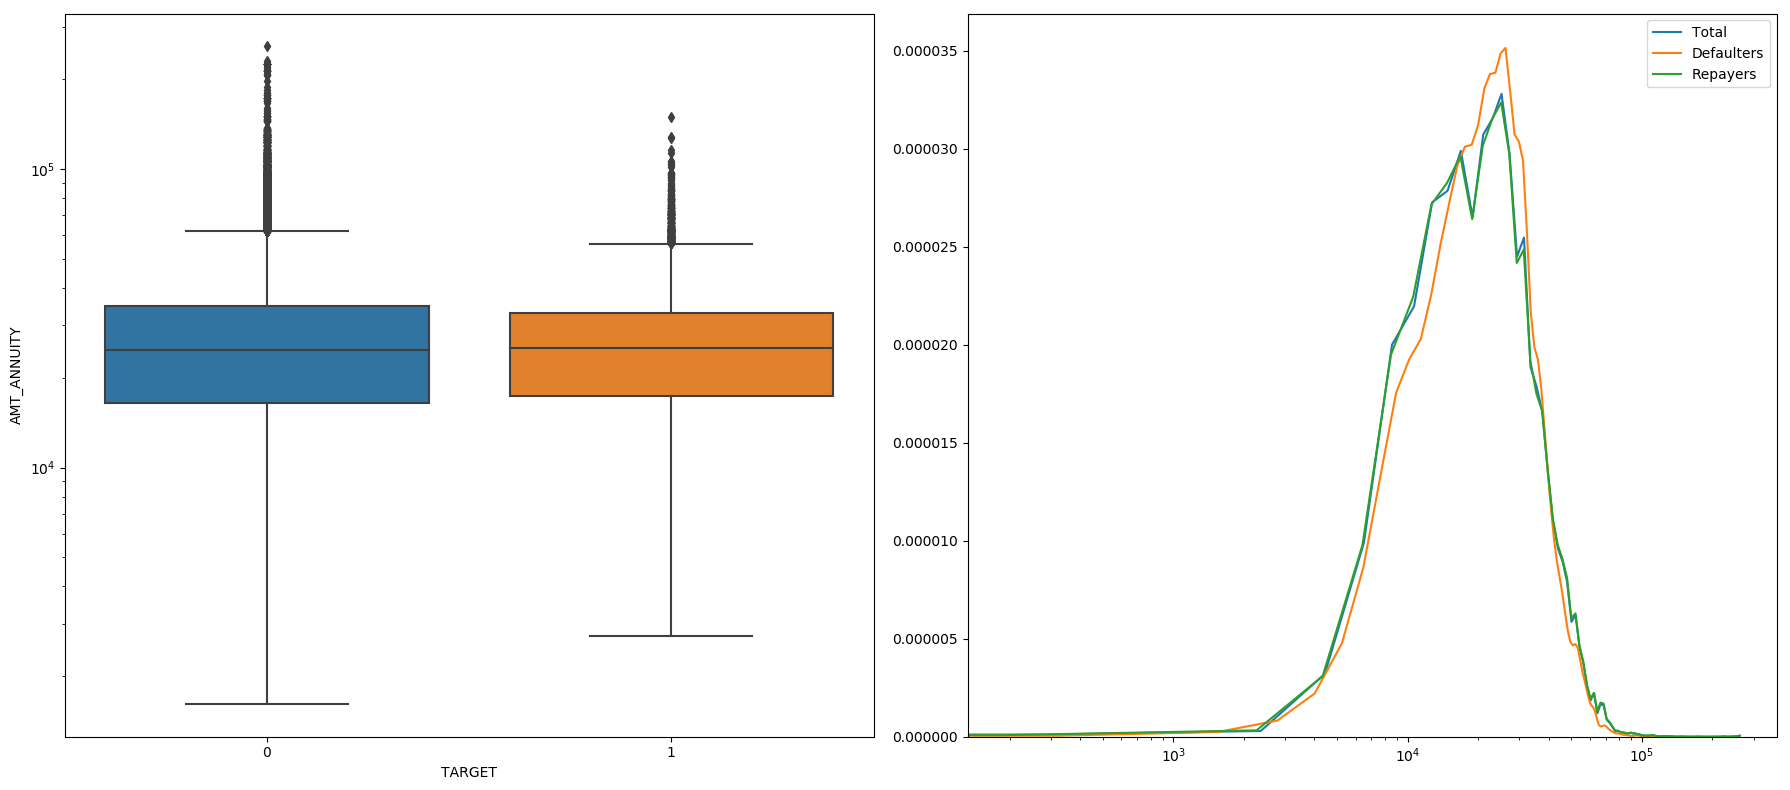

In [33]:
#Again checking the AMT_INCOME_TOTAL column with AMT_CREDIT and AMT_GOODS_PRICE
#plotting distribution of amt_goods_price and quantile values
cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY']
for col in cols:    
    plt.figure(figsize=(18,8), dpi=100)
    plt.subplot(1,2,1)
    sns.boxplot(y =app_data[col],x=app_data['TARGET'])
    plt.yscale('log')
                                                       
    plt.subplot(1,2,2)
    sns.kdeplot(app_data[col], label='Total')
    sns.kdeplot(app_data[app_data['TARGET'] == 1][col],label='Defaulters')
    sns.kdeplot(app_data[app_data['TARGET'] == 0][col],label='Repayers')
    plt.xscale('log')
    plt.tight_layout()
    plt.show()

**Insights from the above graphs:**
1. Clients with payment difficulties have a lower Income per month.
2. Client with high annuity amount had payment difficulty.

In [34]:
#creating the metric of annuity amount to income,ratio > 1 means, annuity amount is greater than income of applicant
app_data['RATIO_INCOME_ANNUITY'] = app_data['AMT_ANNUITY']/app_data['AMT_INCOME_TOTAL']

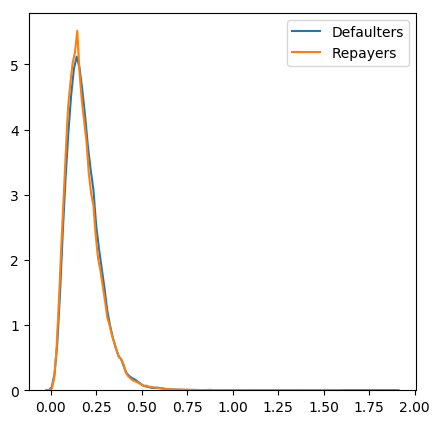

In [35]:
plt.figure(figsize=(5,5), dpi=100)
sns.kdeplot(app_data[app_data['TARGET']==1]['RATIO_INCOME_ANNUITY'], label='Defaulters')
sns.kdeplot(app_data[app_data['TARGET']==0]['RATIO_INCOME_ANNUITY'], label='Repayers')

In [36]:
#creating new metric loan period by dividing amount credit by annuity amount
app_data['LOAN_PERIOD_MONTHS'] = round(app_data['AMT_CREDIT']/app_data['AMT_ANNUITY'])

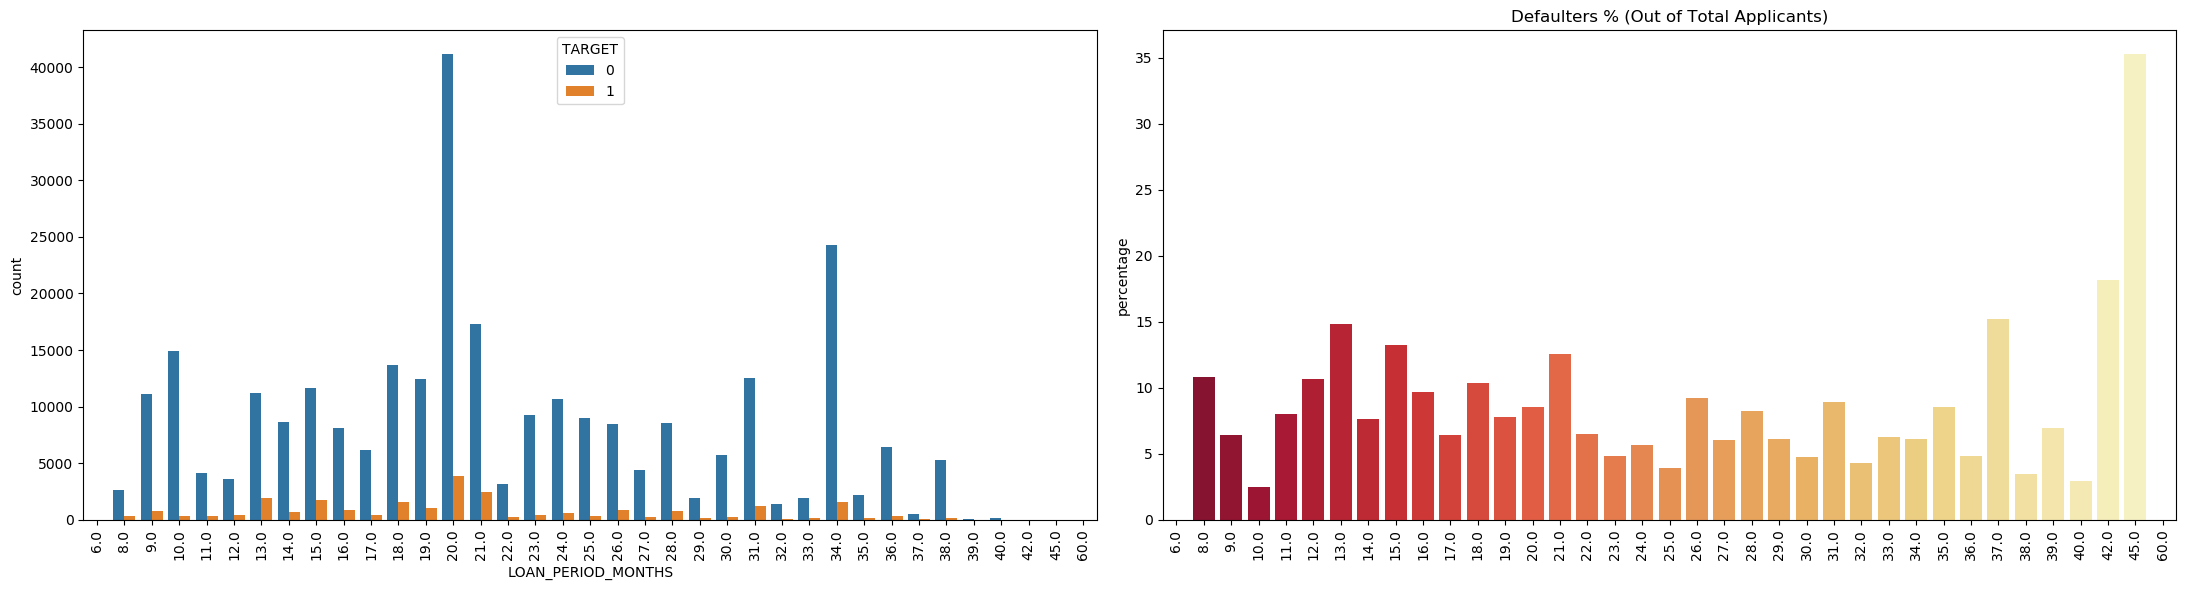

In [37]:
plt.figure(figsize=(22,6), dpi=100)
plt.subplot(1,2,1)
sns.countplot(app_data['LOAN_PERIOD_MONTHS'], hue=app_data['TARGET'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
aa = pd.DataFrame(app_data['LOAN_PERIOD_MONTHS'].value_counts())
aa['DEFAULTER'] = app_data[app_data['TARGET']==1]['LOAN_PERIOD_MONTHS'].value_counts()
aa['percentage'] = round(aa['DEFAULTER']/aa['LOAN_PERIOD_MONTHS']*100,3)
sns.barplot(y=aa['percentage'], x=aa.index, palette='YlOrRd_r')
plt.title('Defaulters % (Out of Total Applicants)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

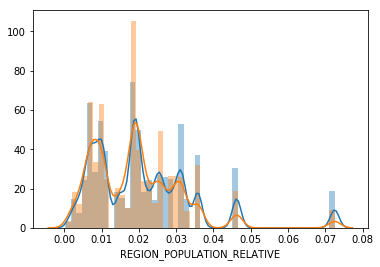

In [38]:
sns.distplot(app_data['REGION_POPULATION_RELATIVE'])
sns.distplot(app_data[app_data['TARGET']==1]['REGION_POPULATION_RELATIVE'])
plt.show()

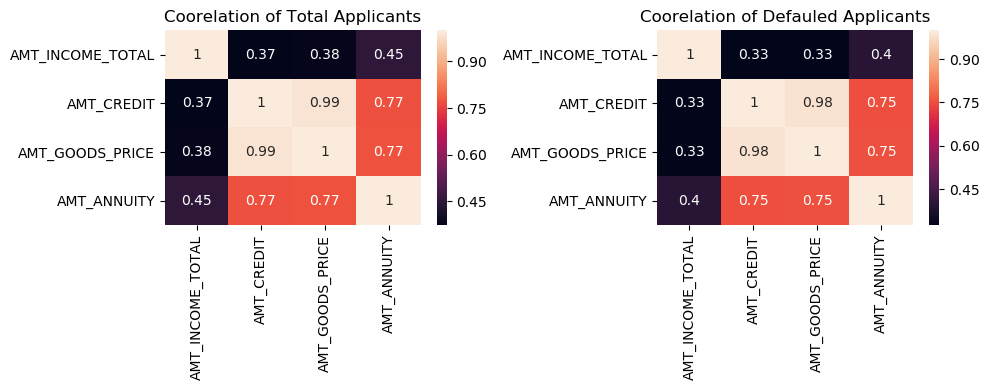

In [39]:
#Let see the coorelation btw the below 4 metrics
cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY']
plt.figure(figsize=(10,4), dpi = 100)
plt.subplot(1,2,1)
corr = app_data[cols].corr()
sns.heatmap(corr, annot=True)
plt.title('Coorelation of Total Applicants')

plt.subplot(1,2,2)
sns.heatmap(app_data[app_data['TARGET']==1][cols].corr(), annot=True)
plt.title('Coorelation of Defauled Applicants')
plt.tight_layout()

plt.show()

As we can see from the above heatmaps, the coorelation of all the variables is less for defaulted applications than coorelation of all applicants.

In [40]:
#converting days into years
cols = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']
for col in cols:
    app_data[col] = round(app_data[col]/365.25,2)

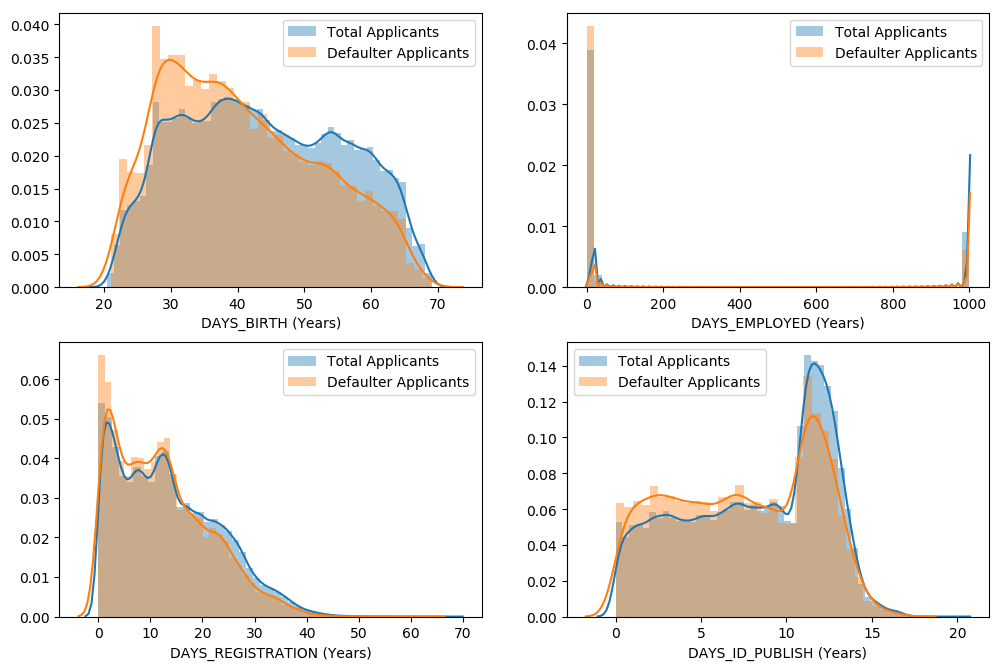

In [41]:
cols = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']
plt.figure(figsize=(12,8), dpi=100)
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.distplot(abs(app_data[cols[i]]), label='Total Applicants')
    sns.distplot(abs(app_data[app_data['TARGET']==1][cols[i]]), label='Defaulter Applicants')
    plt.xlabel(cols[i]+' (Years)')
    plt.legend()
plt.show()

As we can see from above graphs:
1. Applicants of age less than 40 years are more likely to default.
2. We found that some of applicants are employeed from 1000 years, that is not practically possible , we will see this variable.
3. Applicants who changed their registration in 15-20 years are more likely to default.
4. Applicants who changed their ID in 10 years are more likely to default.

In [42]:
#Lets Analyse days employed column
app_data['DAYS_EMPLOYED'].describe()

count    307506.000000
mean        174.718900
std         386.794086
min         -49.040000
25%          -7.560000
50%          -3.320000
75%          -0.790000
max         999.980000
Name: DAYS_EMPLOYED, dtype: float64

As we can see max value of days employed corresponds to 1000 years that cant be practically possible, lets look at occupation type and analyse the column

In [43]:
app_data[app_data['DAYS_EMPLOYED']== 1].shape[0]/app_data.shape[0]

0.0

Since 18 percent of the applicants have not declared their occupation and organization, we have to keep them outside for out analysis of days employed variable

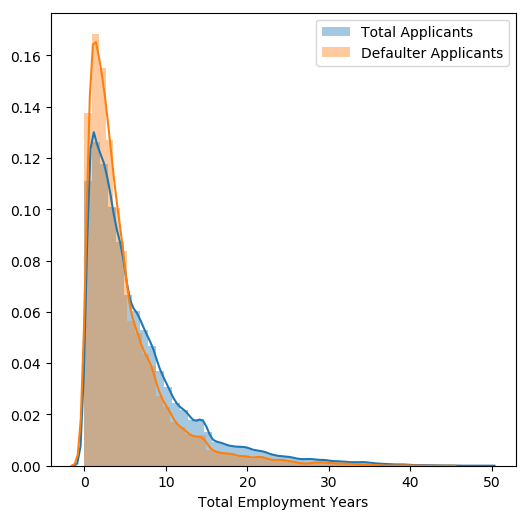

In [109]:
plt.figure(figsize=(6,6), dpi=100)
aa = app_data[app_data['DAYS_EMPLOYED'] < 999.98]
sns.distplot(abs(aa['DAYS_EMPLOYED']), label='Total Applicants')
sns.distplot(abs(aa[aa['TARGET']==1]['DAYS_EMPLOYED']), label='Defaulter Applicants')
plt.xlabel('Total Employment Years')
plt.legend()
plt.show()

We can see the applicants who was employed under 8 years are high in defaulting

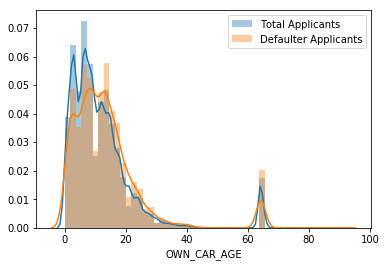

In [45]:
a = app_data[app_data['OWN_CAR_AGE'].isnull() == False]
sns.distplot(abs(a['OWN_CAR_AGE']), label='Total Applicants')
sns.distplot(abs(a[a['TARGET']==1]['OWN_CAR_AGE']), label='Defaulter Applicants')
plt.legend()
plt.show()

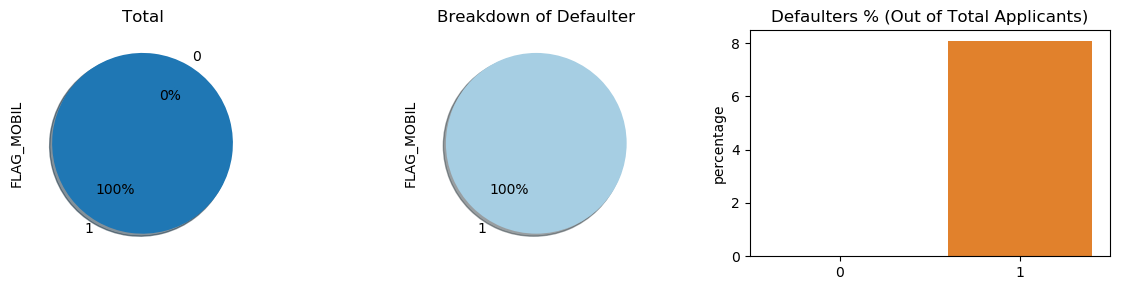

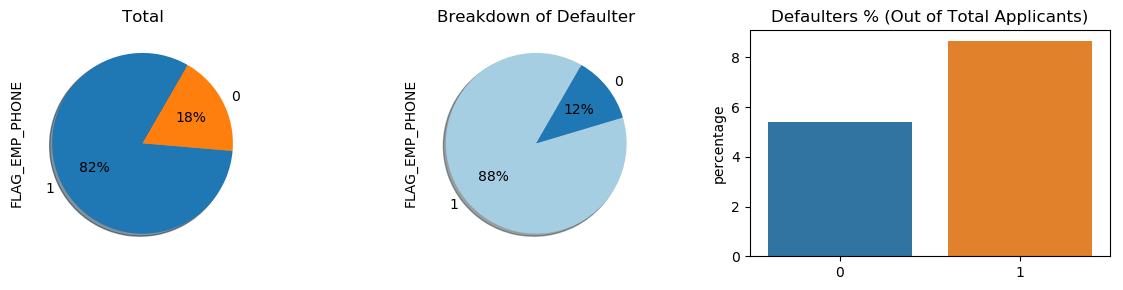

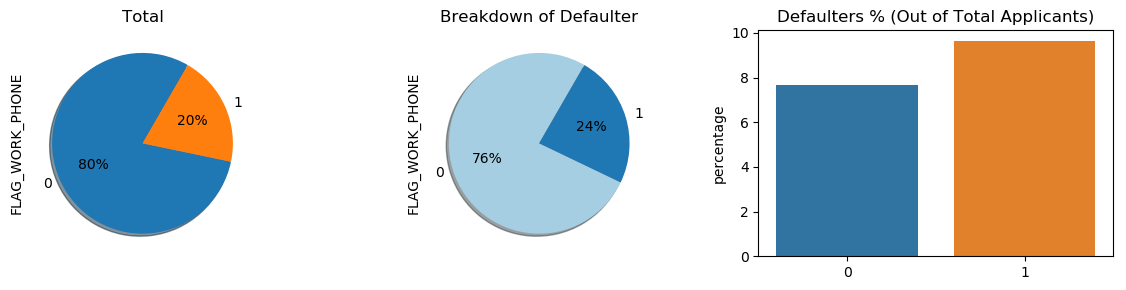

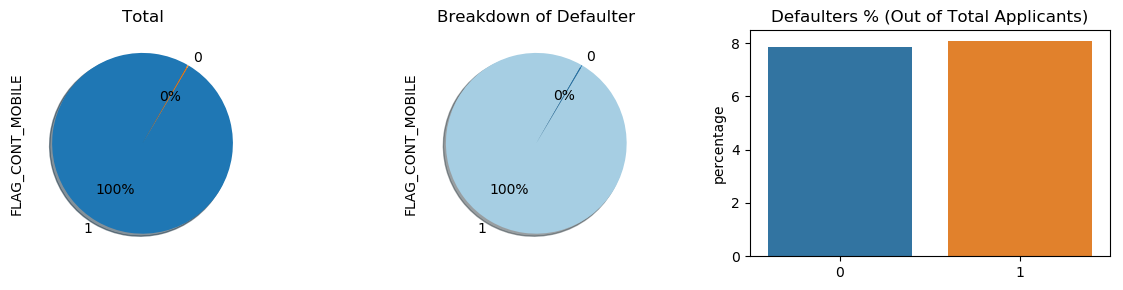

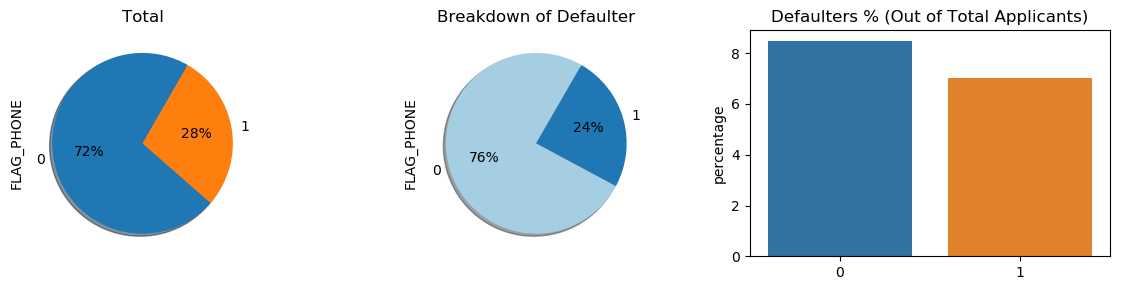

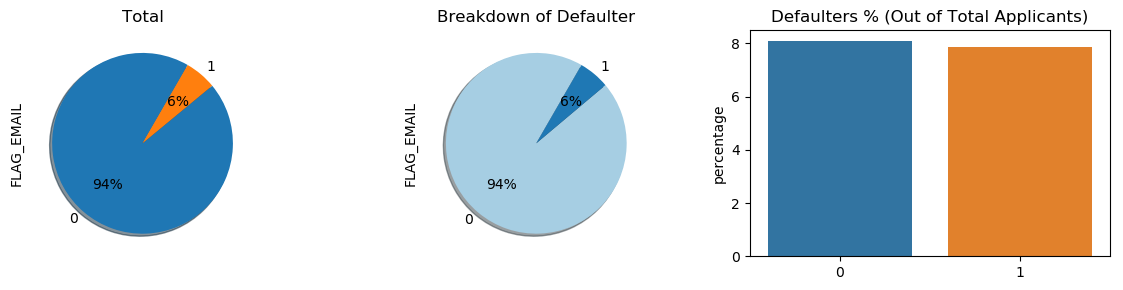

In [46]:
a = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']

for col in a:
    plt.figure(figsize=(12,3), dpi=100)
    plt.subplot(1,3,1)
    app_data[col].value_counts().plot.pie(autopct='%1.0f%%', startangle=60, shadow = True)
    plt.title('Total')
    plt.subplot(1,3,2)
    app_data[app_data['TARGET'] == 1][col].value_counts().plot.pie(autopct='%1.0f%%', startangle=60, shadow = True,
                                                                  colors = sns.color_palette('Paired'))
    plt.title('Breakdown of Defaulter')
    
    plt.subplot(1,3,3)
    aa = pd.DataFrame(app_data[col].value_counts())
    aa['DEFAULTER'] = app_data[app_data['TARGET']==1][col].value_counts()
    aa['percentage'] = round(aa['DEFAULTER']/aa[col]*100,3)
    sns.barplot(y=aa['percentage'], x=aa.index)
    plt.title('Defaulters % (Out of Total Applicants)')

    plt.tight_layout()
    plt.show()

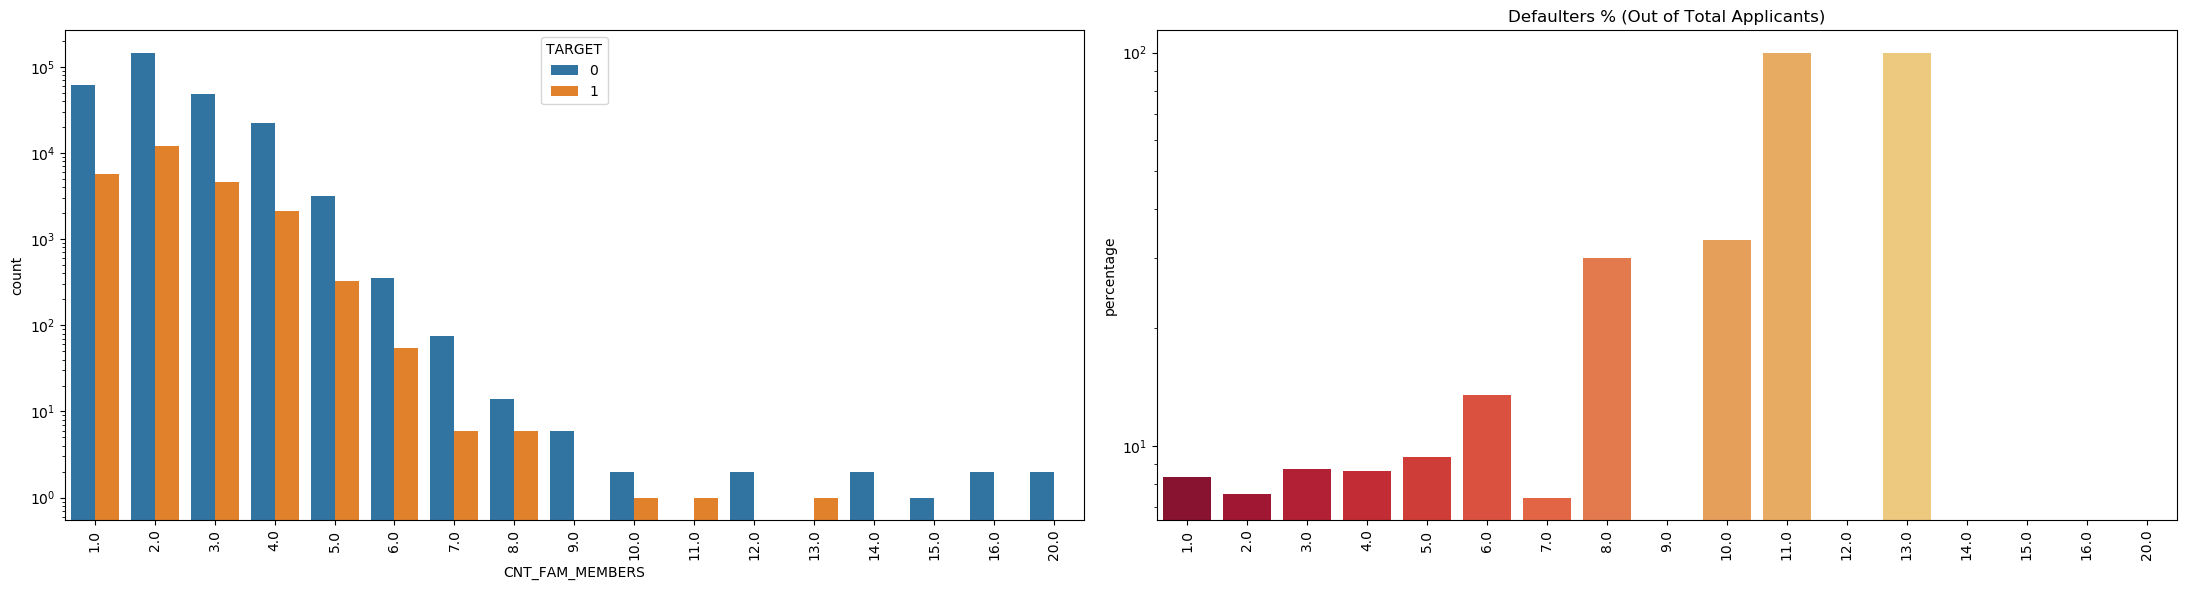

In [47]:
#lets analye count of family members, more the no of members in family, more the dependency , more likely to default
plt.figure(figsize=(22,6), dpi=100)
plt.subplot(1,2,1)
sns.countplot(app_data['CNT_FAM_MEMBERS'], hue=app_data['TARGET'])
plt.yscale('log')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
aa = pd.DataFrame(app_data['CNT_FAM_MEMBERS'].value_counts())
aa['DEFAULTER'] = app_data[app_data['TARGET']==1]['CNT_FAM_MEMBERS'].value_counts()
aa['percentage'] = round(aa['DEFAULTER']/aa['CNT_FAM_MEMBERS']*100,3)
sns.barplot(y=aa['percentage'], x=aa.index, palette='YlOrRd_r')
plt.title('Defaulters % (Out of Total Applicants)')
plt.yscale('log')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

As we can see from the above two graphs, more the no of family members , applicant is more likely to default. Applicants who have family members more than 4 has higher percentage of default.

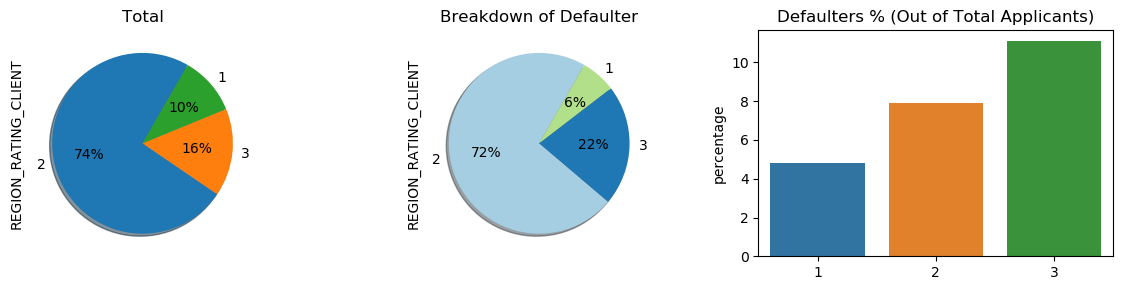

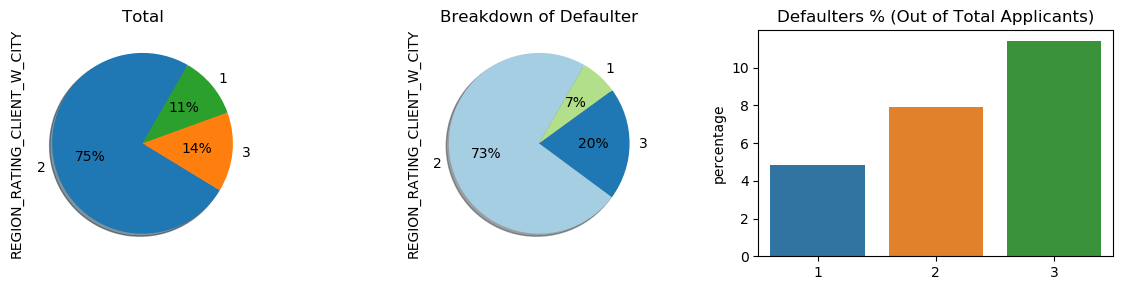

In [48]:
a = ['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']

for col in a:
    plt.figure(figsize=(12,3), dpi=100)
    plt.subplot(1,3,1)
    app_data[col].value_counts().plot.pie(autopct='%1.0f%%', startangle=60, shadow = True)
    plt.title('Total')
    plt.subplot(1,3,2)
    app_data[app_data['TARGET'] == 1][col].value_counts().plot.pie(autopct='%1.0f%%', startangle=60, shadow = True,
                                                                  colors = sns.color_palette('Paired'))
    plt.title('Breakdown of Defaulter')
    
    plt.subplot(1,3,3)
    aa = pd.DataFrame(app_data[col].value_counts())
    aa['DEFAULTER'] = app_data[app_data['TARGET']==1][col].value_counts()
    aa['percentage'] = round(aa['DEFAULTER']/aa[col]*100,3)
    sns.barplot(y=aa['percentage'], x=aa.index)
    plt.title('Defaulters % (Out of Total Applicants)')

    plt.tight_layout()
    plt.show()

### As we can see, it is very clear, the applicants who have rating of 3 have high chances of default. i.e  less is the rating more likely client will have payment difficulty.

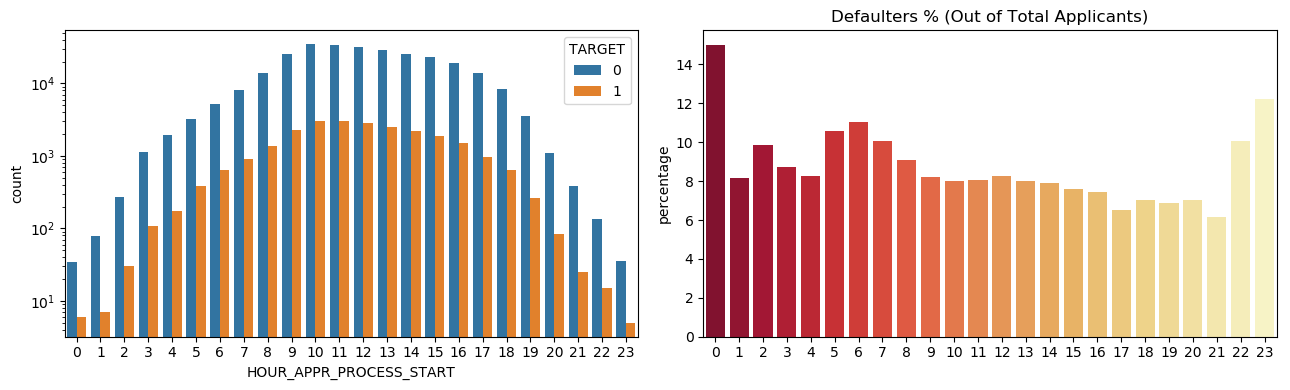

In [49]:
plt.figure(figsize=(13,4), dpi=100)
plt.subplot(1,2,1)
sns.countplot(app_data['HOUR_APPR_PROCESS_START'], hue=app_data['TARGET'])
plt.yscale('log')

plt.subplot(1,2,2)
aa = pd.DataFrame(app_data['HOUR_APPR_PROCESS_START'].value_counts())
aa['DEFAULTER'] = app_data[app_data['TARGET']==1]['HOUR_APPR_PROCESS_START'].value_counts()
aa['percentage'] = round(aa['DEFAULTER']/aa['HOUR_APPR_PROCESS_START']*100,3)
sns.barplot(y=aa['percentage'], x=aa.index, palette='YlOrRd_r')
plt.title('Defaulters % (Out of Total Applicants)')
plt.tight_layout()
plt.show()

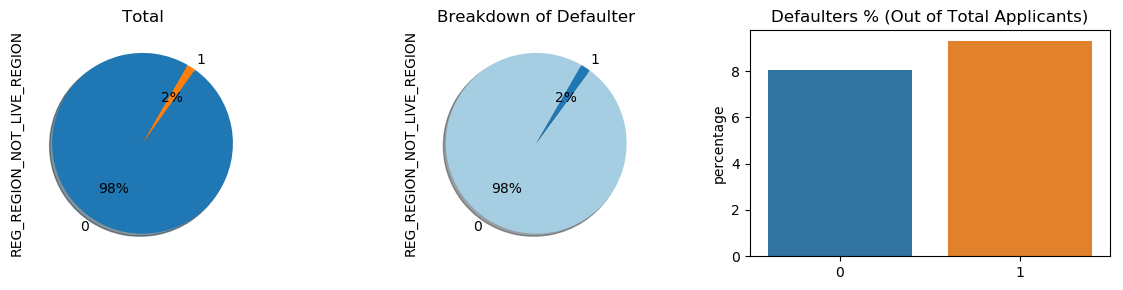

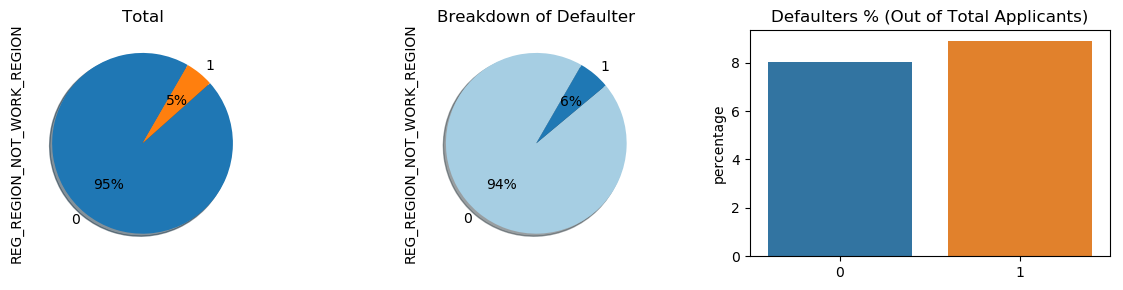

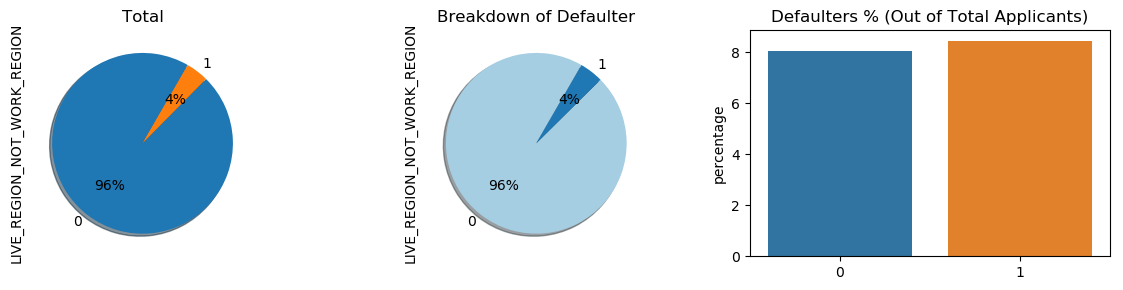

In [50]:
a = ['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION']

for col in a:
    plt.figure(figsize=(12,3), dpi=100)
    plt.subplot(1,3,1)
    app_data[col].value_counts().plot.pie(autopct='%1.0f%%', startangle=60, shadow = True)
    plt.title('Total')
    plt.subplot(1,3,2)
    app_data[app_data['TARGET'] == 1][col].value_counts().plot.pie(autopct='%1.0f%%', startangle=60, shadow = True,
                                                                  colors = sns.color_palette('Paired'))
    plt.title('Breakdown of Defaulter')
    
    plt.subplot(1,3,3)
    aa = pd.DataFrame(app_data[col].value_counts())
    aa['DEFAULTER'] = app_data[app_data['TARGET']==1][col].value_counts()
    aa['percentage'] = round(aa['DEFAULTER']/aa[col]*100,3)
    sns.barplot(y=aa['percentage'], x=aa.index)
    plt.title('Defaulters % (Out of Total Applicants)')

    plt.tight_layout()
    plt.show()

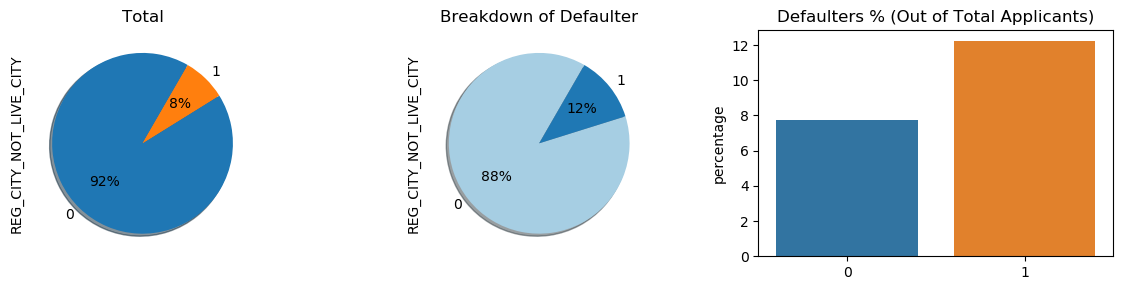

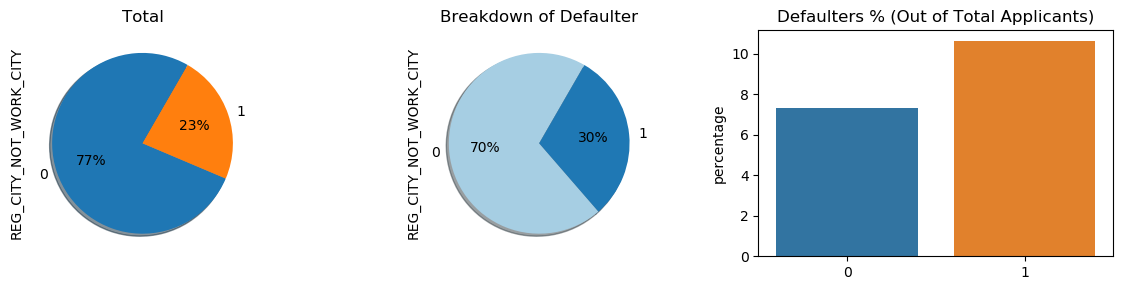

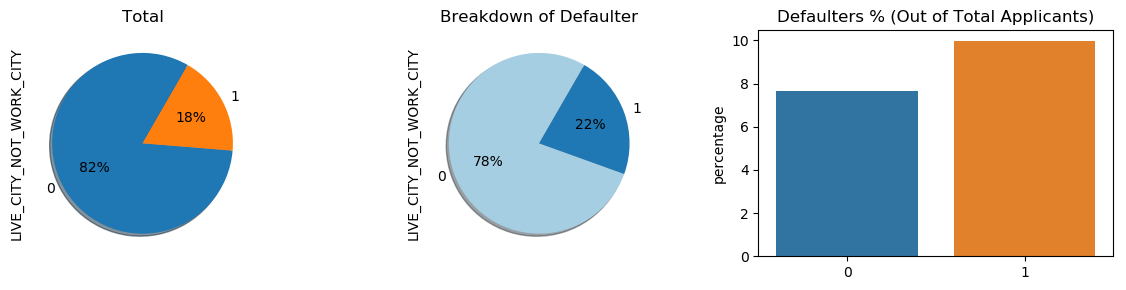

In [51]:
a = ['REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']

for col in a:
    plt.figure(figsize=(12,3), dpi=100)
    plt.subplot(1,3,1)
    app_data[col].value_counts().plot.pie(autopct='%1.0f%%', startangle=60, shadow = True)
    plt.title('Total')
    plt.subplot(1,3,2)
    app_data[app_data['TARGET'] == 1][col].value_counts().plot.pie(autopct='%1.0f%%', startangle=60, shadow = True,
                                                                  colors = sns.color_palette('Paired'))
    plt.title('Breakdown of Defaulter')
    
    plt.subplot(1,3,3)
    aa = pd.DataFrame(app_data[col].value_counts())
    aa['DEFAULTER'] = app_data[app_data['TARGET']==1][col].value_counts()
    aa['percentage'] = round(aa['DEFAULTER']/aa[col]*100,3)
    sns.barplot(y=aa['percentage'], x=aa.index)
    plt.title('Defaulters % (Out of Total Applicants)')

    plt.tight_layout()
    plt.show()

As we can see, we dont have much relation of applicant contact address, work address and permanent address at region level, but at city level picture is different. We can see who have a different address are more in percentage who are defaulting.

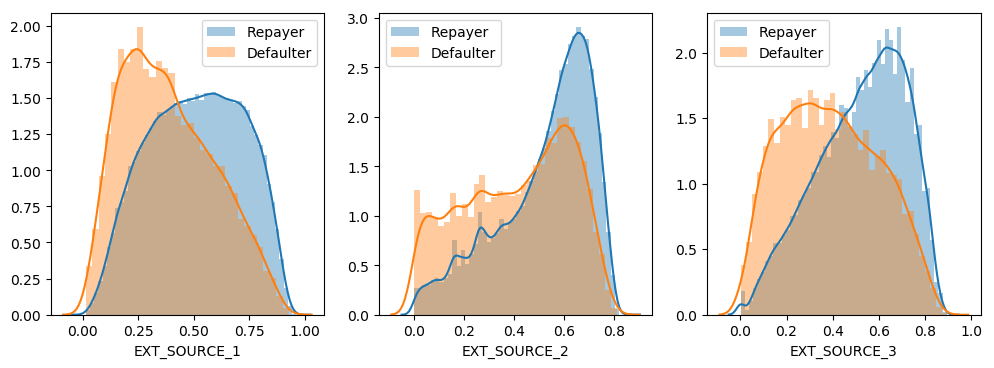

In [52]:
cols = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']

plt.figure(figsize=(12,4), dpi=100)
for i in range(len(cols)):
    plt.subplot(1,3,i+1)
    sns.distplot(app_data[(app_data['TARGET']==0) & (app_data[cols[i]].notnull())][cols[i]], label='Repayer')
    sns.distplot(app_data[(app_data['TARGET']==1) & (app_data[cols[i]].notnull())][cols[i]], label='Defaulter')
    plt.legend()
plt.show()
        
        

**Normalised Credit score for defaulters is comapratively low for all the external sources.**

Now analysing all the normalised columns

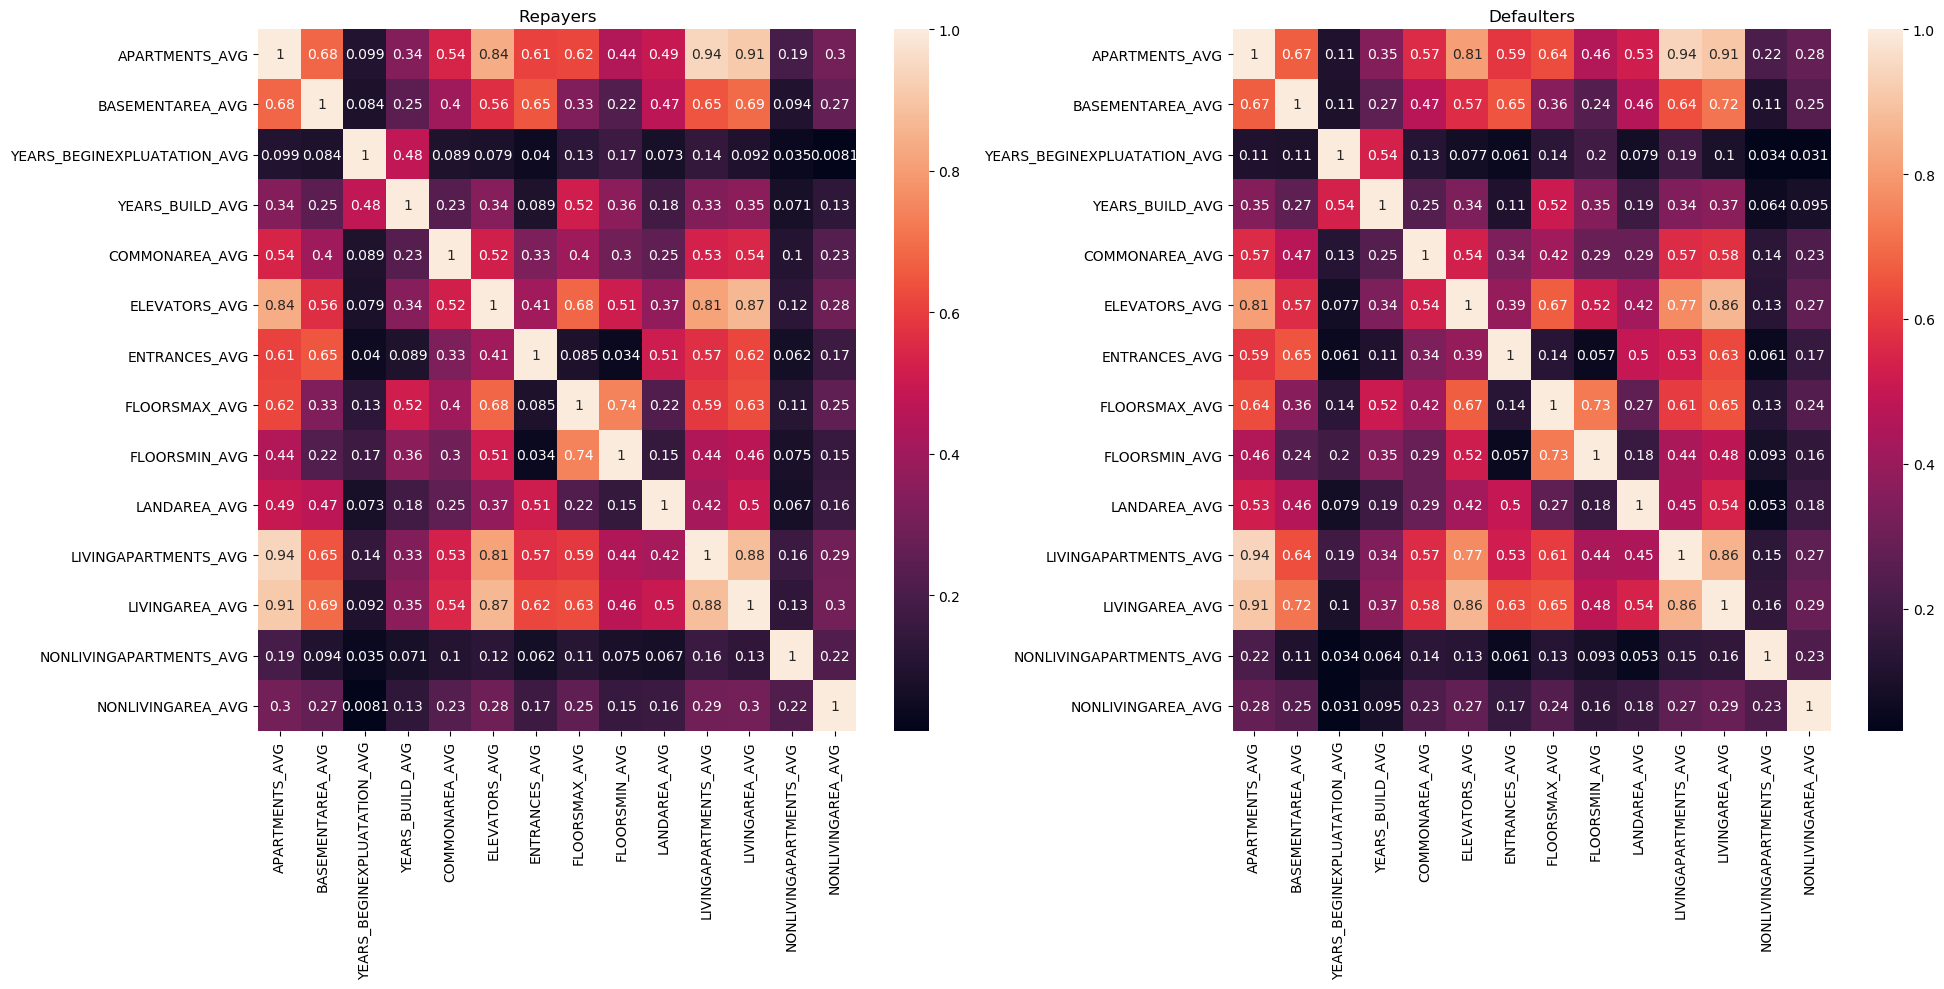

In [53]:
cols_avg = ['APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG',
        'COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG',
        'LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG']
#analysing repayers
plt.figure(figsize=(20,10), dpi=100)
plt.subplot(1,2,1)
sns.heatmap(app_data[app_data['TARGET']==0][cols_avg].corr(), annot=True)
plt.title('Repayers')

#analysing defaulters
plt.subplot(1,2,2)
sns.heatmap(app_data[app_data['TARGET']==1][cols_avg].corr(), annot=True)
plt.title('Defaulters')
plt.tight_layout()
plt.show()

As we can see coorelation value of defaluters is **low** for most of the variables

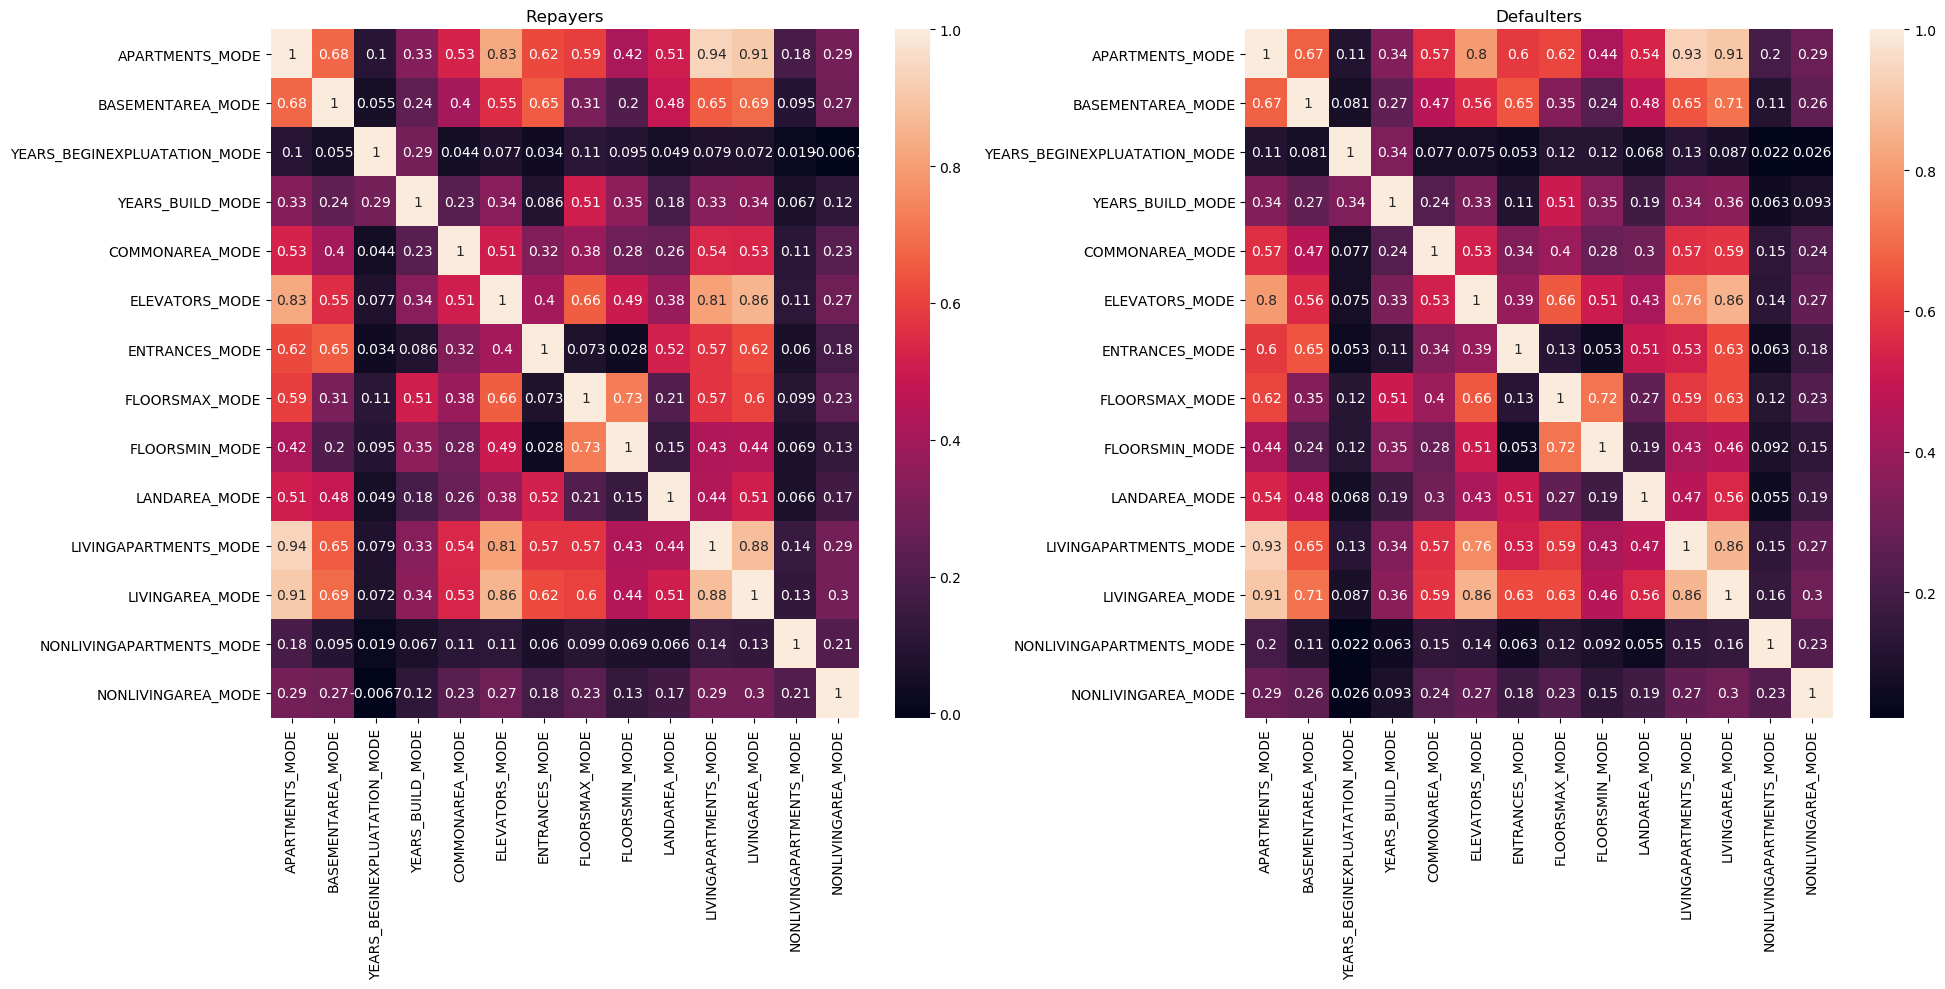

In [54]:
cols_mode = ['APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE',
             'ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE',
             'LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE']
#analysing repayers
plt.figure(figsize=(20,10), dpi=100)
plt.subplot(1,2,1)
sns.heatmap(app_data[app_data['TARGET']==0][cols_mode].corr(), annot=True)
plt.title('Repayers')

#analysing defaulters
plt.subplot(1,2,2)
sns.heatmap(app_data[app_data['TARGET']==1][cols_mode].corr(), annot=True)
plt.title('Defaulters')
plt.tight_layout()
plt.show()

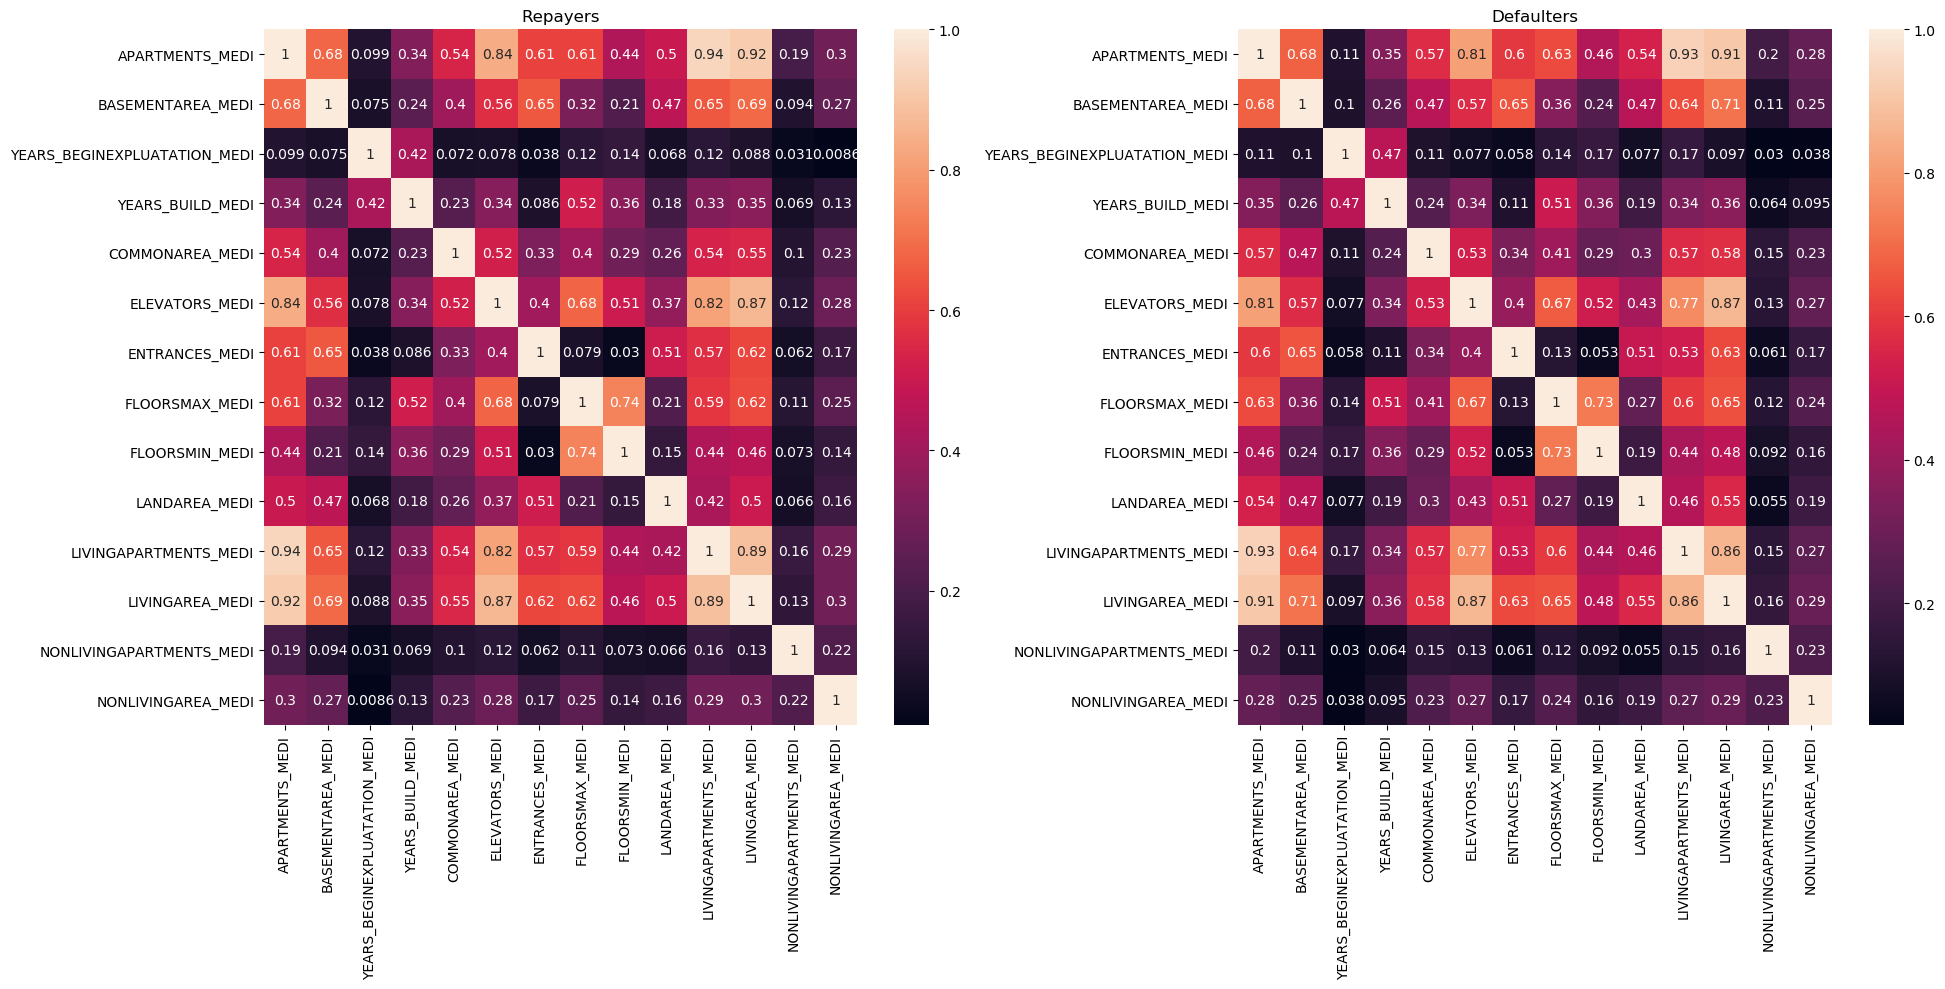

In [55]:
cols_medi = ['APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI',
        'COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI',
        'LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI']
#analysing repayers
plt.figure(figsize=(20,10), dpi=100)
plt.subplot(1,2,1)
sns.heatmap(app_data[app_data['TARGET']==0][cols_medi].corr(), annot=True)
plt.title('Repayers')

#analysing defaulters
plt.subplot(1,2,2)
sns.heatmap(app_data[app_data['TARGET']==1][cols_medi].corr(), annot=True)
plt.title('Defaulters')
plt.tight_layout()
plt.show()

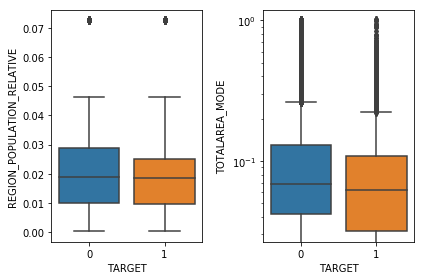

In [56]:
plt.subplot(1,2,1)
sns.boxplot(y=app_data['REGION_POPULATION_RELATIVE'], x=app_data['TARGET'])
plt.subplot(1,2,2)
sns.boxplot(y=app_data['TOTALAREA_MODE'], x=app_data['TARGET'])
plt.yscale('log')
plt.tight_layout()
plt.show()

Clients having less TOTAL_AREA_MODE normalised score are more likely to default.

In [57]:
app_data[cols].head()

EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3
0      0.083037      0.262949      0.139376
1      0.311267      0.622246           NaN
2           NaN      0.555912      0.729567
3           NaN      0.650442           NaN
4           NaN      0.322738           NaN

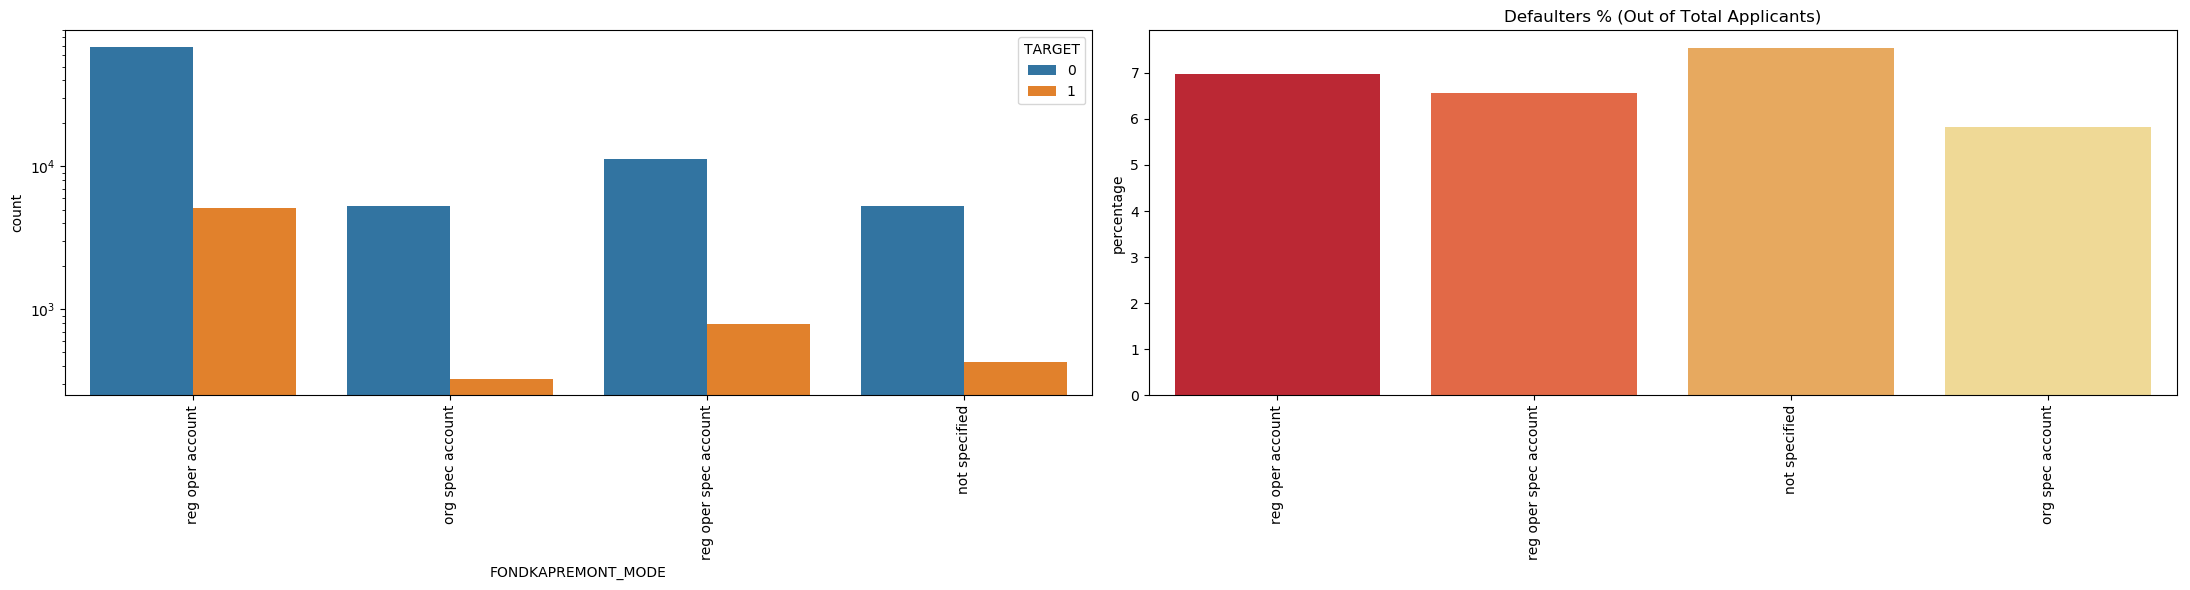

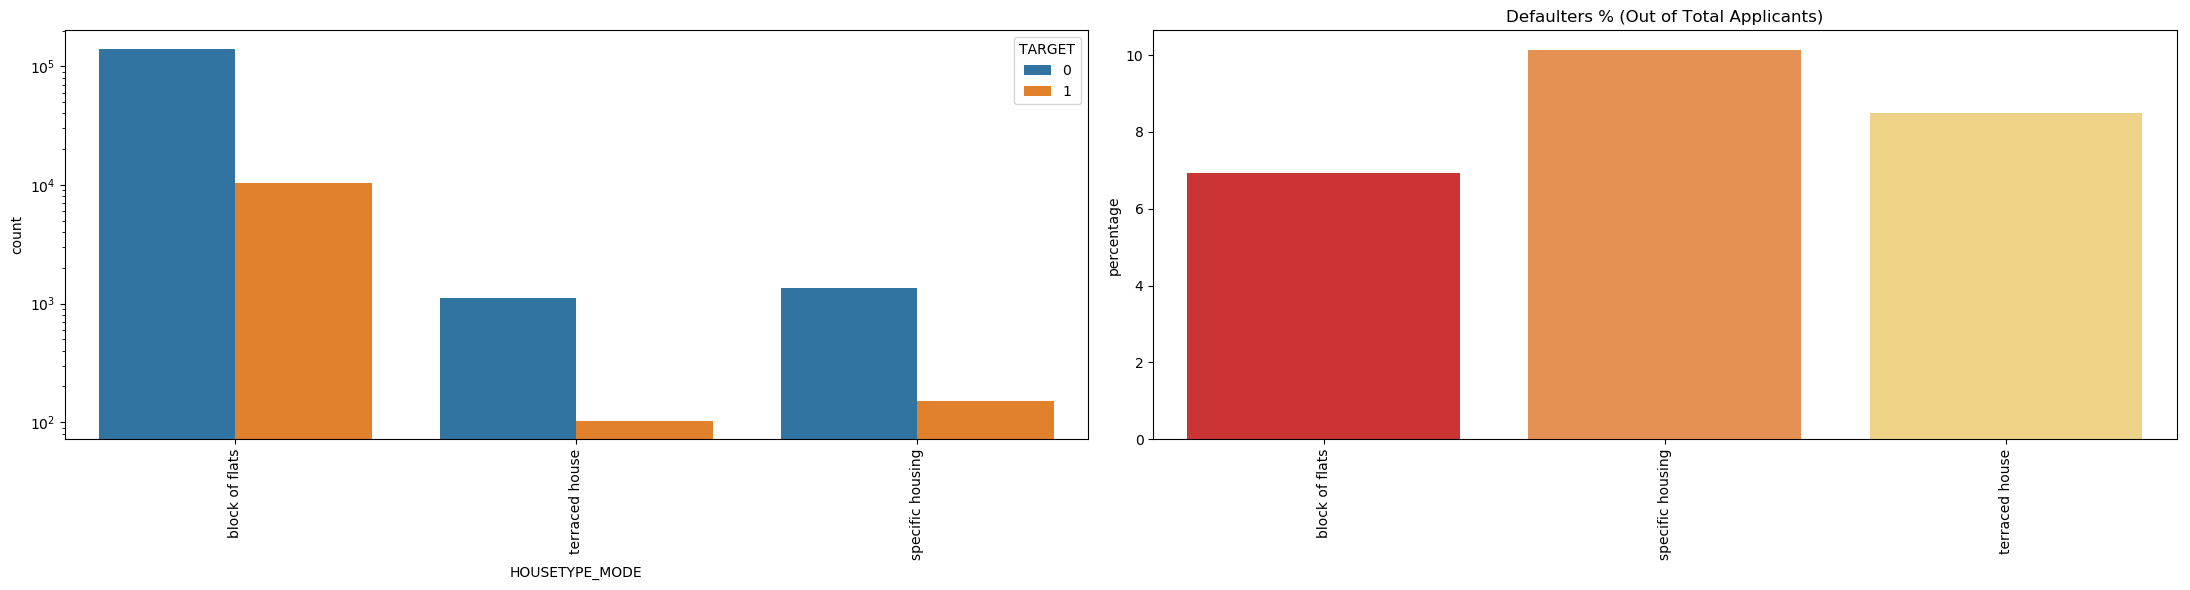

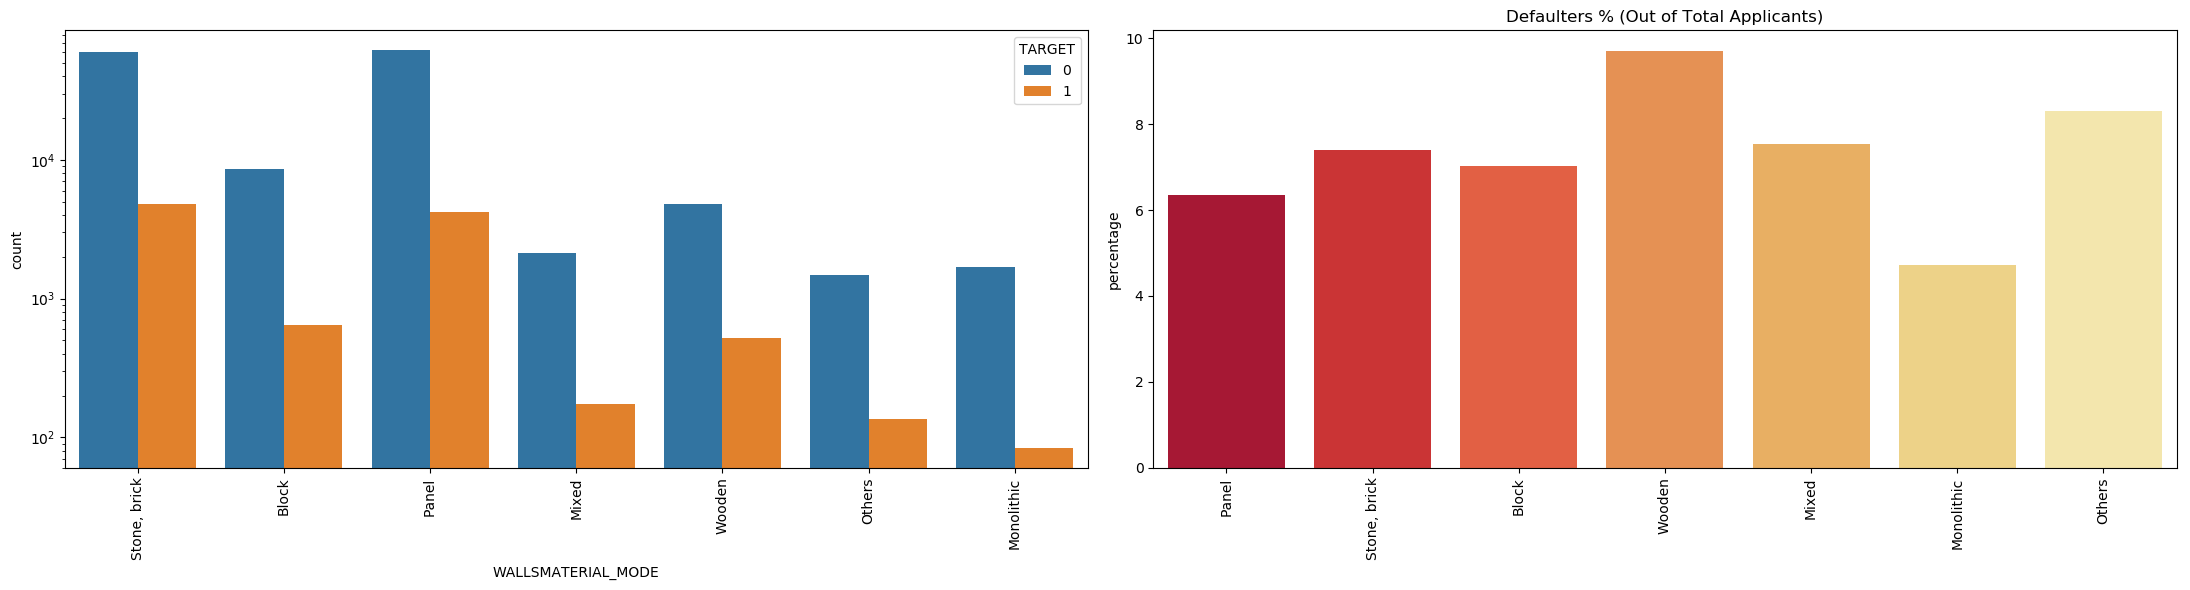

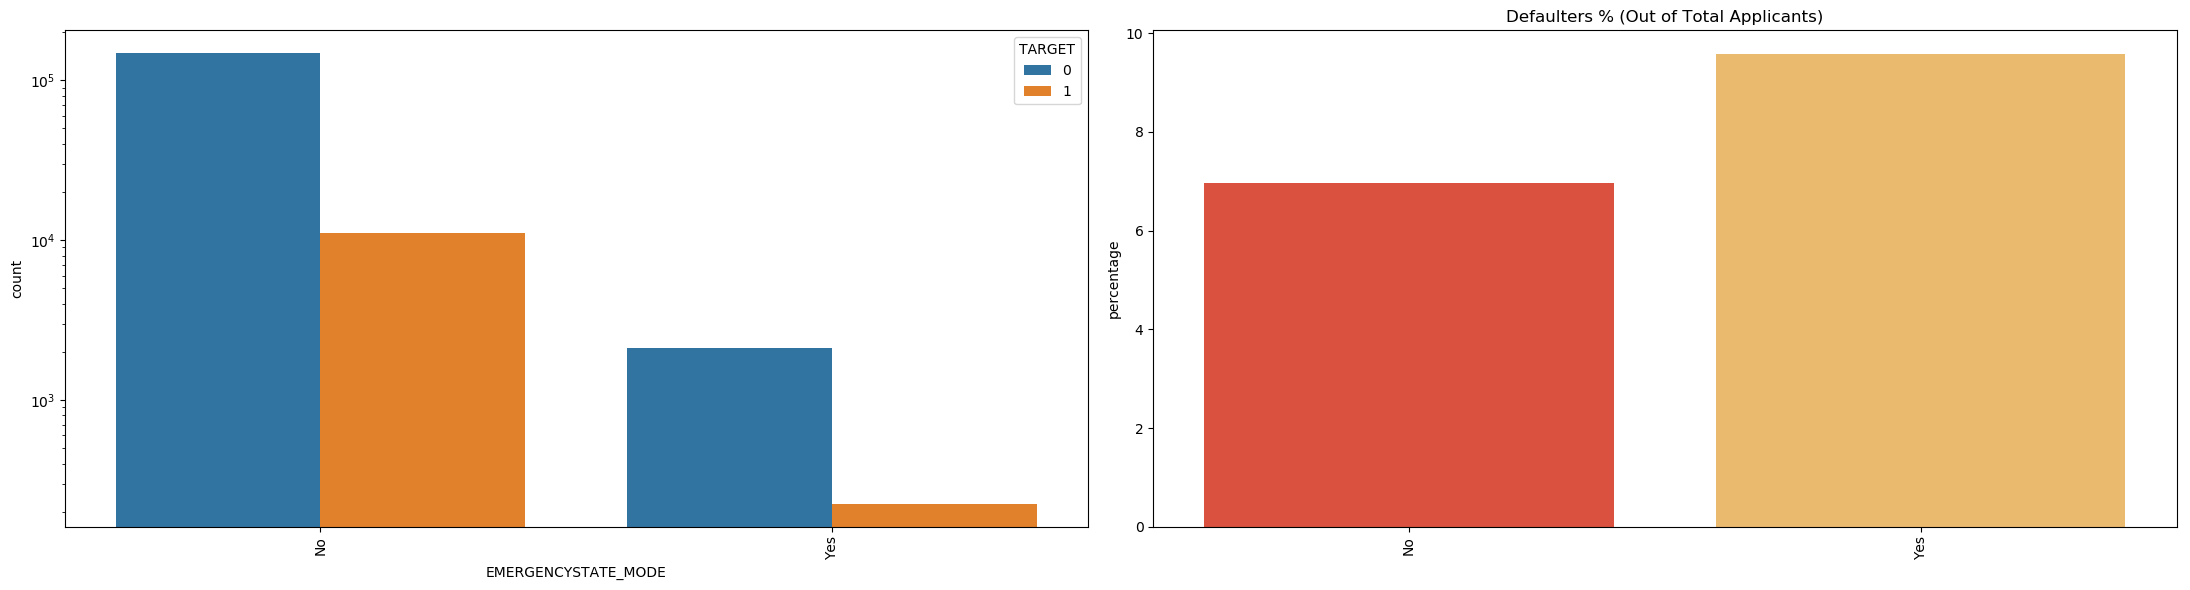

In [58]:
cols = ['FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE']

for col in cols:
    plt.figure(figsize=(22,6), dpi=100)
    plt.subplot(1,2,1)
    sns.countplot(app_data[col], hue=app_data['TARGET'])
    plt.xticks(rotation=90)
    plt.yscale('log')
    
    plt.subplot(1,2,2)
    aa = pd.DataFrame(app_data[col].value_counts())
    aa['DEFAULTER'] = app_data[app_data['TARGET']==1][col].value_counts()
    aa['percentage'] = round(aa['DEFAULTER']/aa[col]*100,3)
    sns.barplot(y=aa['percentage'], x=aa.index, palette='YlOrRd_r')
    plt.title('Defaulters % (Out of Total Applicants)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

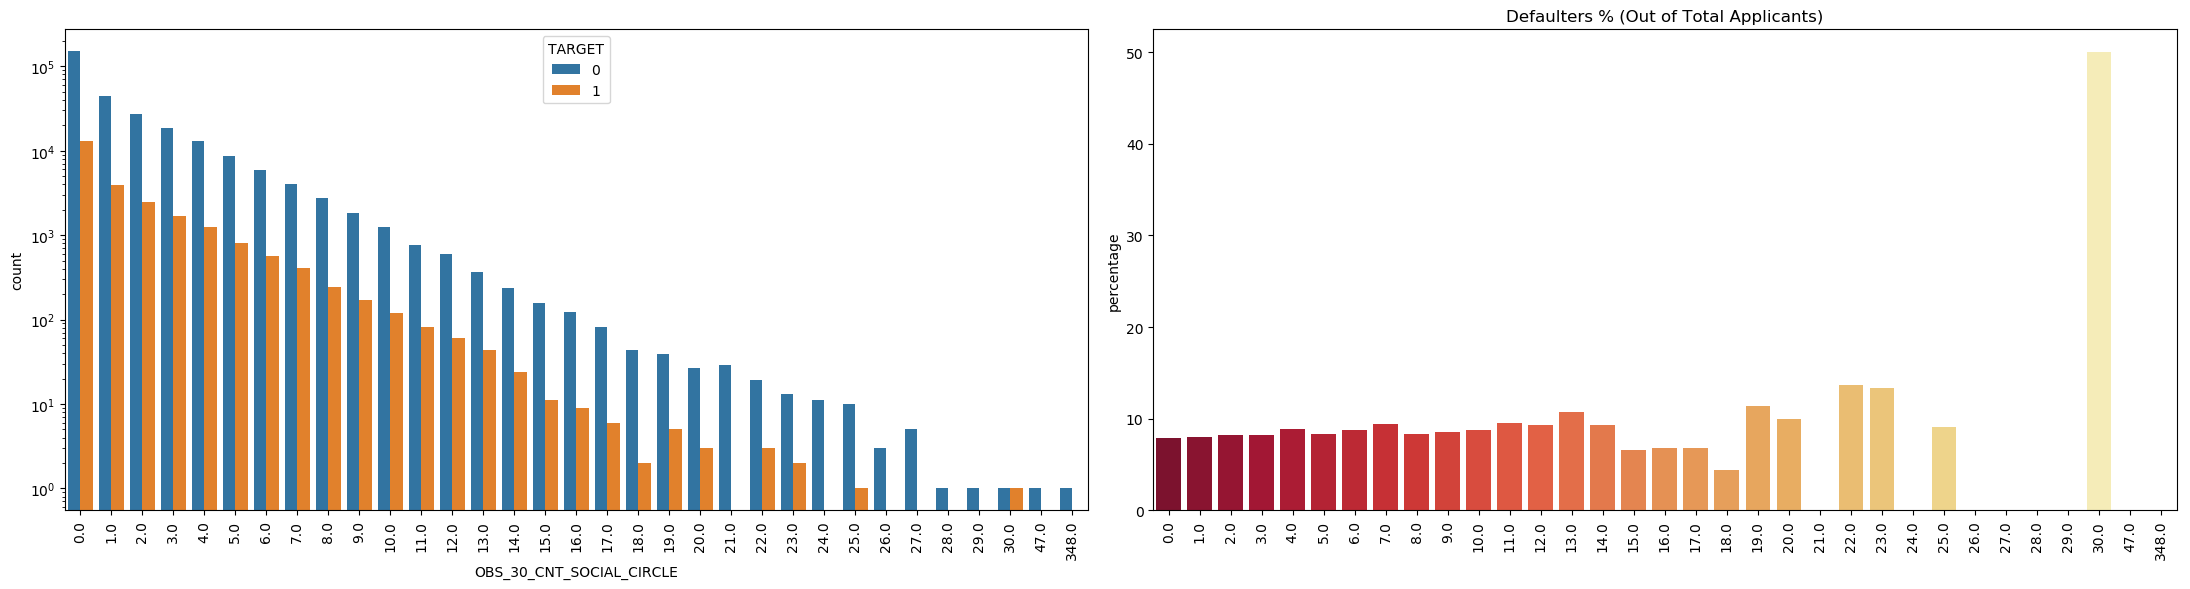

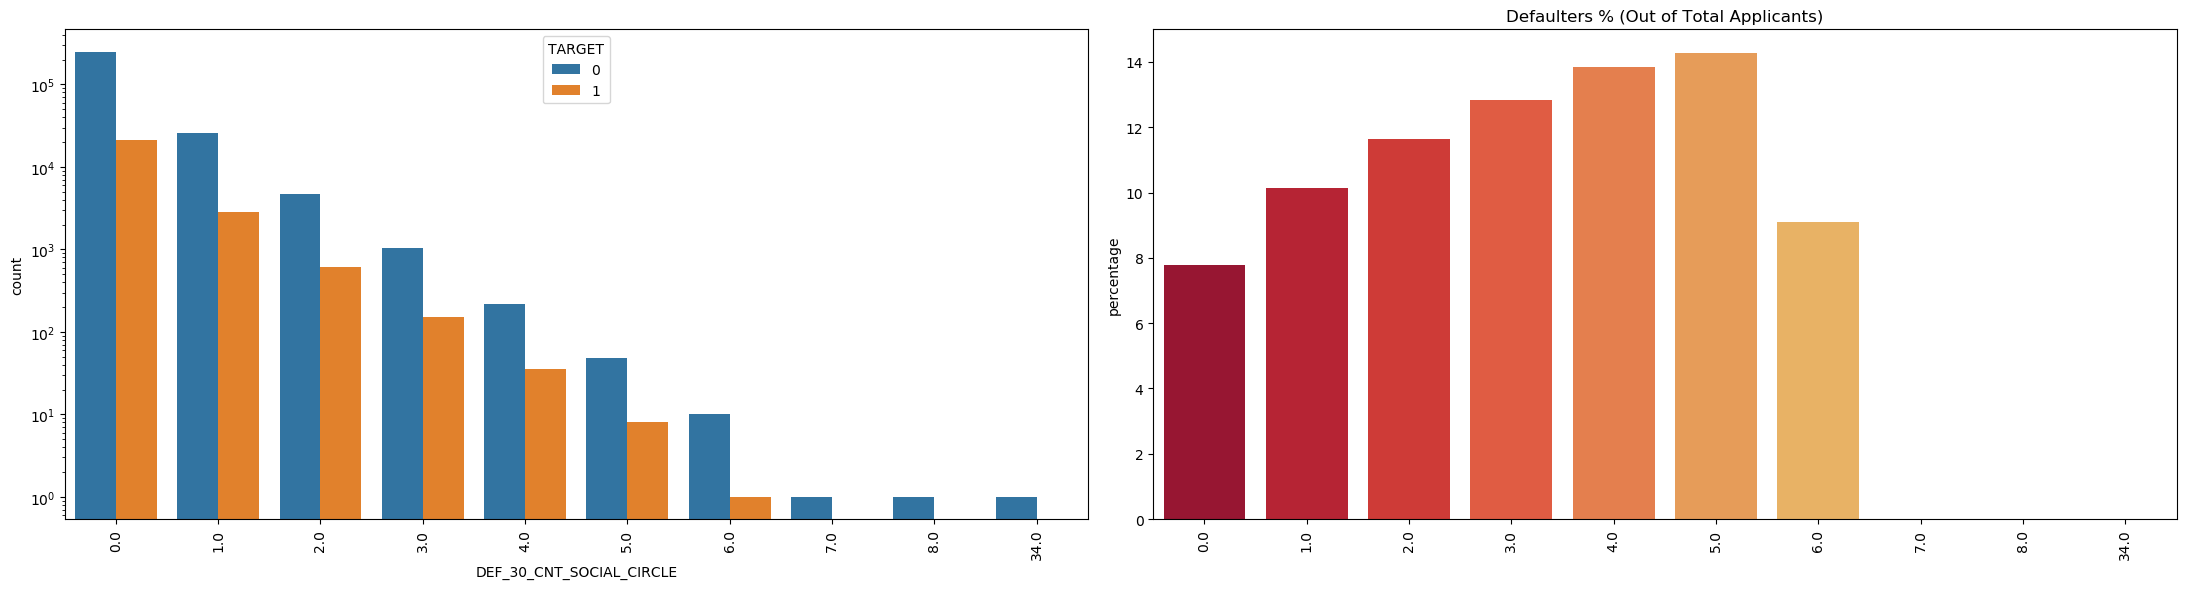

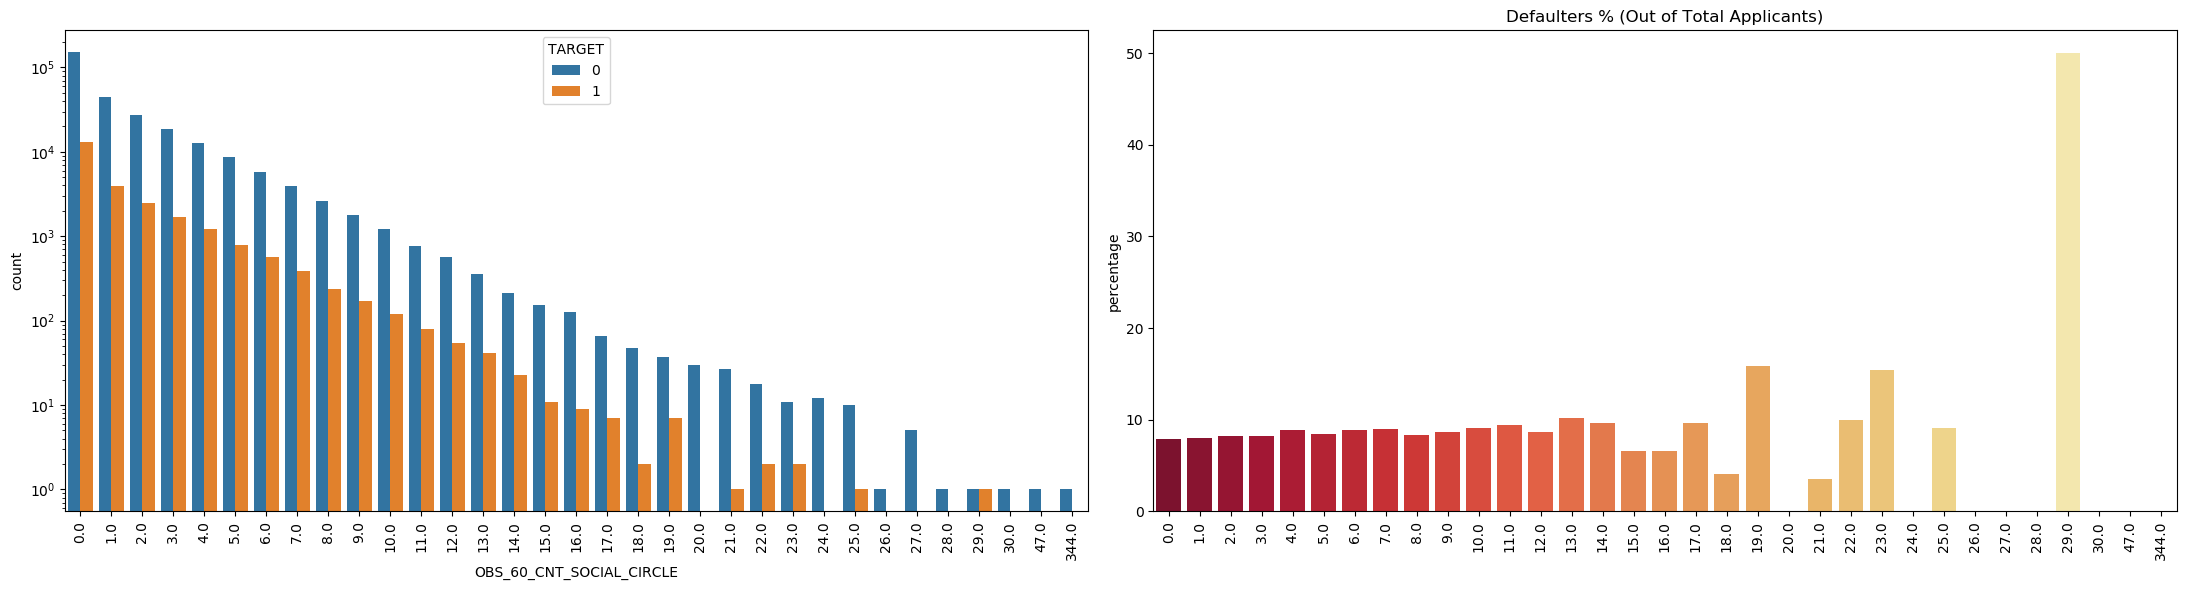

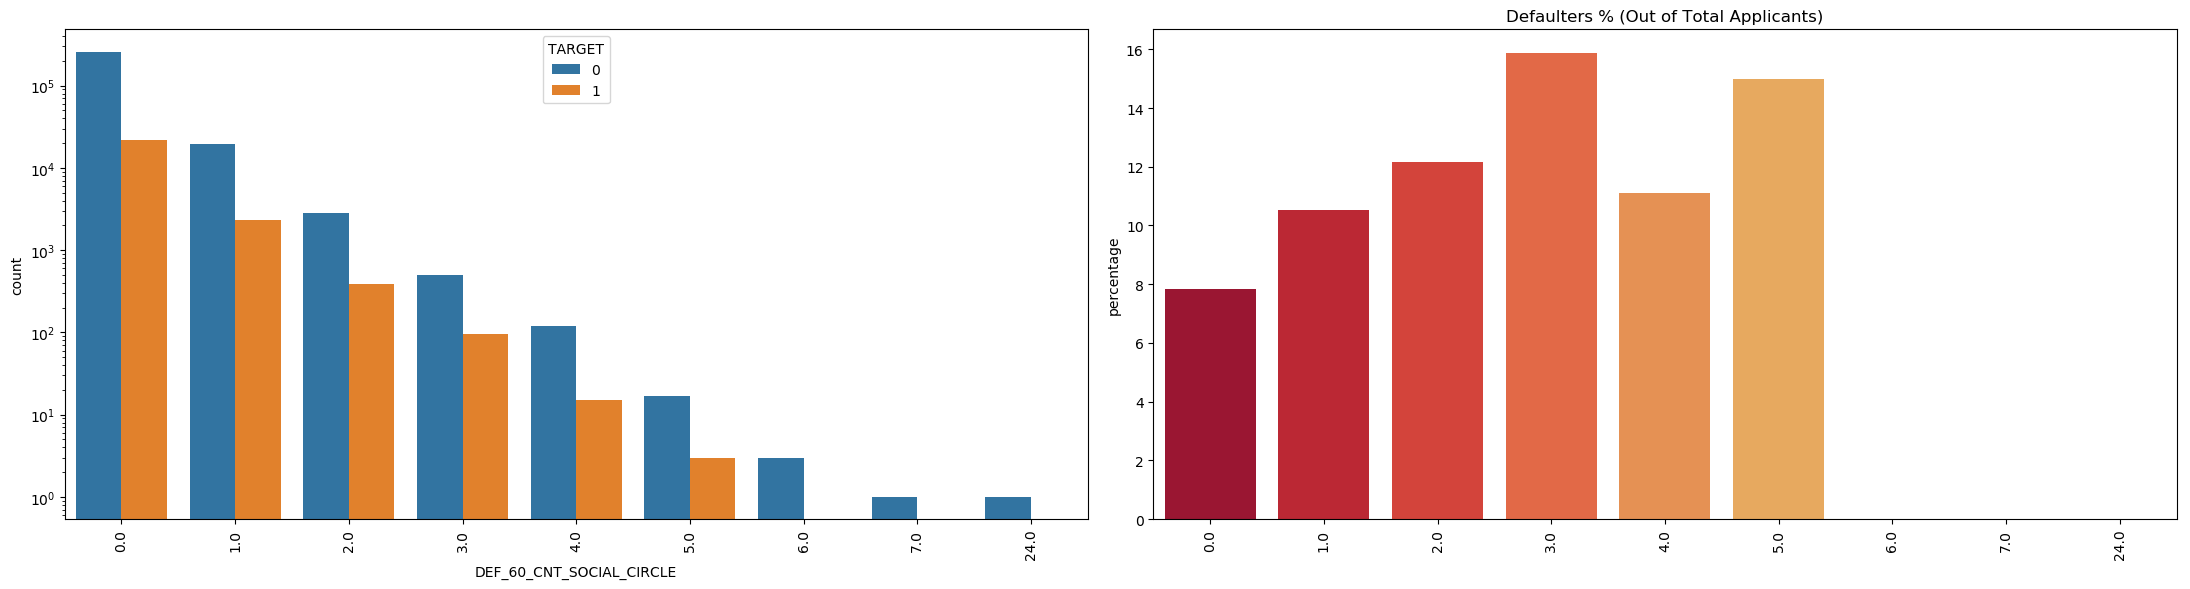

In [59]:
cols = ['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
for col in cols:
    plt.figure(figsize=(22,6), dpi=100)
    plt.subplot(1,2,1)
    sns.countplot(app_data[col], hue=app_data['TARGET'])
    plt.xticks(rotation=90)
    plt.yscale('log')
    
    plt.subplot(1,2,2)
    aa = pd.DataFrame(app_data[col].value_counts())
    aa['DEFAULTER'] = app_data[app_data['TARGET']==1][col].value_counts()
    aa['percentage'] = round(aa['DEFAULTER']/aa[col]*100,3)
    sns.barplot(y=aa['percentage'], x=aa.index, palette='YlOrRd_r')
    plt.title('Defaulters % (Out of Total Applicants)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

**Insights from the above charts:**

We can see that as the number of observation of client's social surroundings defaulted on 30 and 60 (days past due) DPD increases the probability of default also increases. That means surrounding is playing an important role.

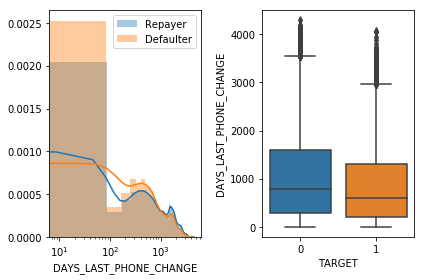

In [60]:
#analysing the days phone changed column
plt.subplot(1,2,1)
sns.distplot(abs(app_data[(app_data['TARGET']==0) & (app_data['DAYS_LAST_PHONE_CHANGE'].notnull())]['DAYS_LAST_PHONE_CHANGE']), label='Repayer')
sns.distplot(abs(app_data[(app_data['TARGET']==1) & (app_data['DAYS_LAST_PHONE_CHANGE'].notnull())]['DAYS_LAST_PHONE_CHANGE']), label='Defaulter')
plt.xscale('log')
plt.legend()
plt.subplot(1,2,2)
sns.boxplot(y=abs(app_data['DAYS_LAST_PHONE_CHANGE']), x=app_data['TARGET'])
plt.tight_layout()
plt.show()

Defaulters have changed their phone recently.

In [61]:
#creating one aggregate column for all the docs provided by the applicant
docs = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
        'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
        'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19',
        'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']
app_data['TOTAL_DOCS'] = app_data[docs].sum(axis=1)

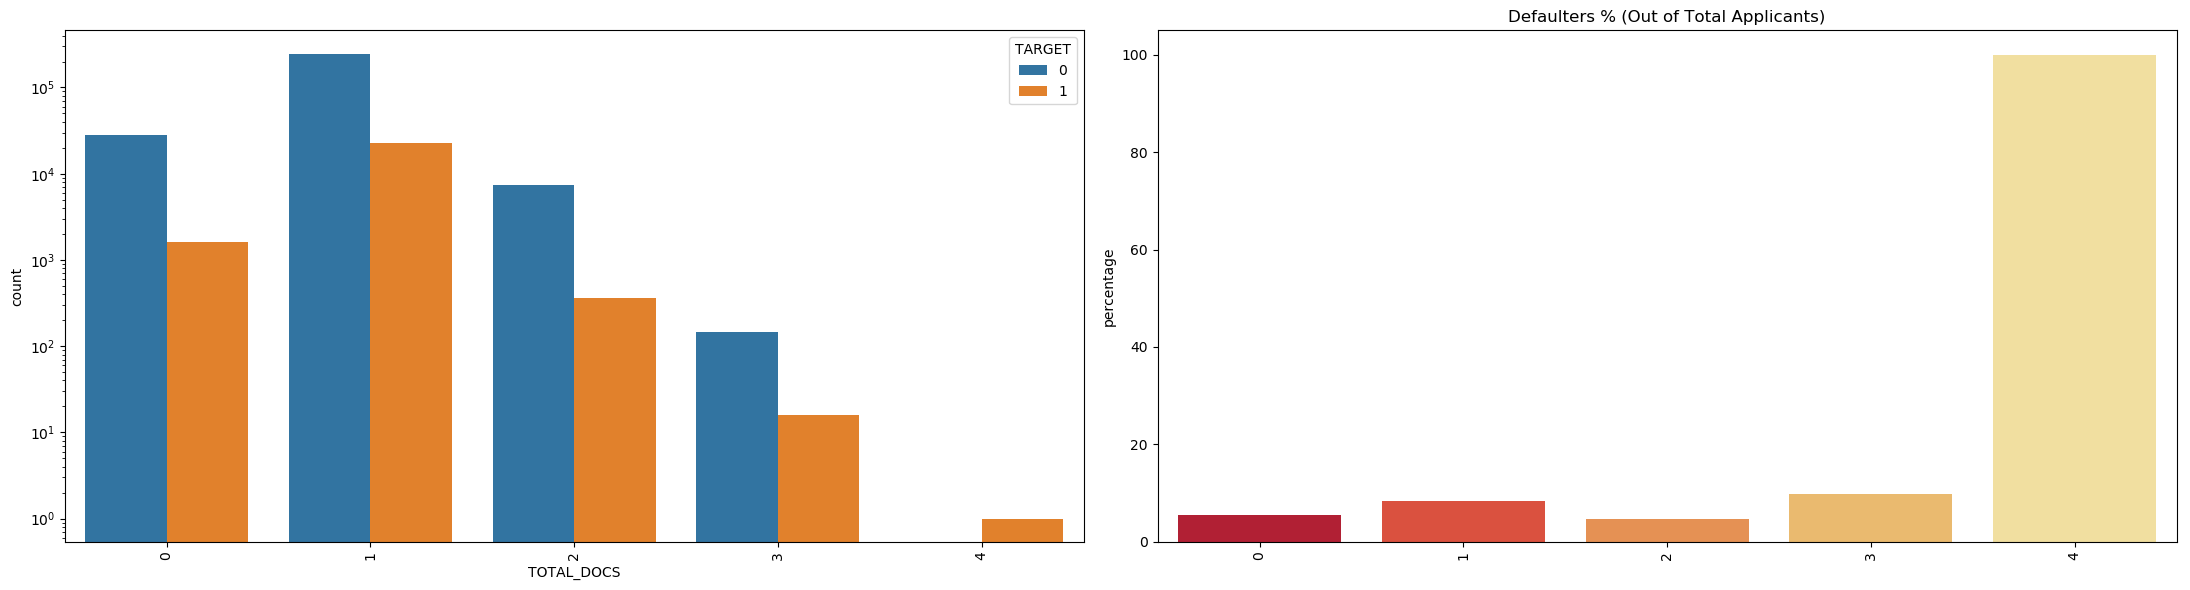

In [62]:
plt.figure(figsize=(22,6), dpi=100)
plt.subplot(1,2,1)
sns.countplot(app_data['TOTAL_DOCS'], hue=app_data['TARGET'])
plt.xticks(rotation=90)
plt.yscale('log')

plt.subplot(1,2,2)
aa = pd.DataFrame(app_data['TOTAL_DOCS'].value_counts())
aa['DEFAULTER'] = app_data[app_data['TARGET']==1]['TOTAL_DOCS'].value_counts()
aa['percentage'] = round(aa['DEFAULTER']/aa['TOTAL_DOCS']*100,3)
sns.barplot(y=aa['percentage'], x=aa.index, palette='YlOrRd_r')
plt.title('Defaulters % (Out of Total Applicants)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

There is no valuable insight from the number of docs provided by the client

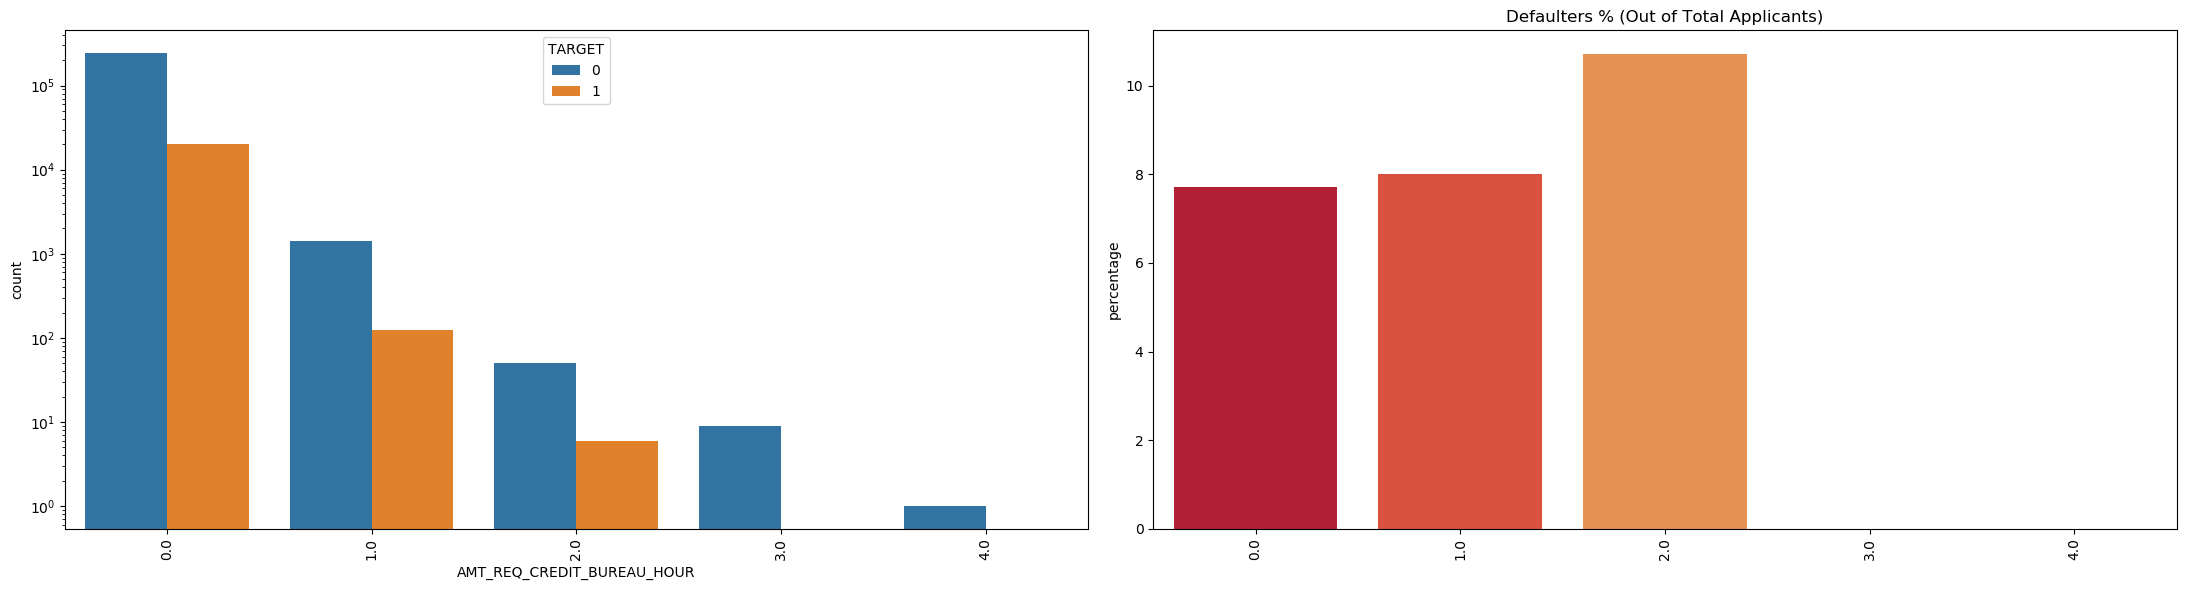

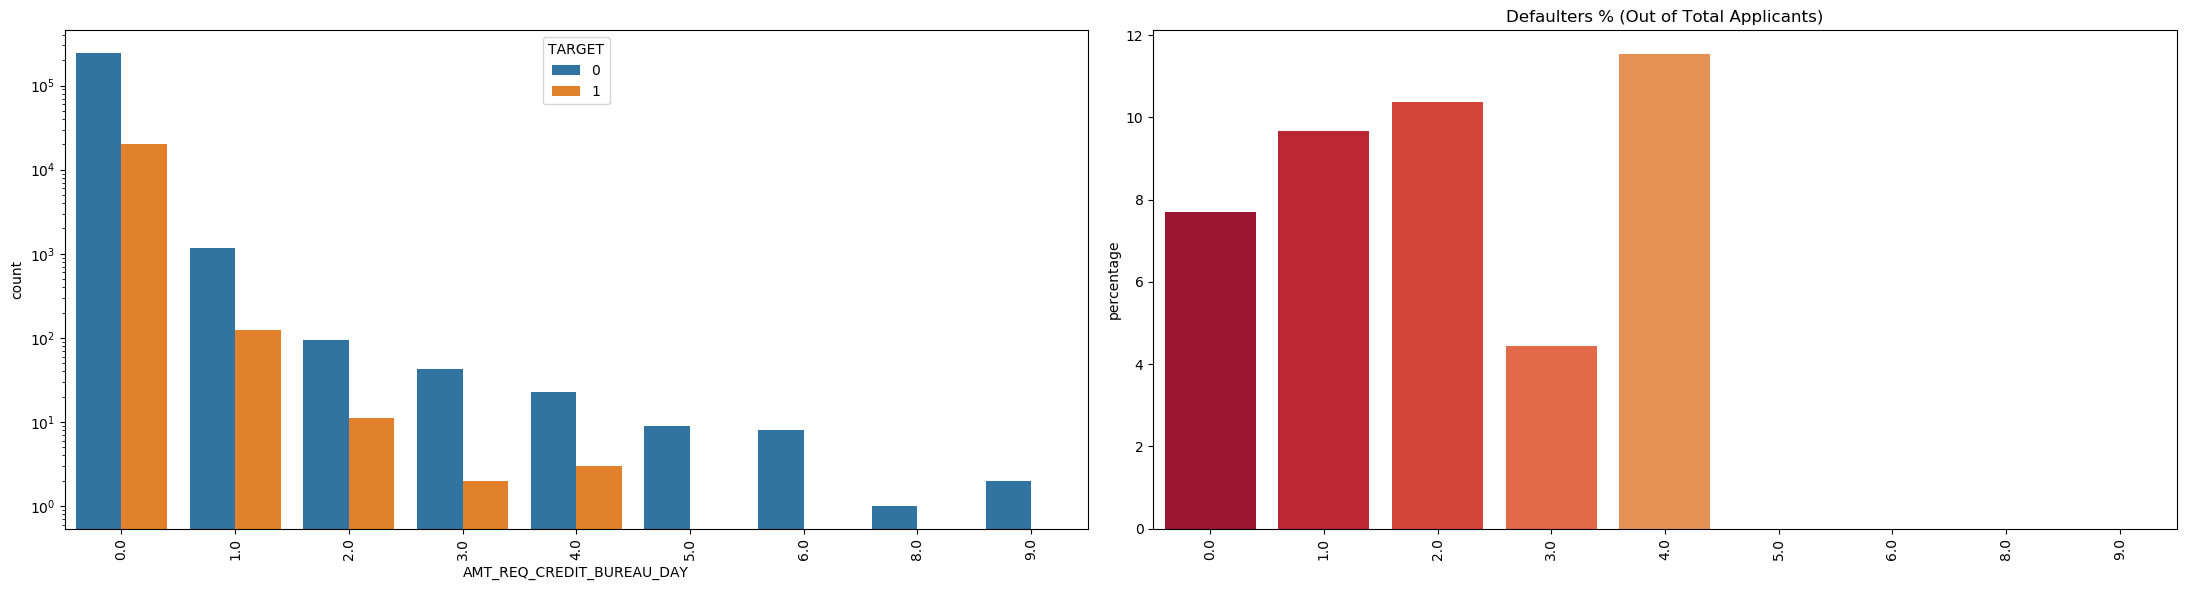

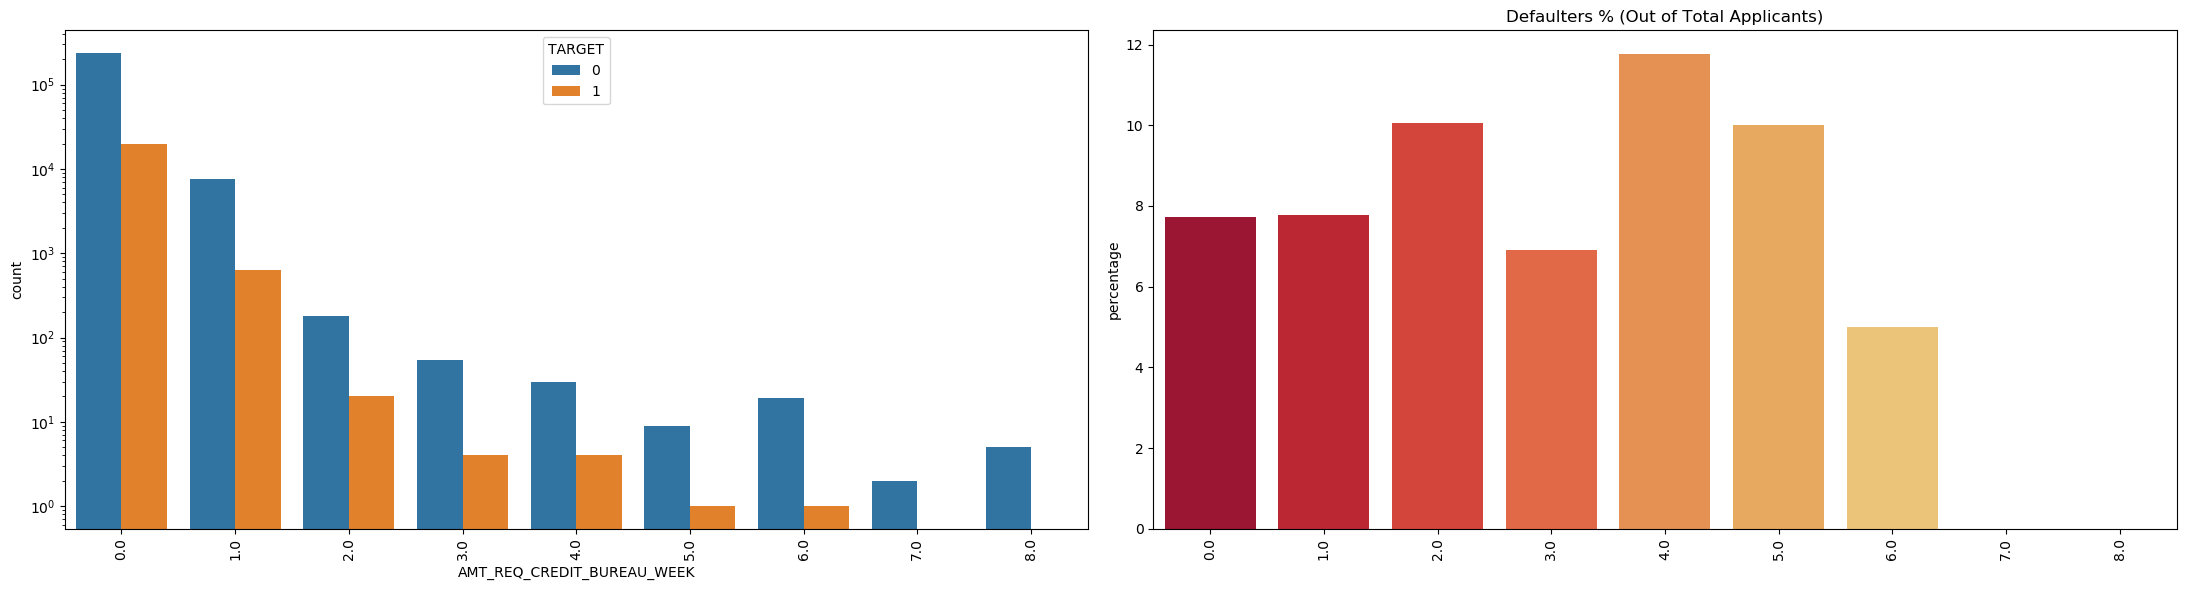

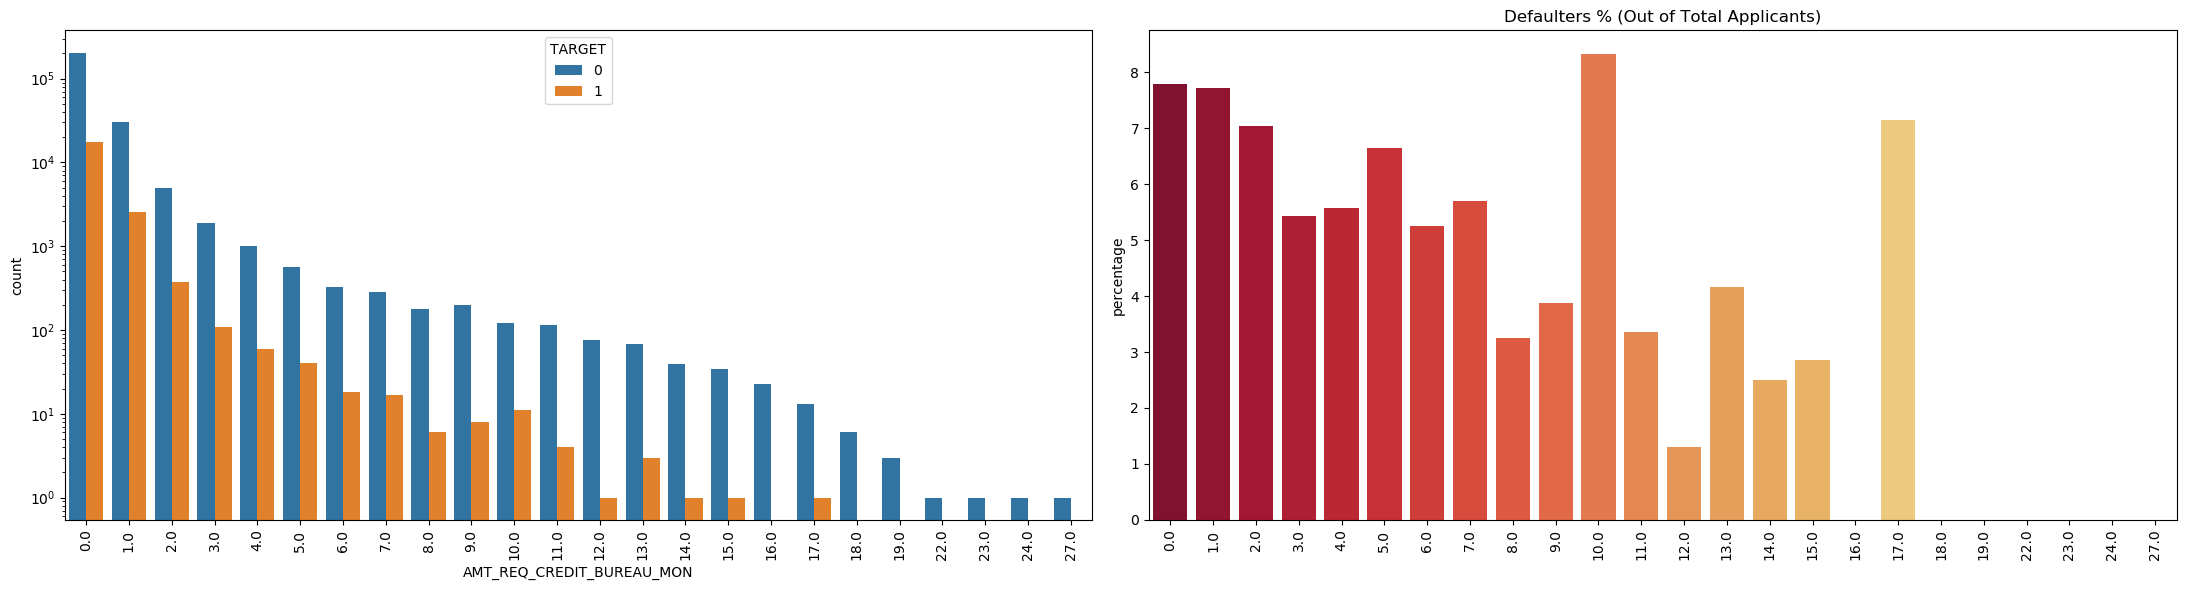

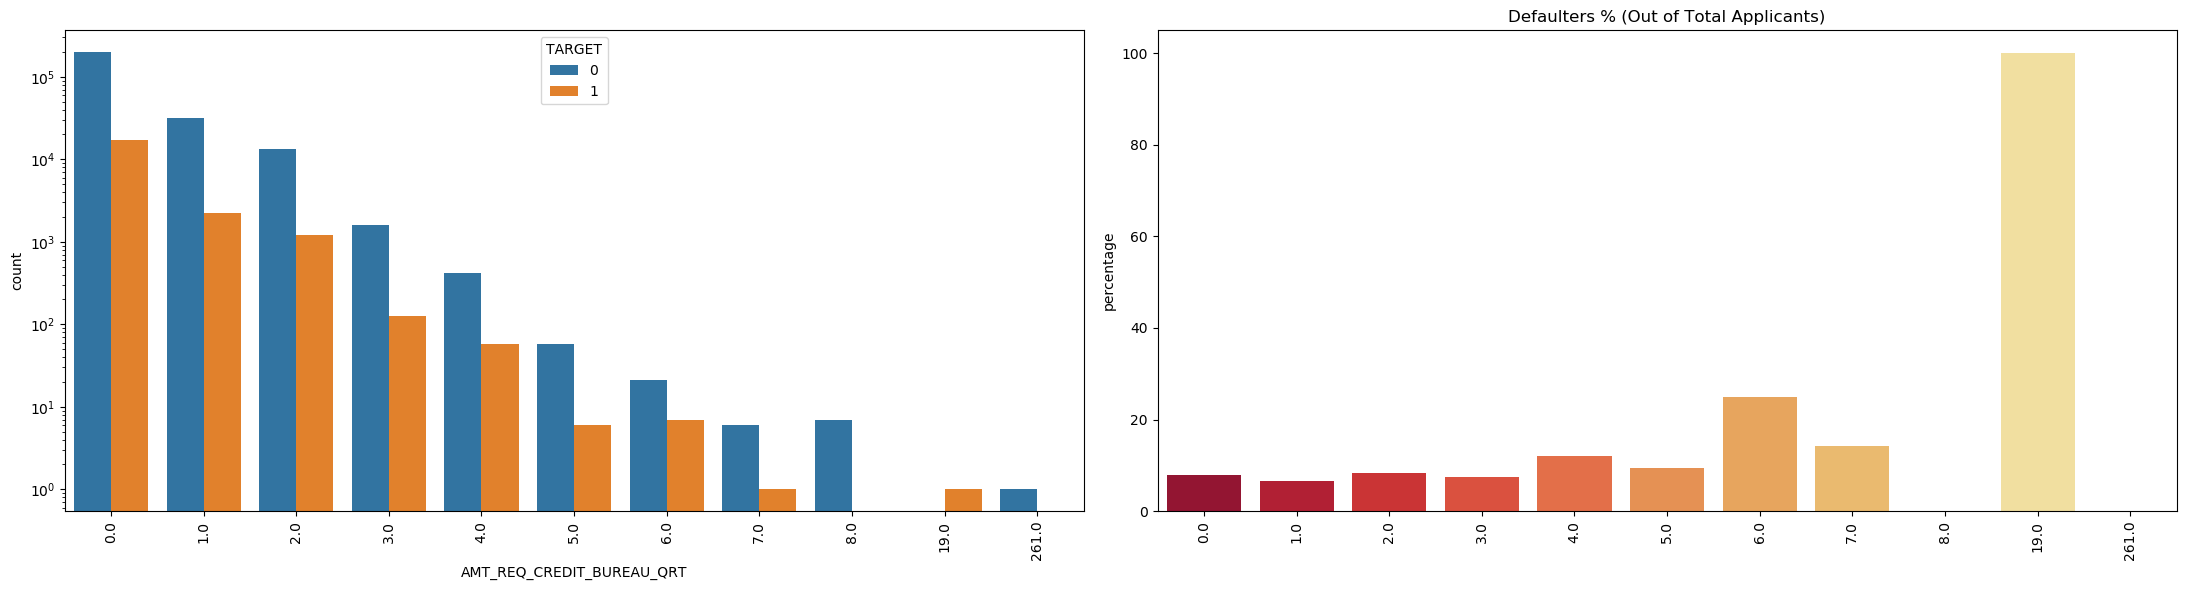

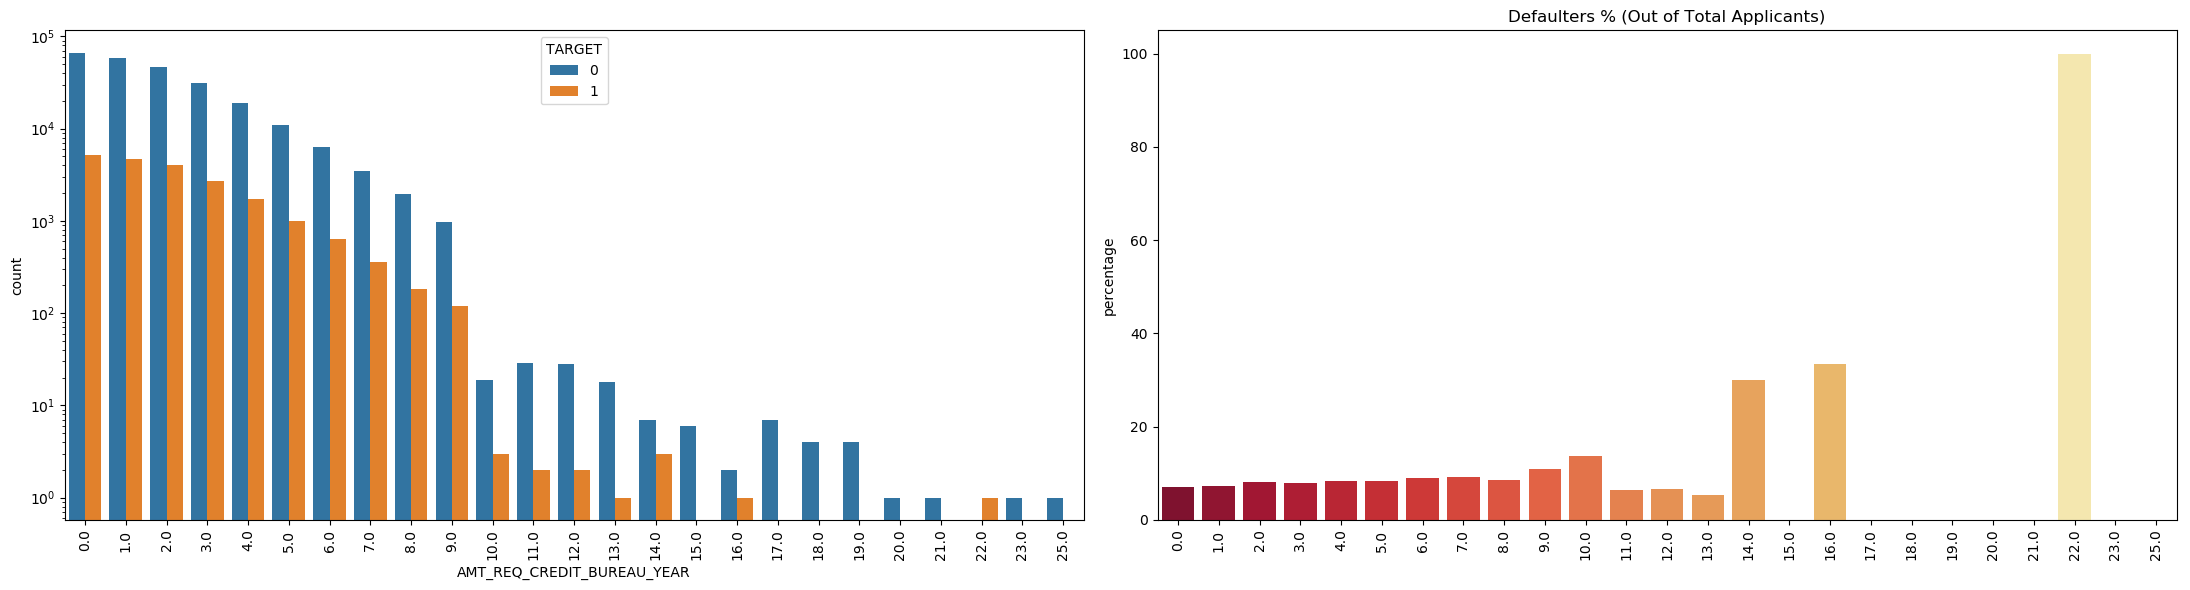

In [63]:
enquiry = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
           'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for col in enquiry:
    plt.figure(figsize=(22,6), dpi=100)
    plt.subplot(1,2,1)
    sns.countplot(app_data[col], hue=app_data['TARGET'])
    plt.xticks(rotation=90)
    plt.yscale('log')
    
    plt.subplot(1,2,2)
    aa = pd.DataFrame(app_data[col].value_counts())
    aa['DEFAULTER'] = app_data[app_data['TARGET']==1][col].value_counts()
    aa['percentage'] = round(aa['DEFAULTER']/aa[col]*100,3)
    sns.barplot(y=aa['percentage'], x=aa.index, palette='YlOrRd_r')
    plt.title('Defaulters % (Out of Total Applicants)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

AMT_REQ_CREDIT_BUREAU_HOUR and DAY has a clear impact on default. more entries more defaulters.

#### Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable). 
Note that you have to find the top correlation by segmenting the data frame w.r.t to the target variable and then find the top correlation for each of the segmented data and find if any insight is there.  Say, there are 5+1(target) variables in a dataset: Var1, Var2, Var3, Var4, Var5, Target. And if you have to find top 3 correlation, it can be: Var1 & Var2, Var2 & Var3, Var1 & Var3. Target variable will not feature in this correlation as it is a categorical variable and not a continuous variable which is increasing or decreasing.

In [105]:
#Getting the numerical cols with unique features to get the correlation between them
colss = ['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION',
        'DAYS_ID_PUBLISH','OWN_CAR_AGE','CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START','EXT_SOURCE_1','EXT_SOURCE_2',
        'EXT_SOURCE_3','REGION_POPULATION_RELATIVE','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG',
        'YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG',
        'LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','TOTALAREA_MODE',
        'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
        'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
        'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
df = app_data[colss]

In [106]:
#getting top 10 correlations for all other cases
df = app_data[app_data['TARGET']==0][colss]
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations for all other cases")
print(get_top_abs_correlations(df, 10)) # = 10 for top 10

Top Absolute Correlations for all other cases
OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE    0.998508
AMT_CREDIT                AMT_GOODS_PRICE             0.987021
APARTMENTS_AVG            LIVINGAPARTMENTS_AVG        0.944027
LIVINGAREA_AVG            TOTALAREA_MODE              0.924472
APARTMENTS_AVG            LIVINGAREA_AVG              0.914062
                          TOTALAREA_MODE              0.893278
LIVINGAPARTMENTS_AVG      LIVINGAREA_AVG              0.882189
ELEVATORS_AVG             LIVINGAREA_AVG              0.867860
DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE    0.859332
LIVINGAPARTMENTS_AVG      TOTALAREA_MODE              0.848953
dtype: float64


In [107]:
#getting top 10 correlations for defaulters
df = app_data[app_data['TARGET']==1][colss]

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations for clients with payment dificulties")
print(get_top_abs_correlations(df, 10)) # = 10 for top 10

Top Absolute Correlations for clients with payment dificulties
OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE    0.998269
AMT_CREDIT                AMT_GOODS_PRICE             0.982784
APARTMENTS_AVG            LIVINGAPARTMENTS_AVG        0.942255
LIVINGAREA_AVG            TOTALAREA_MODE              0.932864
APARTMENTS_AVG            LIVINGAREA_AVG              0.905619
                          TOTALAREA_MODE              0.880811
DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE    0.868994
ELEVATORS_AVG             LIVINGAREA_AVG              0.864279
LIVINGAPARTMENTS_AVG      LIVINGAREA_AVG              0.858058
ELEVATORS_AVG             TOTALAREA_MODE              0.836810
dtype: float64


# EDA on previous application dataset

In [66]:
#creating a mini dataframe to join with previous application dataset
# we will merge the dataset on SK_ID_CURR dataset and add target variable to previous dataset
#this will help us getting insights of previuos data
id_target = app_data[['SK_ID_CURR','TARGET']]

#### Merging Target column on Previous Data File

In [67]:
merged_data = pd.merge(prev_app, id_target, how='left',on='SK_ID_CURR')
merged_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... CNT_PAYMENT  NAME_YIELD_GROUP  \
0                       15  ...        12.0            middle   
1                       11  ...        36.0        low_action   
2                       11  ...        12.0              high   
3                        7  ...        12.0            middle   
4                        9  ...        24.0              high   

        PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0  POS mobile with interest            365243.0           -42.0   
1          Cash X-Sell: low            365243.0          -134.0   
2         Cash X-Sell: high            365243.0          -271.0   
3       Cash X-Sell: middle            365243.0          -482.0   
4         Cash Street: high                 NaN             NaN   

  DAYS_LAST_DUE_1ST_VERSION DAYS_LAST_DUE  DAYS_TERMINATION  \
0                     300.0         -42.0             -37.0   
1                     916.0      365243.0          365243.0   
2                      59.0      365243.0          365243.0   
3                    -152.0        -182.0            -177.0   
4                       NaN           NaN               NaN   

  NFLAG_INSURED_ON_APPROVAL TARGET  
0                       0.0    0.0  
1                       1.0    0.0  
2                       1.0    0.0  
3                       1.0    0.0  
4                       NaN    0.0  

[5 rows x 38 columns]

In [68]:
merged_data['TARGET'].dtype

dtype('float64')

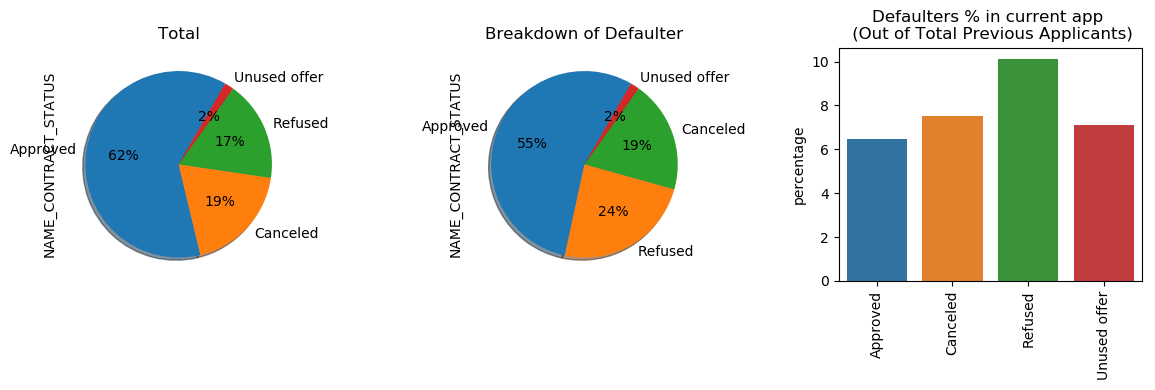

In [69]:
plt.figure(figsize=(12,4), dpi=100)
plt.subplot(1,3,1)
merged_data['NAME_CONTRACT_STATUS'].value_counts().plot.pie(autopct='%1.0f%%', startangle=60, shadow = True)
plt.title('Total')
plt.subplot(1,3,2)
merged_data[merged_data['TARGET'] == 1.0]['NAME_CONTRACT_STATUS'].value_counts().plot.pie(autopct='%1.0f%%', startangle=60, shadow = True)
plt.title('Breakdown of Defaulter')

plt.subplot(1,3,3)
aa = pd.DataFrame(merged_data['NAME_CONTRACT_STATUS'].value_counts())
aa['DEFAULTER'] = merged_data[merged_data['TARGET']==1]['NAME_CONTRACT_STATUS'].value_counts()
aa['percentage'] = round(aa['DEFAULTER']/aa['NAME_CONTRACT_STATUS']*100,3)
sns.barplot(y=aa['percentage'], x=aa.index)
plt.xticks(rotation=90)
plt.title('Defaulters % in current app \n (Out of Total Previous Applicants)')

plt.tight_layout()
plt.show()

#### The clients whose application was rejected in previous applications , had payement difficulty in current applications

## Data cleaning and treatment of missing values

In [70]:
#checking the missing data in merged dataset
missing_data(merged_data)

% of missing value  Count of Missing Values
RATE_INTEREST_PRIVILEGED                  99.64                  1664263
RATE_INTEREST_PRIMARY                     99.64                  1664263
AMT_DOWN_PAYMENT                          53.64                   895844
RATE_DOWN_PAYMENT                         53.64                   895844
NAME_TYPE_SUITE                           49.12                   820405
DAYS_TERMINATION                          40.30                   673065
DAYS_LAST_DUE                             40.30                   673065
DAYS_LAST_DUE_1ST_VERSION                 40.30                   673065
DAYS_FIRST_DUE                            40.30                   673065
DAYS_FIRST_DRAWING                        40.30                   673065
NFLAG_INSURED_ON_APPROVAL                 40.30                   673065
AMT_GOODS_PRICE                           23.08                   385515
AMT_ANNUITY                               22.29                   372235
CNT_PAYMENT                               22.29                   372230
TARGET                                    15.36                   256531
PRODUCT_COMBINATION                        0.02                      346
AMT_CREDIT                                 0.00                        1
WEEKDAY_APPR_PROCESS_START                 0.00                        0
NAME_CONTRACT_TYPE                         0.00                        0
HOUR_APPR_PROCESS_START                    0.00                        0
SK_ID_CURR                                 0.00                        0
FLAG_LAST_APPL_PER_CONTRACT                0.00                        0
NFLAG_LAST_APPL_IN_DAY                     0.00                        0
AMT_APPLICATION                            0.00                        0
NAME_PAYMENT_TYPE                          0.00                        0
NAME_CASH_LOAN_PURPOSE                     0.00                        0
NAME_CONTRACT_STATUS                       0.00                        0
DAYS_DECISION                              0.00                        0
CODE_REJECT_REASON                         0.00                        0
NAME_CLIENT_TYPE                           0.00                        0
NAME_GOODS_CATEGORY                        0.00                        0
NAME_PORTFOLIO                             0.00                        0
NAME_PRODUCT_TYPE                          0.00                        0
CHANNEL_TYPE                               0.00                        0
SELLERPLACE_AREA                           0.00                        0
NAME_SELLER_INDUSTRY                       0.00                        0
NAME_YIELD_GROUP                           0.00                        0
SK_ID_PREV                                 0.00                        0

In [71]:
#deleting the 'RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY' cols as they contain more than 90 percent missing values
merged_data.drop(['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY'], axis=1, inplace=True)

In [72]:
#checking shape after dropping the cols with high missing values
merged_data.shape

(1670214, 36)

In [73]:
merged_data['AMT_DOWN_PAYMENT'].value_counts().head()

0.0        369854
4500.0      21241
9000.0      14747
13500.0      9655
22500.0      8165
Name: AMT_DOWN_PAYMENT, dtype: int64

As AMT_DOWN_PAYMENT has significant amount of values equal to zero, so we will not consider them in our analysis

In [74]:
merged_data['AMT_DOWN_PAYMENT'].describe()

count    7.743700e+05
mean     6.697402e+03
std      2.092150e+04
min     -9.000000e-01
25%      0.000000e+00
50%      1.638000e+03
75%      7.740000e+03
max      3.060045e+06
Name: AMT_DOWN_PAYMENT, dtype: float64

this col contains outliers also , so checking the quantiles

In [75]:

for x in range(0,101,2):
    print(x,'th quantile=',merged_data[merged_data['AMT_DOWN_PAYMENT'] > 0]['AMT_DOWN_PAYMENT'].quantile(x/100))

0 th quantile= 0.045
2 th quantile= 4.095
4 th quantile= 1593.0
6 th quantile= 1876.5
8 th quantile= 2173.5
10 th quantile= 2250.0
12 th quantile= 2475.0
14 th quantile= 2700.0
16 th quantile= 2925.0
18 th quantile= 3150.0
20 th quantile= 3375.0
22 th quantile= 3600.0
24 th quantile= 3865.5
26 th quantile= 4144.5
28 th quantile= 4495.5
30 th quantile= 4500.0
32 th quantile= 4500.0
34 th quantile= 4612.5
36 th quantile= 4950.0
38 th quantile= 5274.0
40 th quantile= 5589.0
42 th quantile= 5926.5
44 th quantile= 6300.0
46 th quantile= 6750.0
48 th quantile= 6768.0
50 th quantile= 7200.0
52 th quantile= 7695.0
54 th quantile= 8230.5
56 th quantile= 8820.0
58 th quantile= 9000.0
60 th quantile= 9000.0
62 th quantile= 9513.0
64 th quantile= 10197.0
66 th quantile= 10899.0
68 th quantile= 11452.5
70 th quantile= 12235.5
72 th quantile= 13140.0
74 th quantile= 13500.0
76 th quantile= 13950.0
78 th quantile= 15120.0
80 th quantile= 16380.0
82 th quantile= 18000.0
84 th quantile= 19305.0
86 th q

#### Treatment of outliers and ignoring irrelavant information from analysis

In [76]:
#considering the values till 98th quantiles only and assigning merged df to a new variable filtered_data
filtered_data = merged_data[(merged_data['AMT_DOWN_PAYMENT'] > 0) & (merged_data['AMT_DOWN_PAYMENT'] < 65000)]

In [77]:
filtered_data.shape

(396640, 36)

# EDA
## (Mix of Univariate, Bivariate and Segmented Bivariate Analysis)

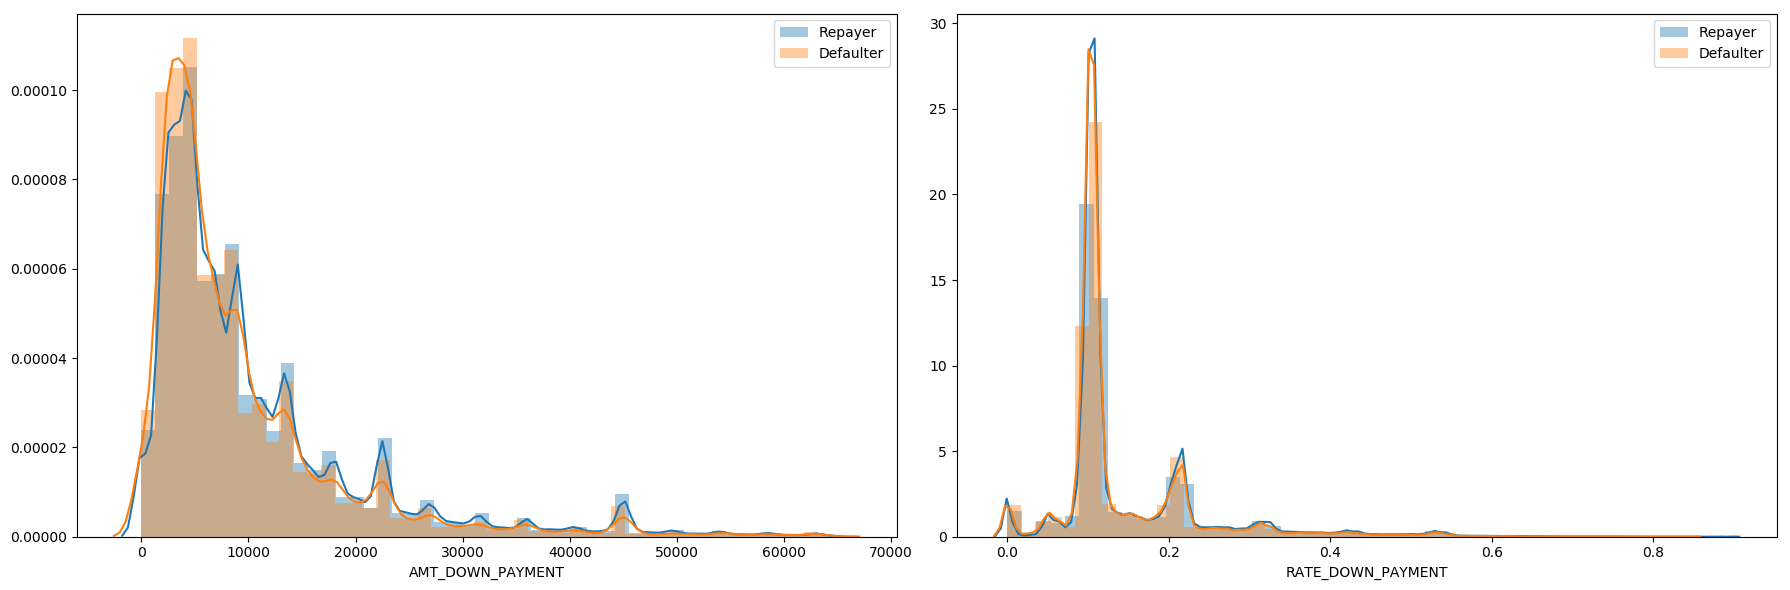

In [78]:
#checking the distribution of AMT_DOWN_PAYMENT and RATE_DOWN_PAYMENT
plt.figure(figsize=(18,6), dpi = 100)
plt.subplot(1,2,1)
sns.distplot(filtered_data[filtered_data['TARGET'] == 0]['AMT_DOWN_PAYMENT'], label='Repayer')
sns.distplot(filtered_data[filtered_data['TARGET'] == 1]['AMT_DOWN_PAYMENT'], label='Defaulter')
plt.legend()

plt.subplot(1,2,2)
sns.distplot(filtered_data[filtered_data['TARGET'] == 0]['RATE_DOWN_PAYMENT'], label='Repayer')
sns.distplot(filtered_data[filtered_data['TARGET'] == 1]['RATE_DOWN_PAYMENT'], label='Defaulter')
plt.legend()
plt.tight_layout()
plt.show()

As we can infer from the above graph , clients who has payment difficulty in current application are having less down payment in previous applications than repayers

In [79]:
cols = ['DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']
merged_data[cols].sample(10)

DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
879842                  NaN             NaN                        NaN   
1294933            365243.0          -720.0                     -570.0   
526324             365243.0         -2649.0                    -2499.0   
1371848            365243.0         -2472.0                    -2202.0   
1259384                 NaN             NaN                        NaN   
24647                   NaN             NaN                        NaN   
584399             365243.0          -527.0                     -197.0   
214945                  NaN             NaN                        NaN   
1563608            365243.0         -2713.0                    -2593.0   
527069             365243.0          -678.0                       12.0   

         DAYS_LAST_DUE  DAYS_TERMINATION  
879842             NaN               NaN  
1294933         -690.0            -685.0  
526324         -2499.0           -2496.0  
1371848        -2262.0           -2250.0  
1259384            NaN               NaN  
24647              NaN               NaN  
584399          -197.0            -191.0  
214945             NaN               NaN  
1563608        -2593.0           -2587.0  
527069          -138.0            -136.0

As we can see , all the cols contains 365243 days which are practically not viable , so we will not include them in our data

In [80]:
#converting all days cols to years
cols = ['DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']
for col in cols:
    merged_data[col] = round(merged_data[col]/365.25,2)

In [81]:
merged_data[cols].head()

DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
0              999.98           -0.11                       0.82   
1              999.98           -0.37                       2.51   
2              999.98           -0.74                       0.16   
3              999.98           -1.32                      -0.42   
4                 NaN             NaN                        NaN   

   DAYS_LAST_DUE  DAYS_TERMINATION  
0          -0.11             -0.10  
1         999.98            999.98  
2         999.98            999.98  
3          -0.50             -0.48  
4            NaN               NaN

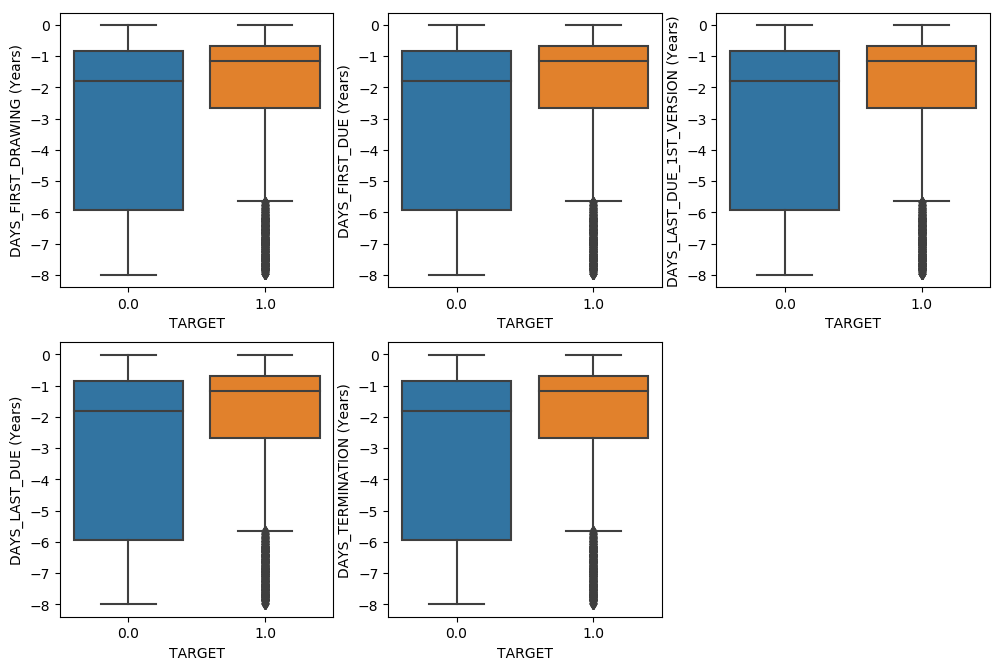

In [82]:
#vsualising all the days cols which are less than 999.98 years
cols = ['DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']
plt.figure(figsize=(12,8), dpi=100)
for i in range(len(cols)):
    plt.subplot(2,3,i+1)
    sns.boxplot(y=merged_data[merged_data['DAYS_FIRST_DRAWING'] < 999.98]['DAYS_FIRST_DRAWING'], x=merged_data['TARGET'])
    plt.ylabel(cols[i]+' (Years)')
plt.show()

#### As we can see from the above boxplots, clients who had payment difficulties in current application has the following in previous applications:
1.	Less days of first disbursement.
2.	Less days of first due supposed to be.
3.	Less days of first due of the previous application.
4.	Less days of last due date.
5.	Less days of expected termination.


In [83]:
#checking the unique values in all the below cols
a = ['NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT',
     'NFLAG_LAST_APPL_IN_DAY','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','DAYS_DECISION','NAME_PAYMENT_TYPE',
     'CODE_REJECT_REASON','NAME_TYPE_SUITE','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE',
     'CHANNEL_TYPE','SELLERPLACE_AREA','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION']
merged_data[a].nunique().sort_values()

FLAG_LAST_APPL_PER_CONTRACT       2
NFLAG_LAST_APPL_IN_DAY            2
NAME_PRODUCT_TYPE                 3
NAME_CONTRACT_TYPE                4
NAME_CONTRACT_STATUS              4
NAME_PAYMENT_TYPE                 4
NAME_CLIENT_TYPE                  4
NAME_PORTFOLIO                    5
NAME_YIELD_GROUP                  5
WEEKDAY_APPR_PROCESS_START        7
NAME_TYPE_SUITE                   7
CHANNEL_TYPE                      8
CODE_REJECT_REASON                9
NAME_SELLER_INDUSTRY             11
PRODUCT_COMBINATION              17
HOUR_APPR_PROCESS_START          24
NAME_CASH_LOAN_PURPOSE           25
NAME_GOODS_CATEGORY              28
SELLERPLACE_AREA               2097
DAYS_DECISION                  2922
dtype: int64

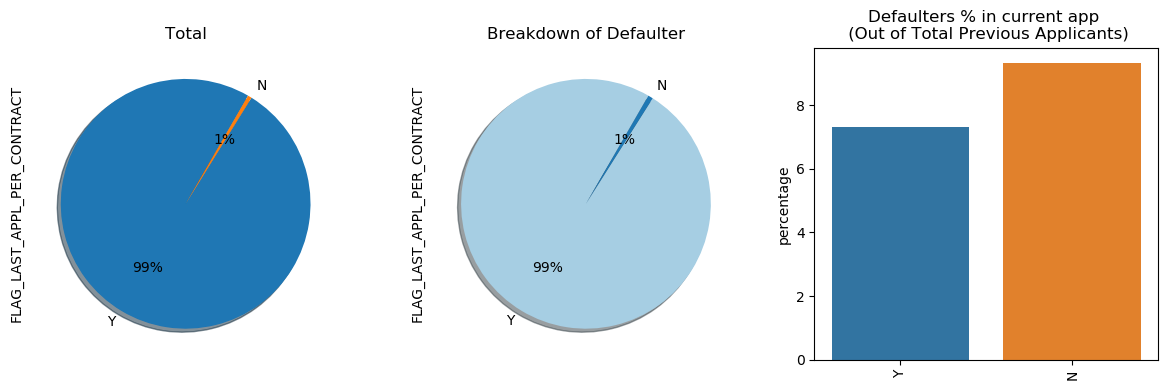

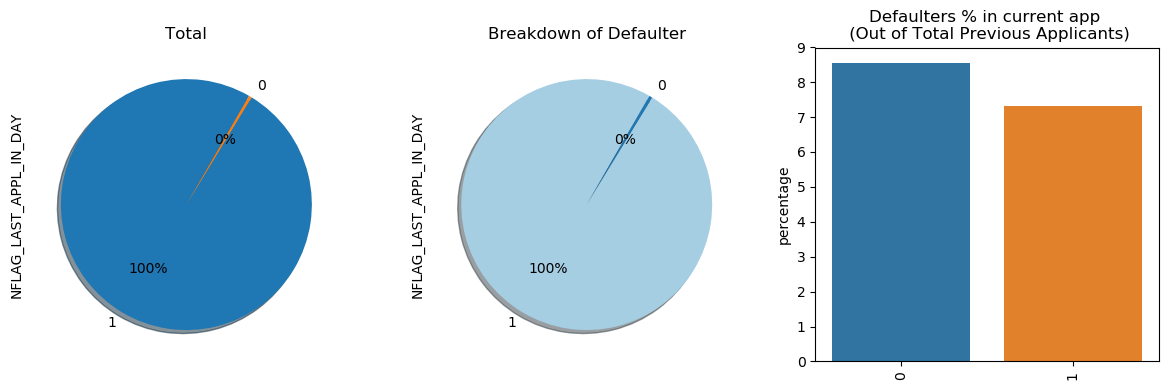

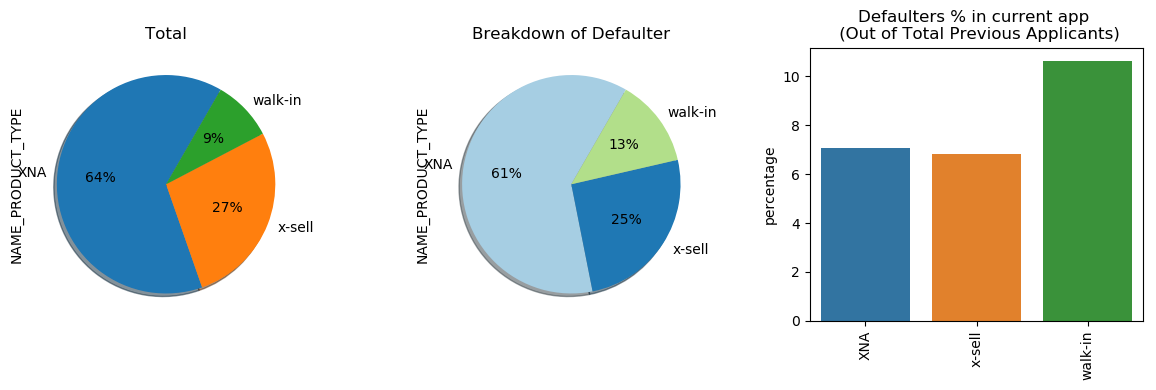

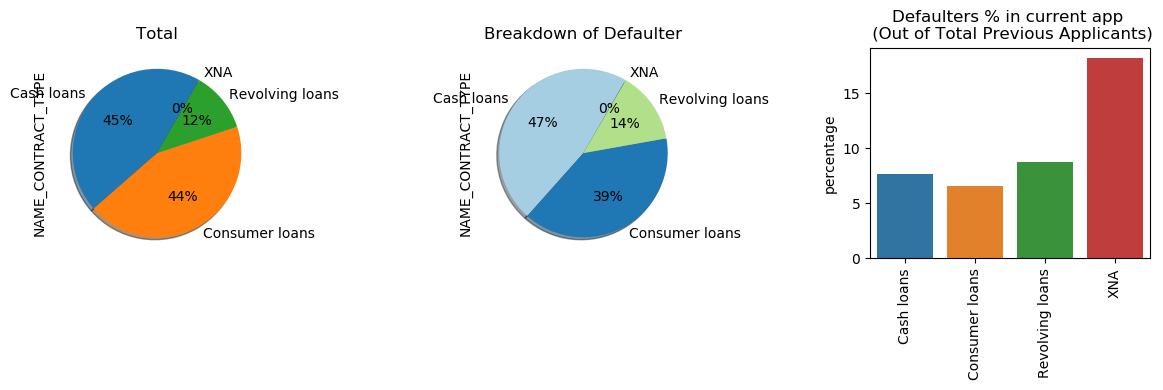

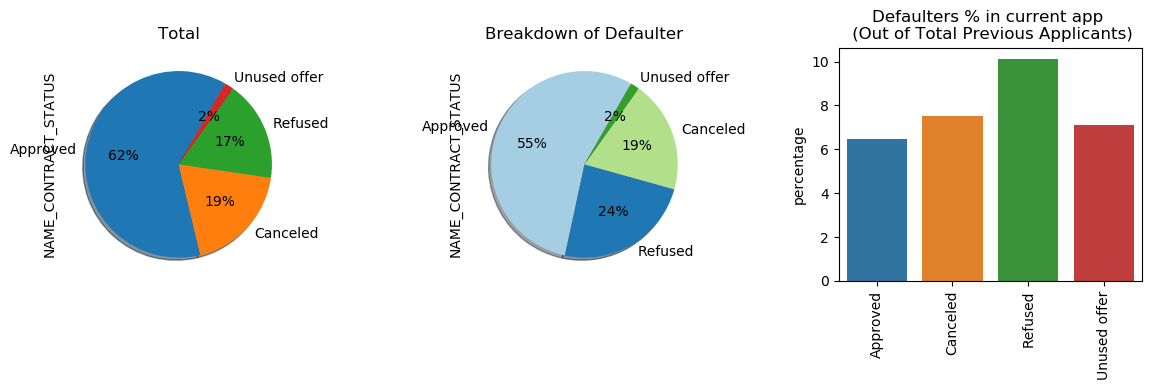

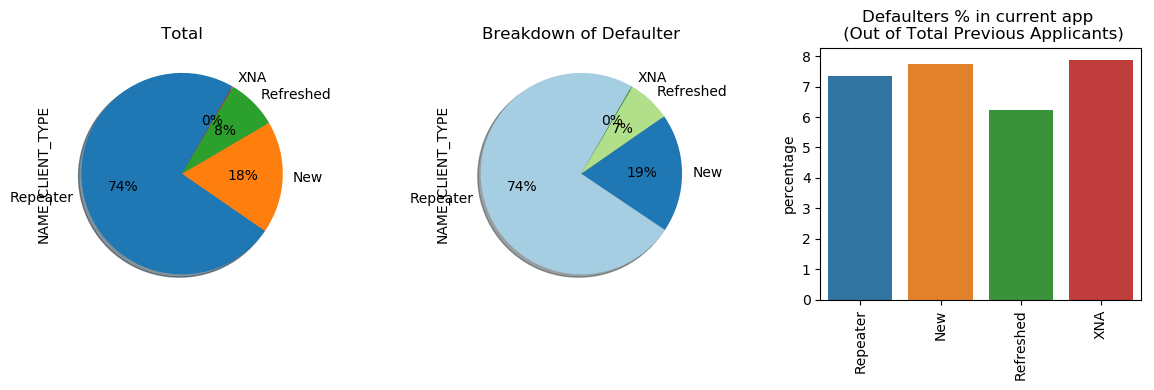

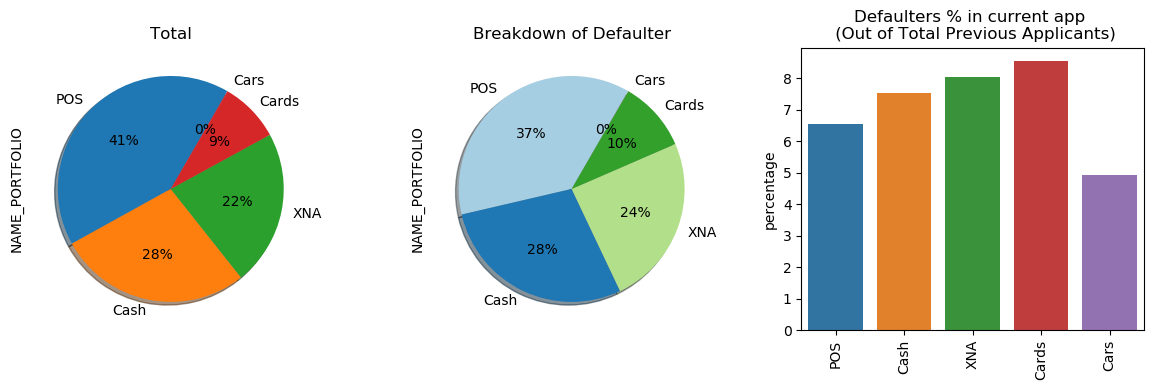

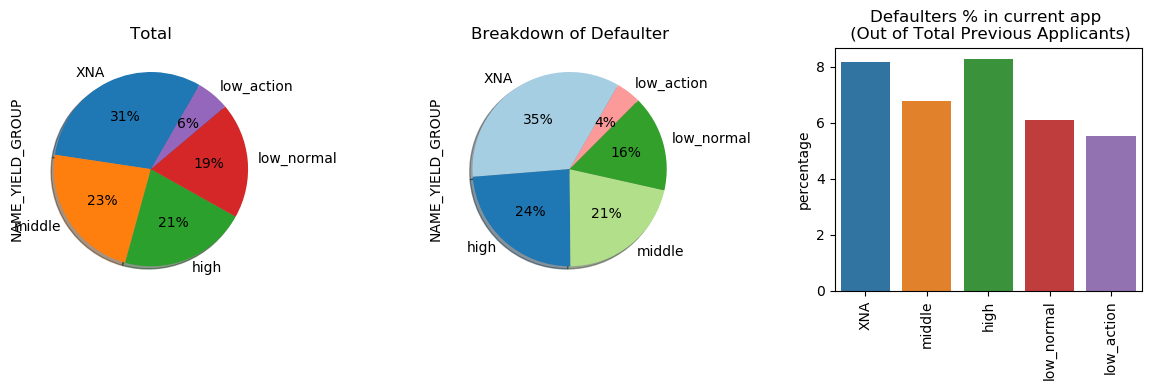

In [84]:
a = ['FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','NAME_PRODUCT_TYPE','NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS',
     'NAME_CLIENT_TYPE','NAME_PORTFOLIO','NAME_YIELD_GROUP']

for col in a:
    plt.figure(figsize=(12,4), dpi=100)
    plt.subplot(1,3,1)
    merged_data[col].value_counts().plot.pie(autopct='%1.0f%%', startangle=60, shadow = True)
    plt.title('Total')
    plt.subplot(1,3,2)
    merged_data[merged_data['TARGET'] == 1.0][col].value_counts().plot.pie(autopct='%1.0f%%', startangle=60, shadow = True,
                                                                  colors = sns.color_palette('Paired'))
    plt.title('Breakdown of Defaulter')
    
    plt.subplot(1,3,3)
    aa = pd.DataFrame(merged_data[col].value_counts())
    aa['DEFAULTER'] = merged_data[merged_data['TARGET']==1][col].value_counts()
    aa['percentage'] = round(aa['DEFAULTER']/aa[col]*100,3)
    sns.barplot(y=aa['percentage'], x=aa.index)
    plt.xticks(rotation=90)
    plt.title('Defaulters % in current app \n (Out of Total Previous Applicants)')

    plt.tight_layout()
    plt.show()

**Insights from the above charts**
1. Applicants who previouly had walk-in type has payment difficulties in current application.
2. Clients who were new during previous application has payment difficulty in current application.
3. Clients whose previous application is for cards, have defaulted the most in current application.
4. Applicants who had high intrest rates during previous applications had payment difficulty in current application.

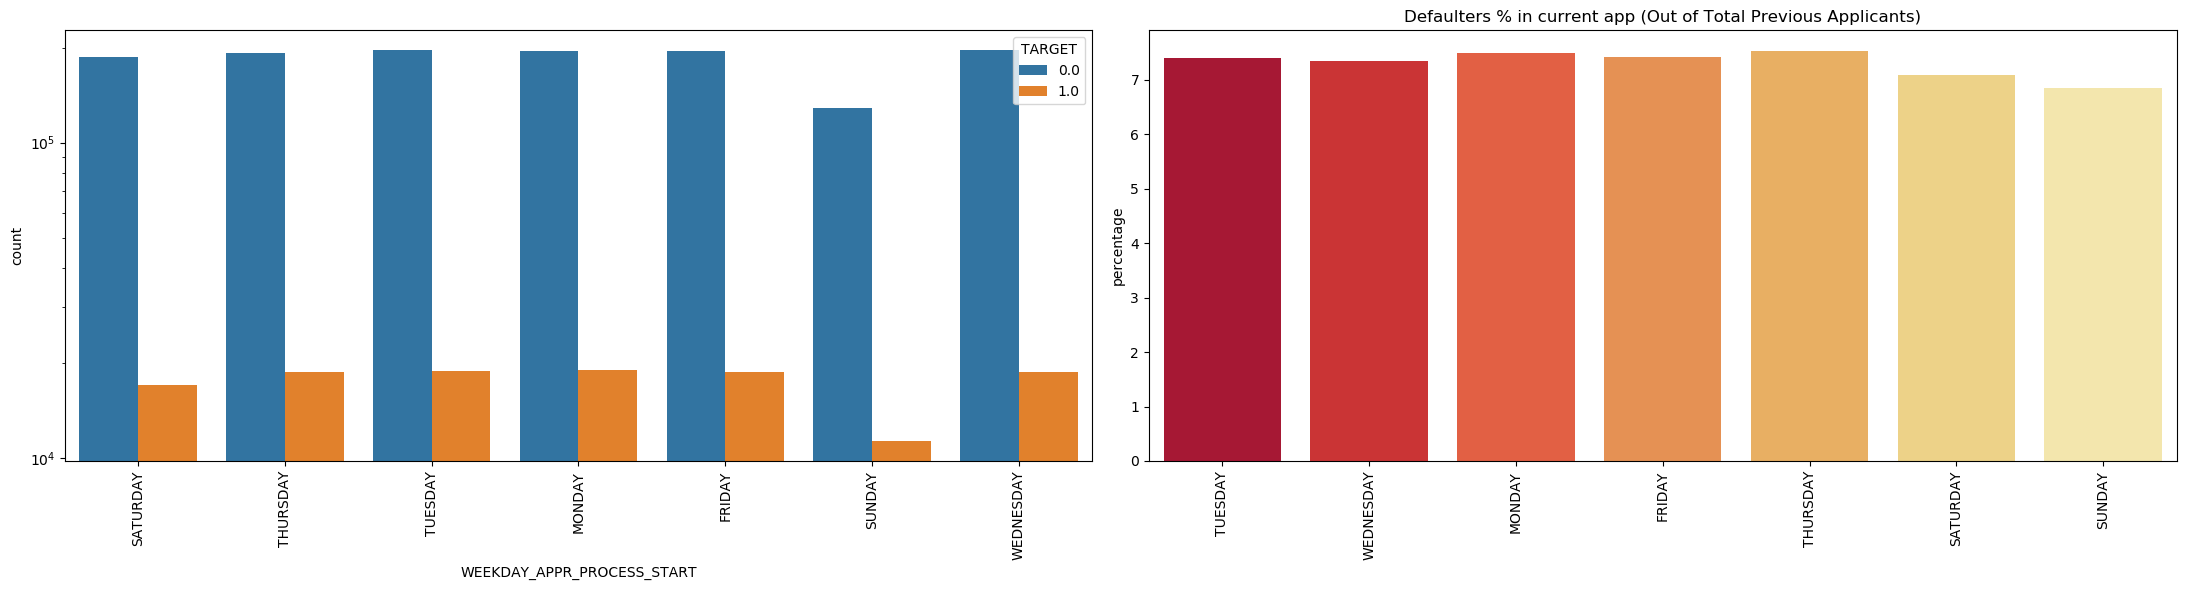

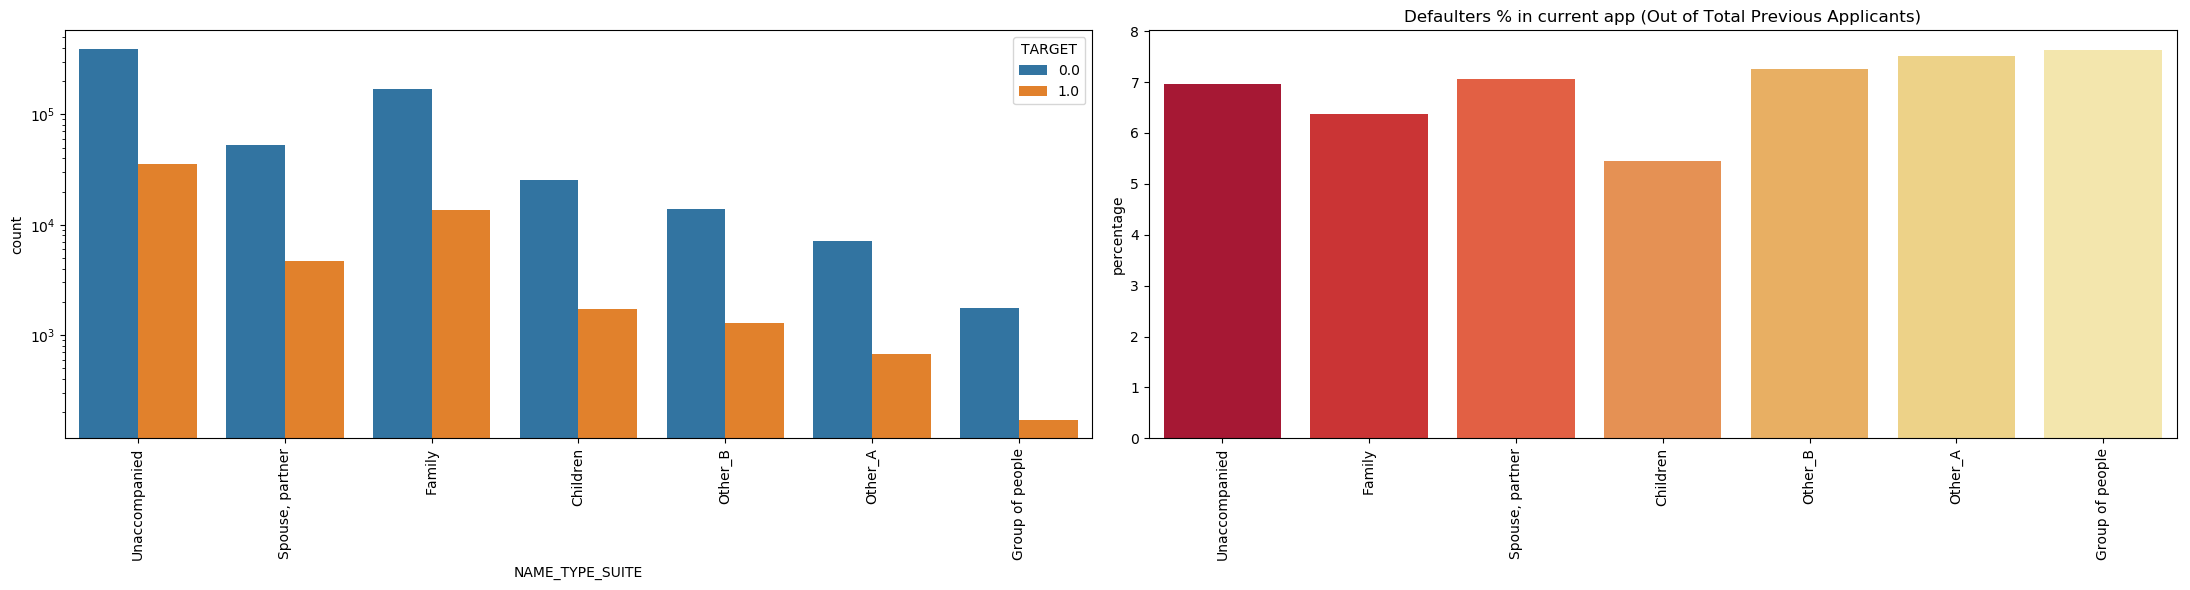

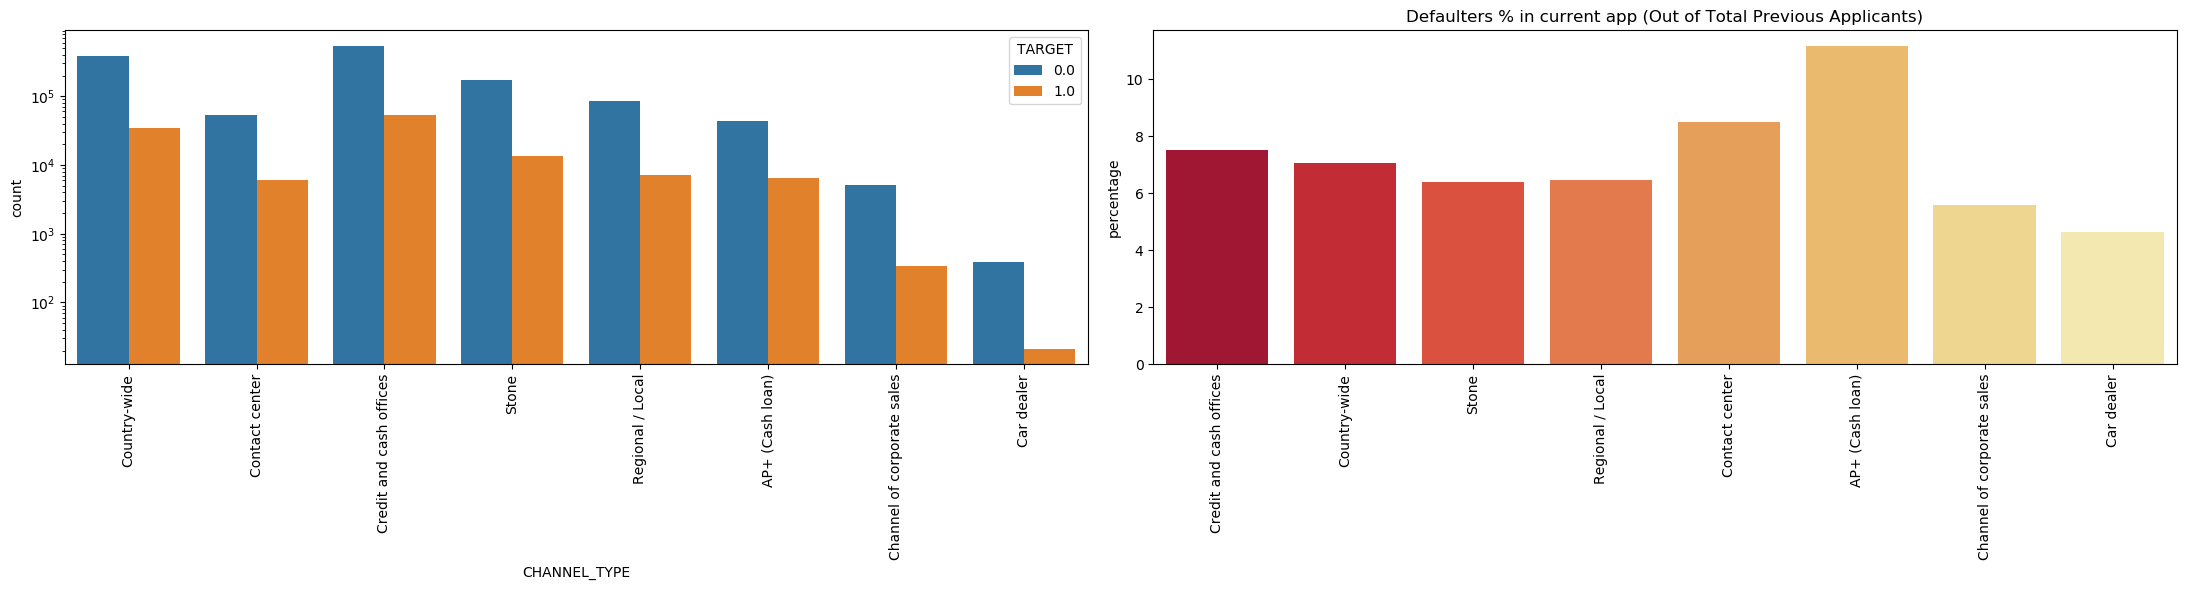

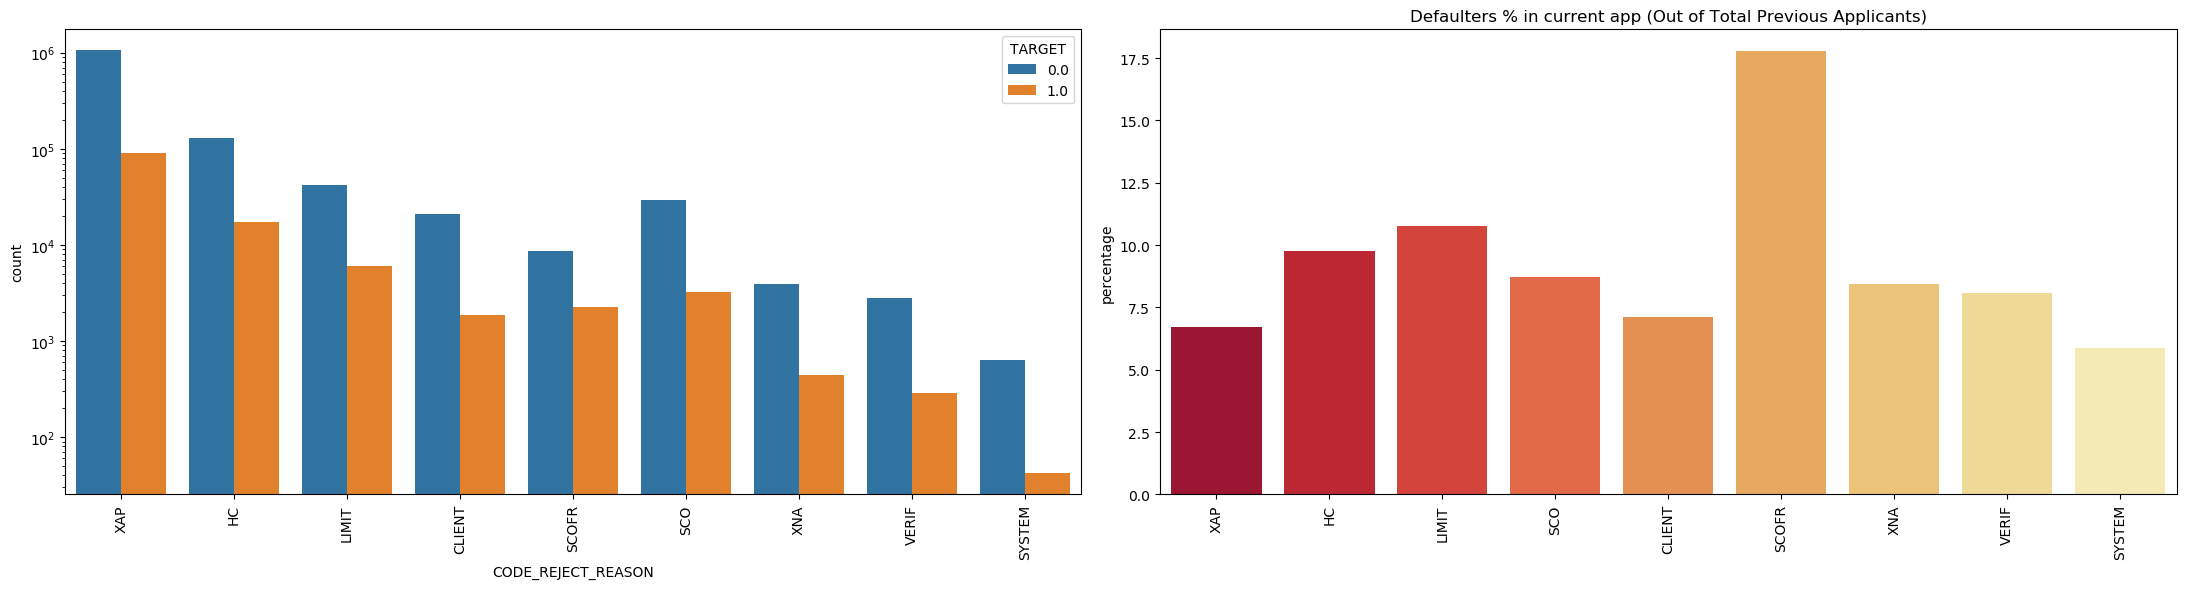

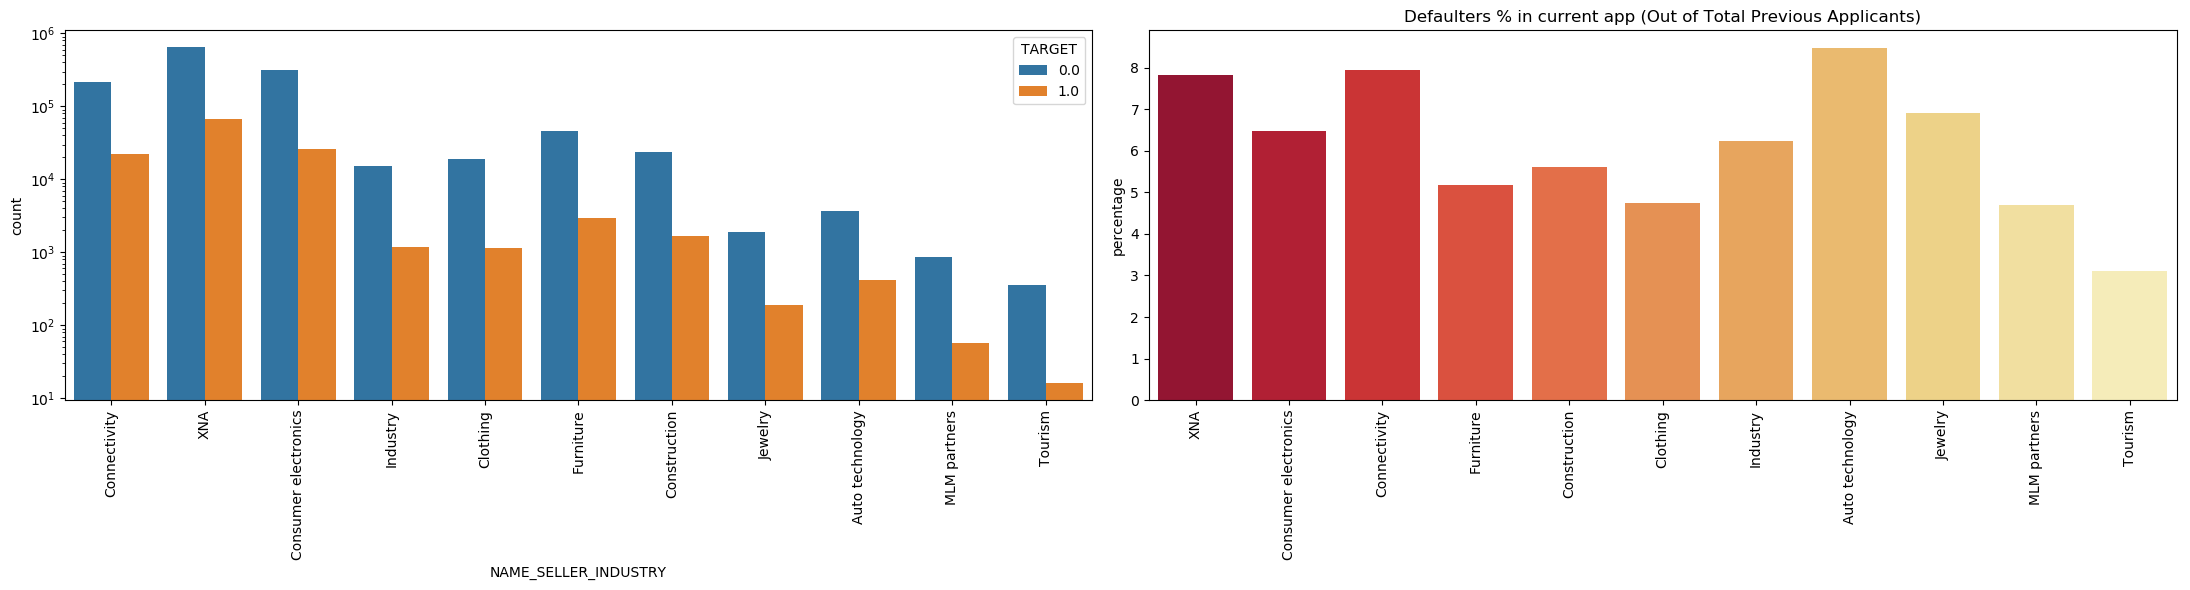

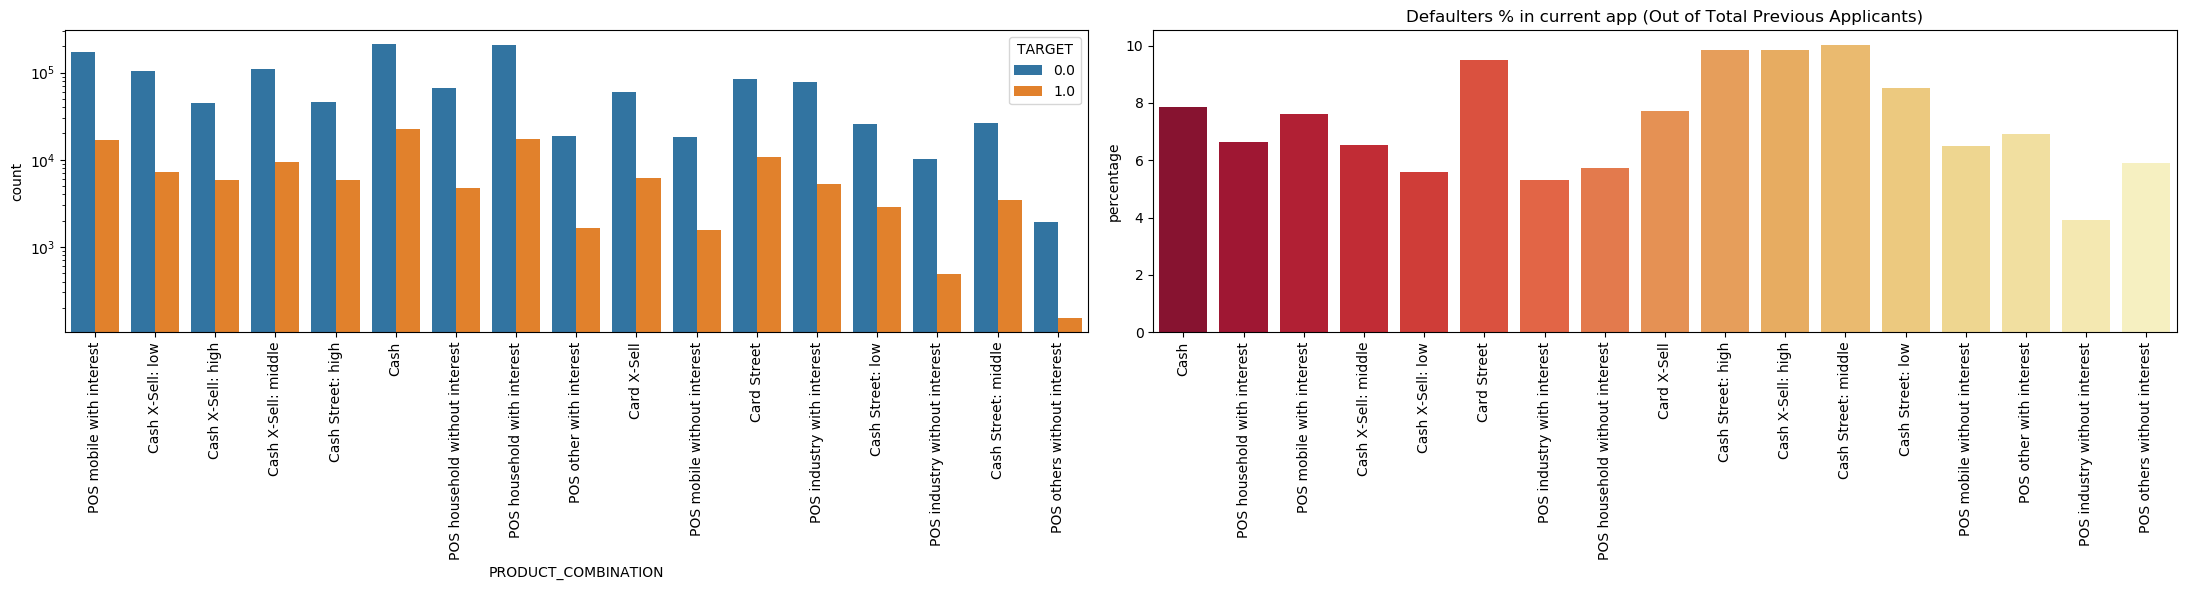

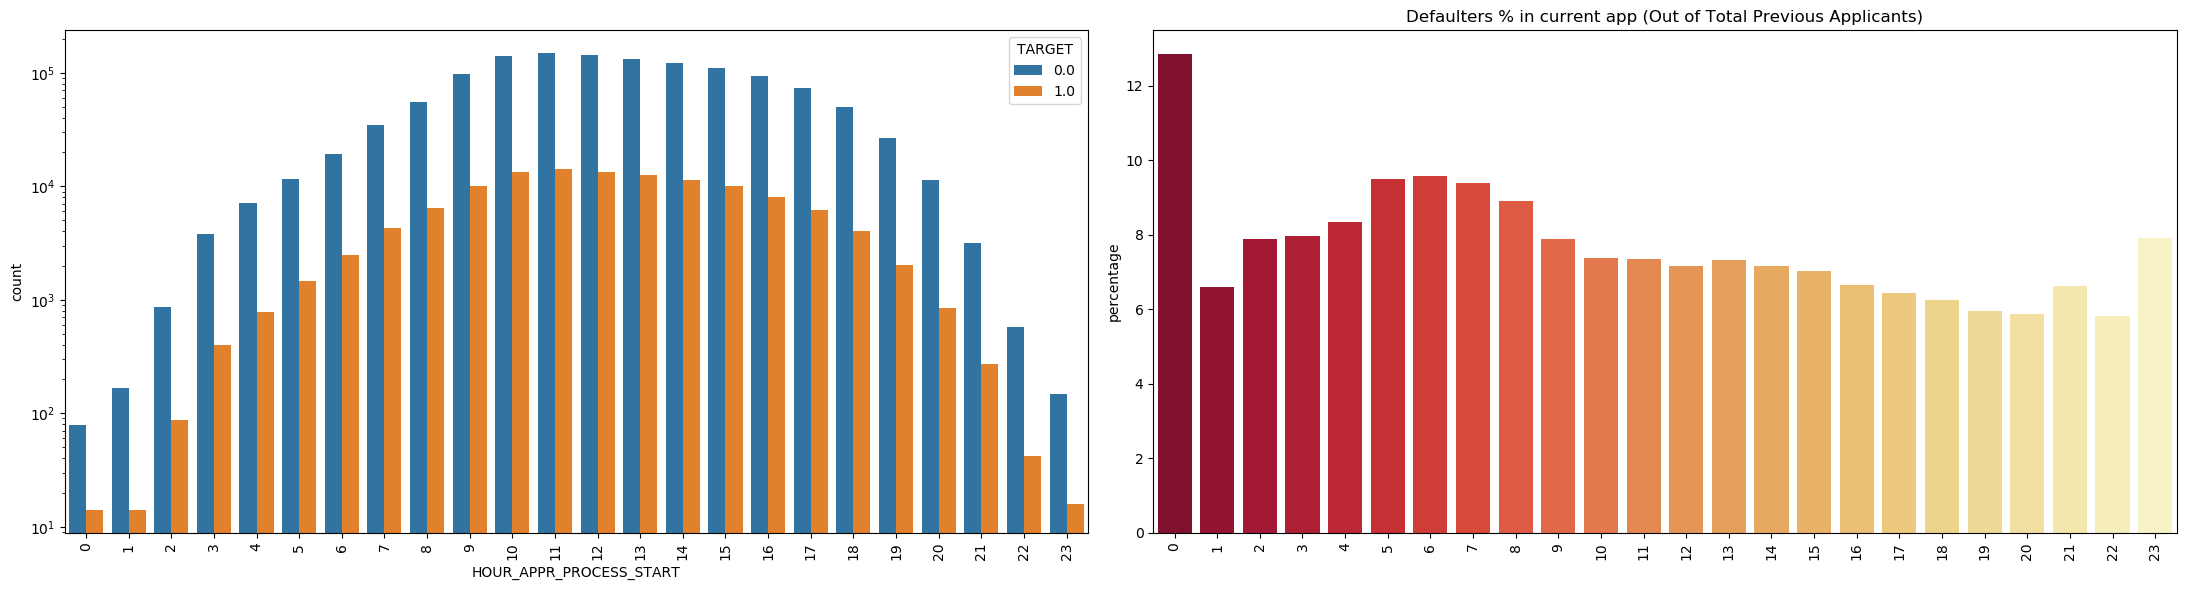

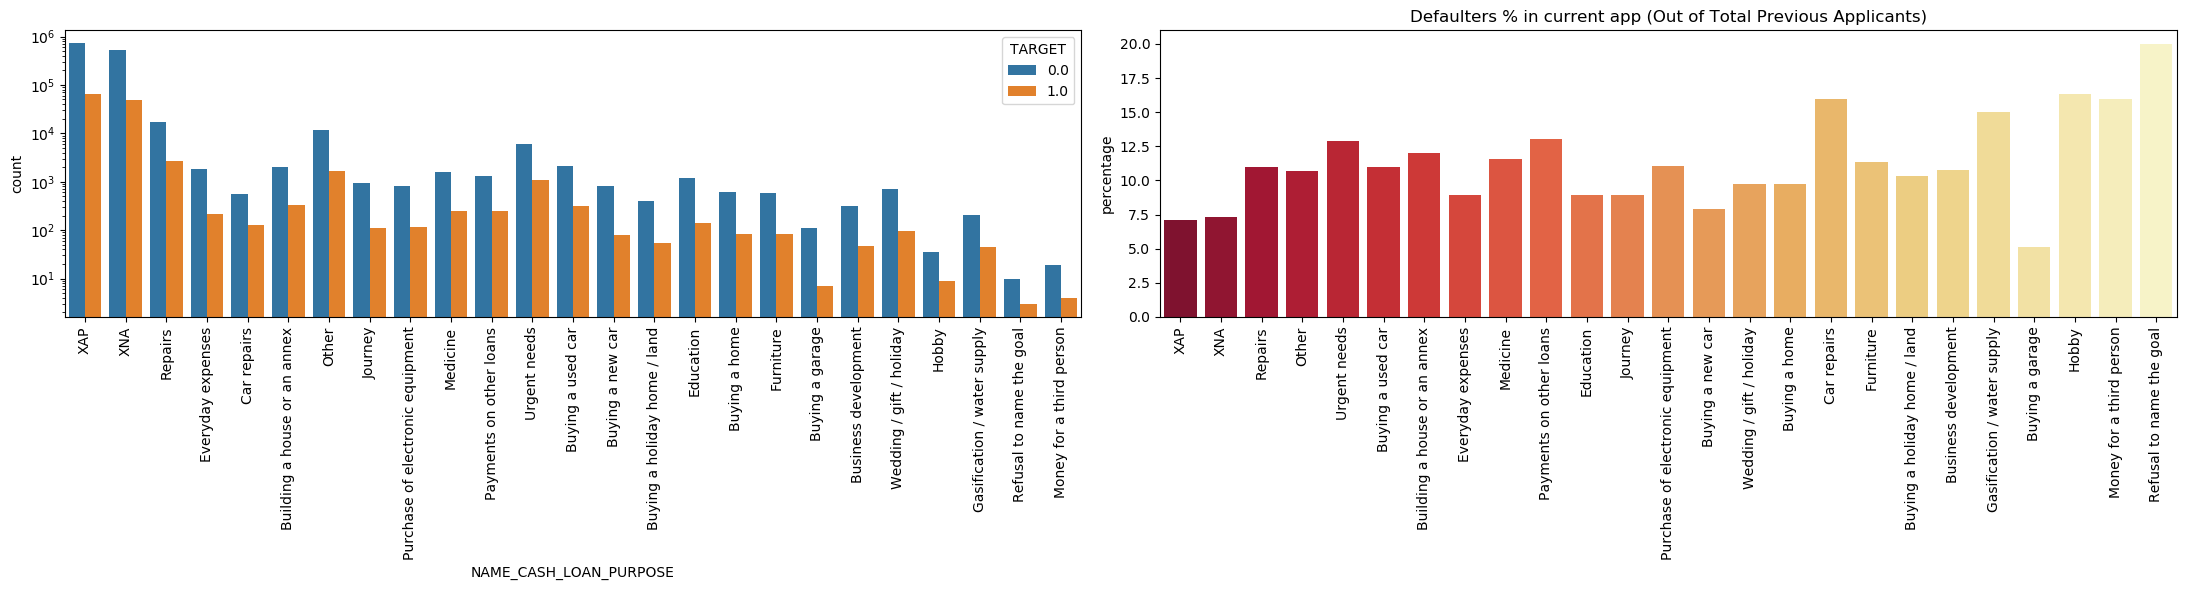

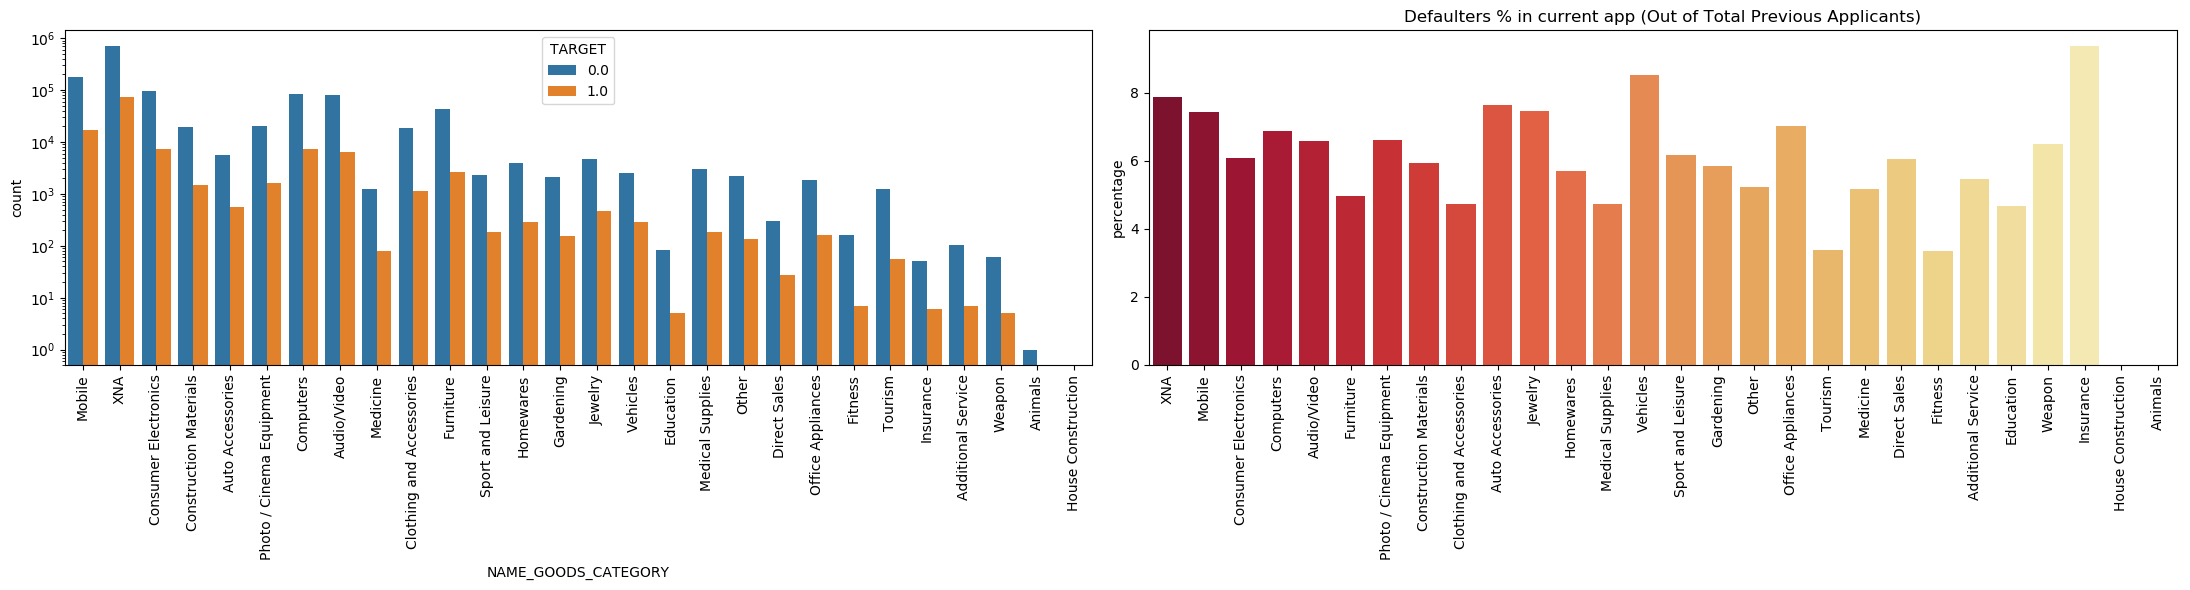

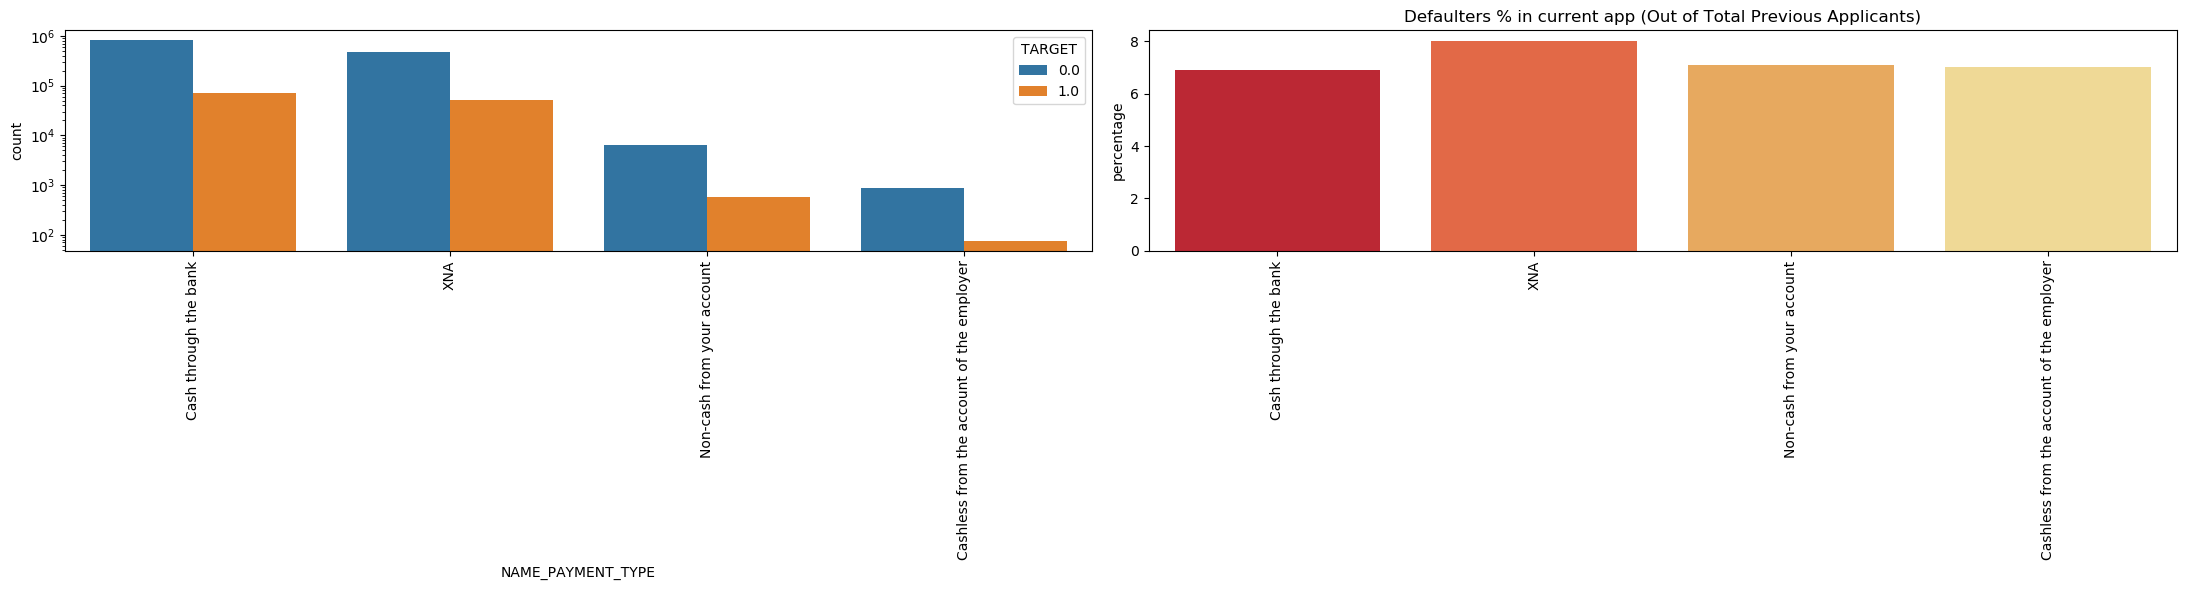

In [85]:
cols = ['WEEKDAY_APPR_PROCESS_START','NAME_TYPE_SUITE','CHANNEL_TYPE','CODE_REJECT_REASON','NAME_SELLER_INDUSTRY',
        'PRODUCT_COMBINATION','HOUR_APPR_PROCESS_START','NAME_CASH_LOAN_PURPOSE','NAME_GOODS_CATEGORY','NAME_PAYMENT_TYPE']
for col in cols:
    plt.figure(figsize=(22,6), dpi=100)
    plt.subplot(1,2,1)
    sns.countplot(merged_data[col], hue=merged_data['TARGET'])
    plt.xticks(rotation=90)
    plt.yscale('log')
    
    plt.subplot(1,2,2)
    aa = pd.DataFrame(merged_data[col].value_counts())
    aa['DEFAULTER'] = merged_data[merged_data['TARGET']==1][col].value_counts()
    aa['percentage'] = round(aa['DEFAULTER']/aa[col]*100,3)
    sns.barplot(y=aa['percentage'], x=aa.index, palette='YlOrRd_r')
    plt.title('Defaulters % in current app (Out of Total Previous Applicants)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

**Insights from the above charts**
1. Applicants who was accquired on AP+ (Cash Loan) type channel have payment difficulty in current application.
2. Applicants whose previous application was rejected based on SCOFR reason have payment difficulties in current application.
3. Applicants who didnt told the purpose during previous cash loan have payment difficulty in paying current loan.

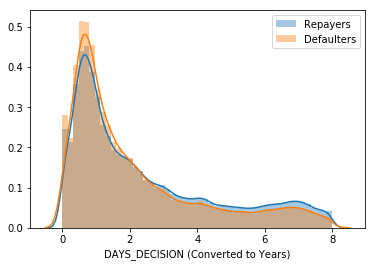

In [86]:
#visualising the days descision column after converting it to years
sns.distplot((merged_data[merged_data['TARGET']==0]['DAYS_DECISION'])/(-365), label='Repayers')
sns.distplot((merged_data[merged_data['TARGET']==1]['DAYS_DECISION'])/(-365), label='Defaulters')
plt.xlabel('DAYS_DECISION (Converted to Years)')
plt.legend()
plt.show()

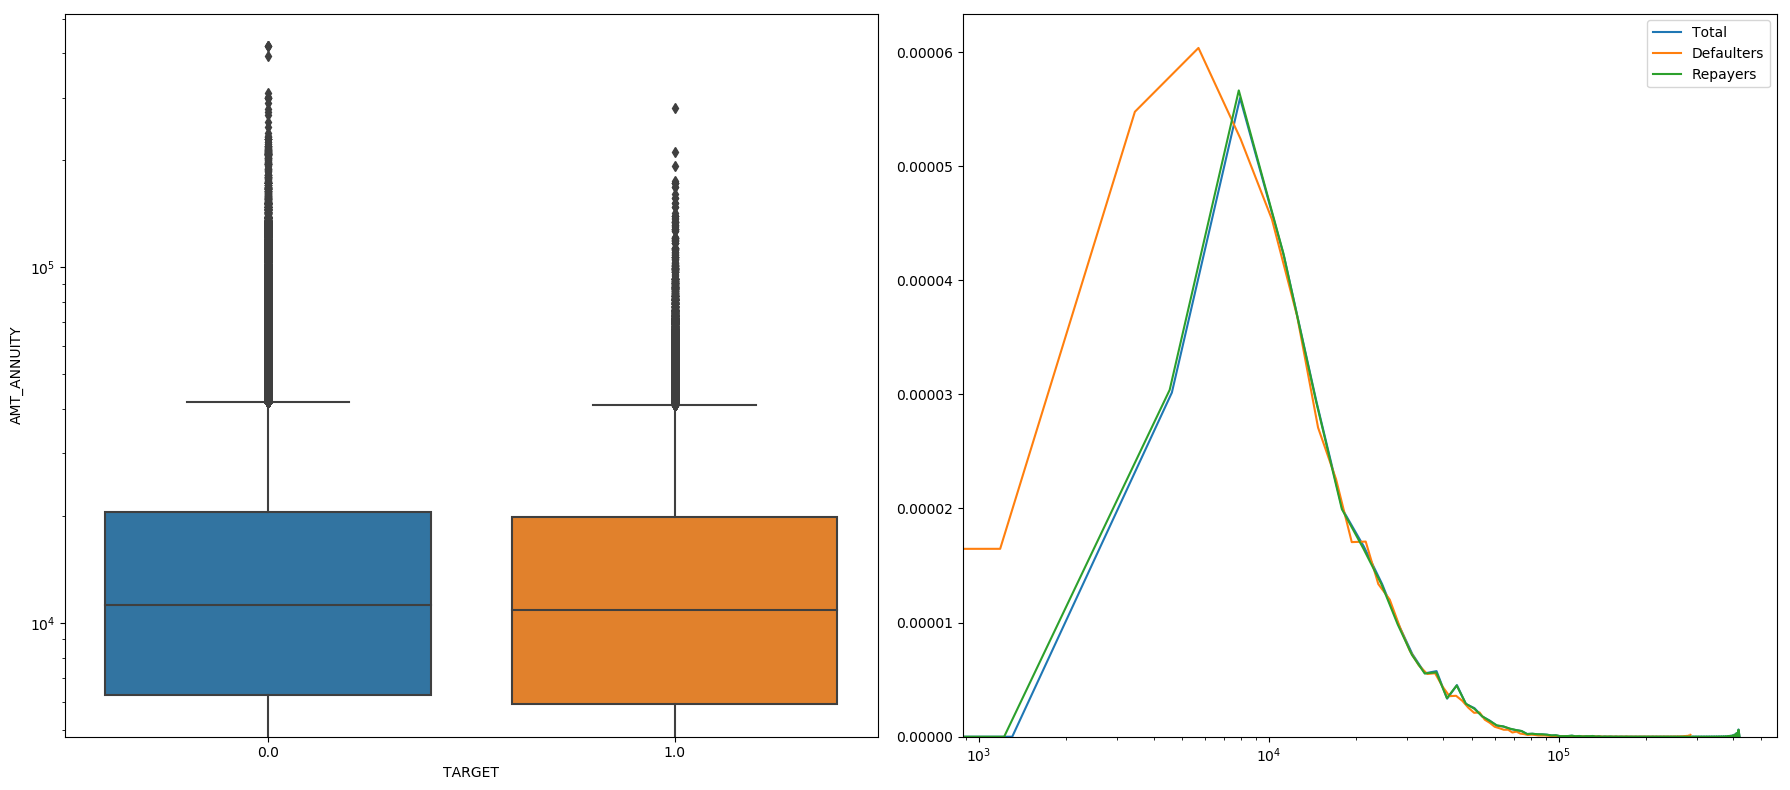

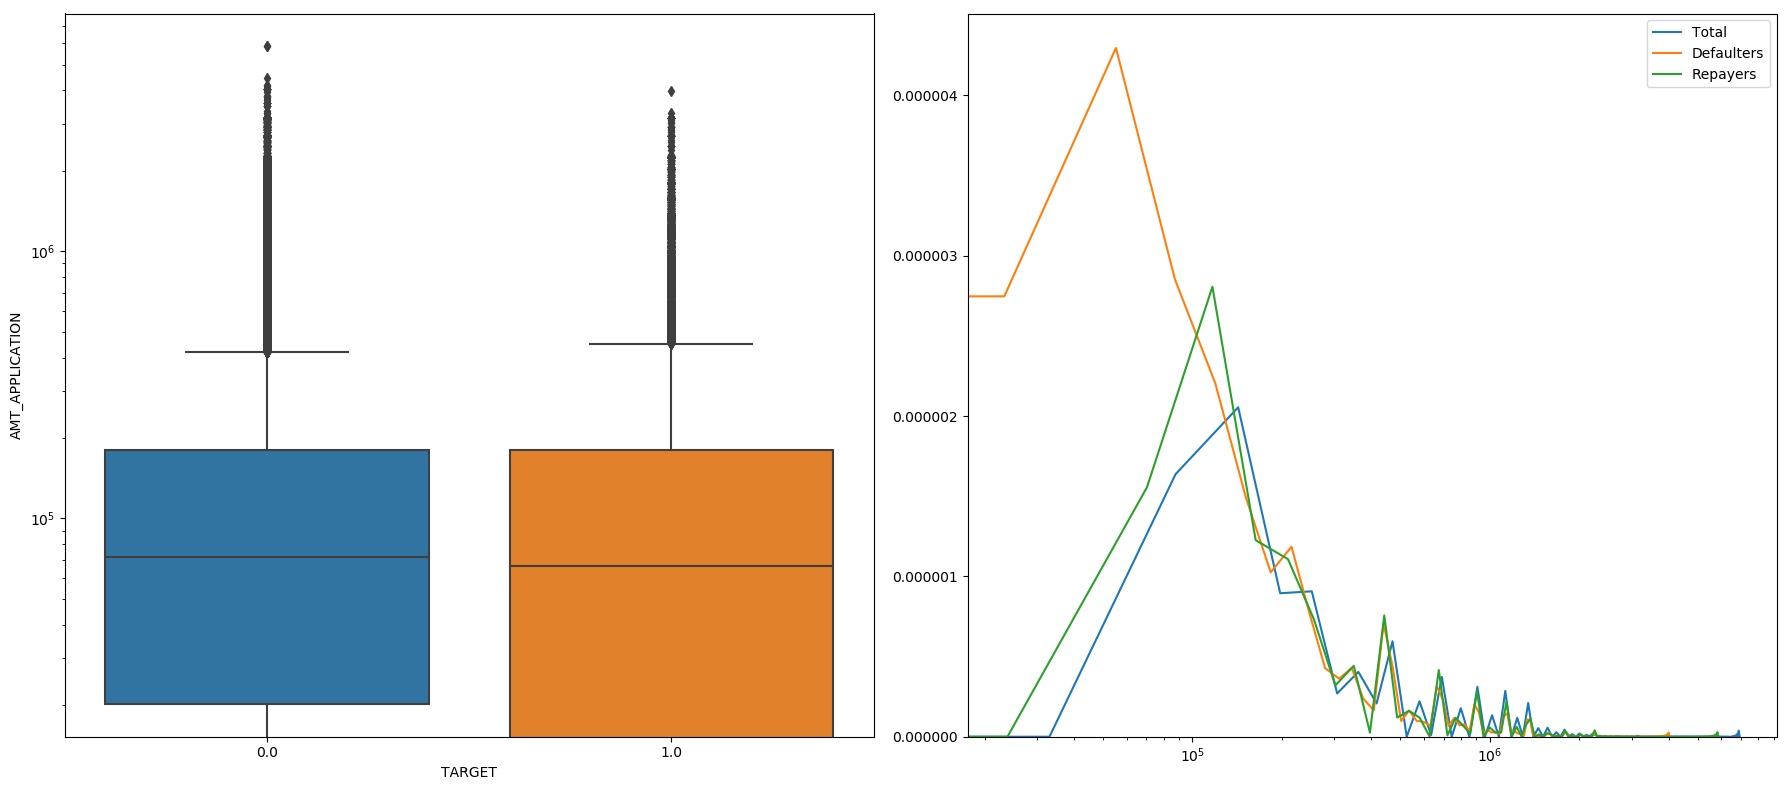

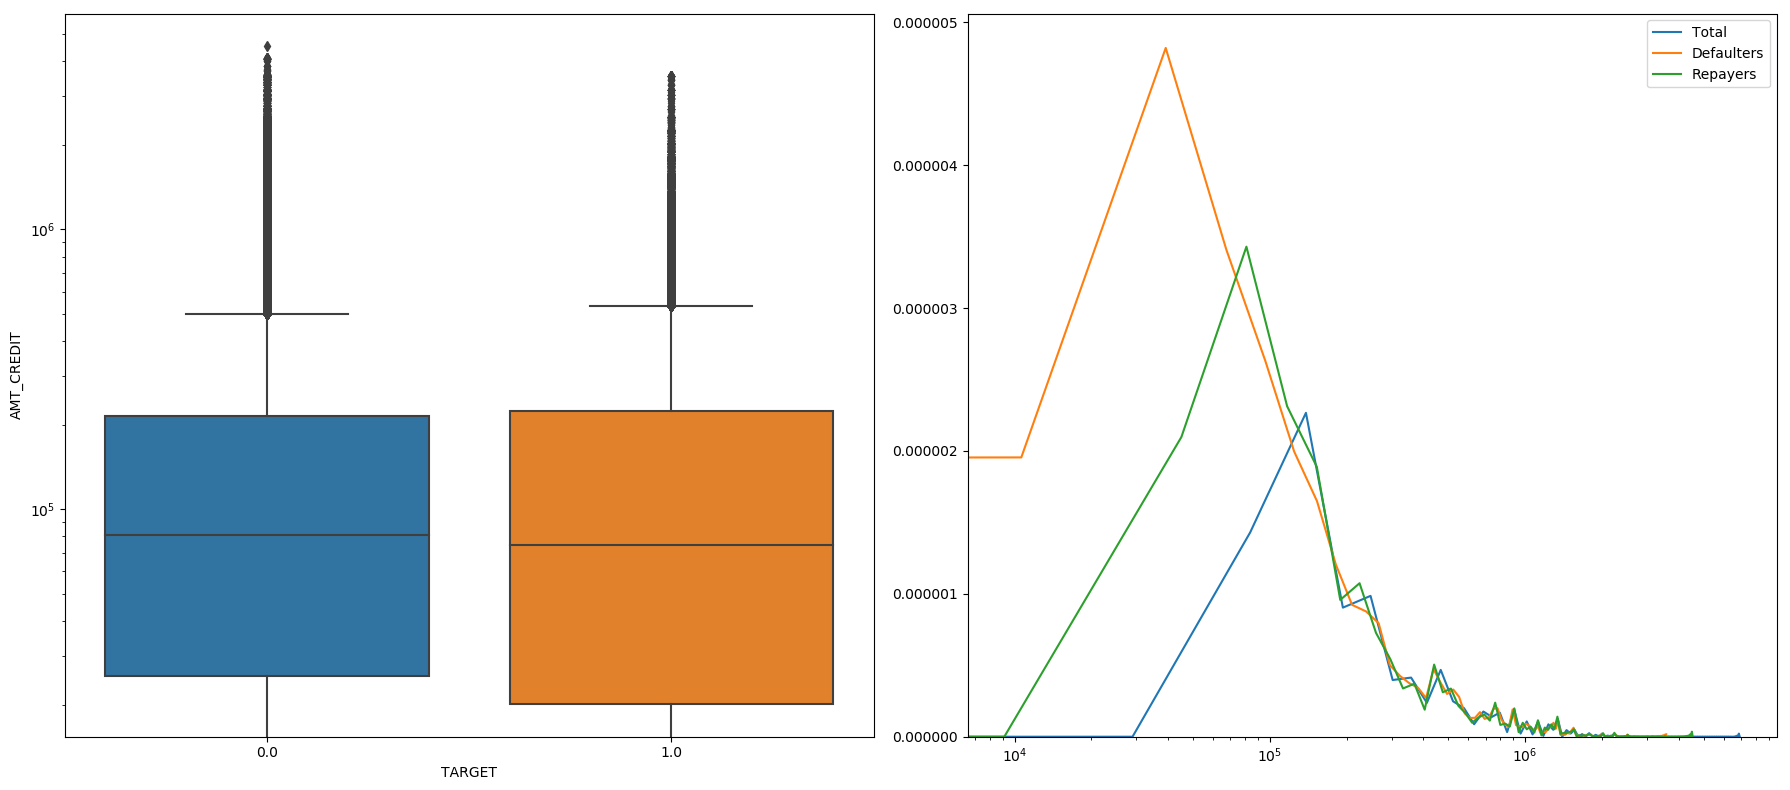

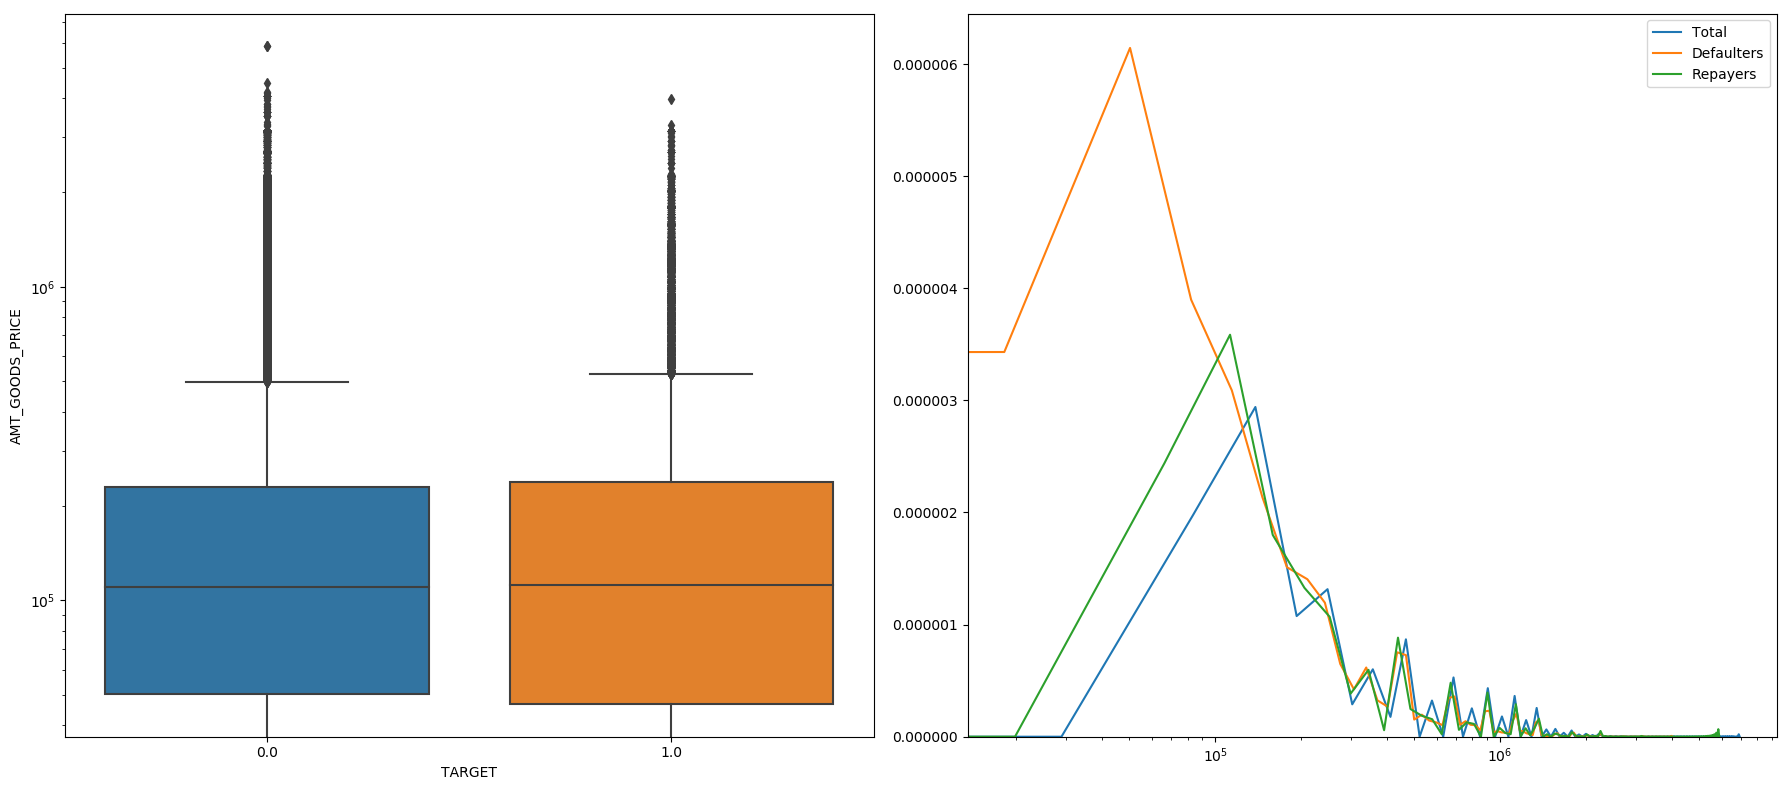

In [87]:
cols =['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE']
for col in cols:    
    plt.figure(figsize=(18,8), dpi=100)
    plt.subplot(1,2,1)
    sns.boxplot(y =merged_data[col],x=merged_data['TARGET'])
    plt.yscale('log')
                                                       
    plt.subplot(1,2,2)
    sns.kdeplot(merged_data[col], label='Total')
    sns.kdeplot(merged_data[merged_data['TARGET'] == 1][col],label='Defaulters')
    sns.kdeplot(merged_data[merged_data['TARGET'] == 0][col],label='Repayers')
    plt.xscale('log')
    plt.tight_layout()
    plt.show()

### Insights from the above charts:
#### The clients who have payment difficulty in current application has the following features in previous applications.
1.	Less Annuity
2.	Less credit amount client asked.
3.	Less Final credit amount the client get.
4.	Less Goods price of good that client asked for (if applicable) on the previous application

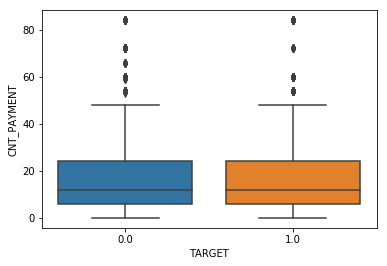

In [88]:
sns.boxplot(y= merged_data['CNT_PAYMENT'], x= merged_data['TARGET'])

In [100]:
#getting the numeric cols of merged dataset
merged_data.dtypes[merged_data.dtypes != 'object'].index

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL',
       'TARGET'],
      dtype='object')

In [101]:
#taking the numerical cols only relevant to our analysis
cols1 =  ['AMT_ANNUITY', 'AMT_APPLICATION','AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE','HOUR_APPR_PROCESS_START',
          'NFLAG_LAST_APPL_IN_DAY','RATE_DOWN_PAYMENT', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT','DAYS_FIRST_DRAWING',
          'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']

In [103]:
#getting top 10 correlations for defaulters based on previous applications
df = merged_data[merged_data['TARGET']==1][cols1]

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations for Defaulters based on Previous Applications")
print(get_top_abs_correlations(df, 10)) # = 10 for top 10

Top Absolute Correlations for Defaulters based on Previous Applications
AMT_APPLICATION     AMT_GOODS_PRICE              0.999676
AMT_CREDIT          AMT_GOODS_PRICE              0.992302
AMT_APPLICATION     AMT_CREDIT                   0.975377
DAYS_LAST_DUE       DAYS_TERMINATION             0.937715
DAYS_FIRST_DRAWING  DAYS_LAST_DUE_1ST_VERSION    0.886465
AMT_ANNUITY         AMT_CREDIT                   0.840459
                    AMT_GOODS_PRICE              0.840195
                    AMT_APPLICATION              0.824961
AMT_APPLICATION     CNT_PAYMENT                  0.696150
AMT_CREDIT          CNT_PAYMENT                  0.690537
dtype: float64


In [104]:
#getting top 10 correlations for repayers based on previous applications
df = merged_data[merged_data['TARGET']==0][cols1]

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations for Repayers based on Previous Applications")
print(get_top_abs_correlations(df, 10)) # = 10 for top 10

Top Absolute Correlations for Repayers based on Previous Applications
AMT_APPLICATION     AMT_GOODS_PRICE              0.999888
AMT_CREDIT          AMT_GOODS_PRICE              0.993300
AMT_APPLICATION     AMT_CREDIT                   0.975726
DAYS_LAST_DUE       DAYS_TERMINATION             0.926829
AMT_ANNUITY         AMT_GOODS_PRICE              0.821030
                    AMT_CREDIT                   0.816549
                    AMT_APPLICATION              0.809026
DAYS_FIRST_DRAWING  DAYS_LAST_DUE_1ST_VERSION    0.801060
AMT_APPLICATION     CNT_PAYMENT                  0.682531
AMT_CREDIT          CNT_PAYMENT                  0.674572
dtype: float64
